In [1]:
import tensorflow as tf
import pandas as pd
import re
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense,LSTM, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [3]:
path = open(r'''D:\dkish\Documents\Files\MACHINELEARNING\TrichyWeatherDataWindspeed\Formatted\20166.csv''')
df = pd.read_csv(path, sep=',', header=0  , index_col=False , na_values = '---' )

In [4]:
df.head(1)

Date   Time  Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
0  01-23-2016  05:01      77.9     77.9      77.9       77     70.1   

   Wind Speed Wind Dir  Wind Run    ...      In Hum In Dew  In Heat  In EMC  \
0         1.8      WSW      0.11    ...          50   67.9     93.5    9.05   

   In Air Density  ET   Wind Samp  Wind Tx   ISS Recept  Arc. Int.  
0          1.1316  0.0         24         1       100.0          1  

[1 rows x 38 columns]

In [5]:
def _date_string(x):
    """Convert two integers to a string for the date and time."""

    date = x[0]
    date = re.sub('-' , '' , date)
    print(date)# Date. Example: 19801231
    time = x[1]
    time = re.sub(':' , '' , time)# Time. Example: 1230
    print(time)

    return "{0}{1}".format(date , time)

In [6]:
datestr = df[['Date', 'Time']].apply(_date_string, axis=1)
df['DateTime'] = pd.to_datetime(datestr, format='%m%d%Y%H%M')

01232016
0501
01232016
0502
01232016
0503
01232016
0504
01232016
0505
01232016
0506
01232016
0507
01232016
0508
01232016
0509
01232016
0510
01232016
0511
01232016
0512
01232016
0513
01232016
0514
01232016
0515
01232016
0516
01232016
0517
01232016
0518
01232016
0519
01232016
0520
01232016
0521
01232016
0522
01232016
0523
01232016
0524
01232016
0525
01232016
0526
01232016
0527
01232016
0528
01232016
0529
01232016
0530
01232016
0531
01232016
0532
01232016
0533
01232016
0534
01232016
0535
01232016
0536
01232016
0537
01232016
0538
01232016
0539
01232016
0540
01232016
0541
01232016
0542
01232016
0543
01232016
0544
01232016
0545
01232016
0546
01232016
0547
01232016
0548
01232016
0549
01232016
0550
01232016
0551
01232016
0552
01232016
0553
01232016
0554
01232016
0555
01232016
0556
01232016
0557
01232016
0558
01232016
0559
01232016
0600
01232016
0601
01232016
0602
01232016
0603
01232016
0604
01232016
0605
01232016
0606
01232016
0607
01232016
0608
01232016
0609
01232016
0610
01232016
0611
012320

01232016
1844
01232016
1845
01232016
1846
01232016
1847
01232016
1848
01232016
1849
01232016
1850
01232016
1851
01232016
1852
01232016
1853
01232016
1854
01232016
1855
01232016
1856
01232016
1857
01232016
1858
01232016
1859
01232016
1900
01232016
1901
01232016
1902
01232016
1903
01232016
1904
01232016
1905
01232016
1906
01232016
1907
01232016
1908
01232016
1909
01232016
1910
01232016
1911
01232016
1912
01232016
1913
01232016
1914
01232016
1915
01232016
1916
01232016
1917
01232016
1918
01232016
1919
01232016
1920
01232016
1921
01232016
1922
01232016
1923
01232016
1924
01232016
1925
01232016
1926
01232016
1927
01232016
1928
01232016
1929
01232016
1930
01232016
1931
01232016
1932
01232016
1933
01232016
1934
01232016
1935
01232016
1936
01232016
1937
01232016
1938
01232016
1939
01232016
1940
01232016
1941
01232016
1942
01232016
1943
01232016
1944
01232016
1945
01232016
1946
01232016
1947
01232016
1948
01232016
1949
01232016
1950
01232016
1951
01232016
1952
01232016
1953
01232016
1954
012320

0538
01242016
0539
01242016
0540
01242016
0541
01242016
0542
01242016
0543
01242016
0544
01242016
0545
01242016
0546
01242016
0547
01242016
0548
01242016
0549
01242016
0550
01242016
0551
01242016
0552
01242016
0553
01242016
0554
01242016
0555
01242016
0556
01242016
0557
01242016
0558
01242016
0559
01242016
0600
01242016
0601
01242016
0602
01242016
0603
01242016
0604
01242016
0605
01242016
0606
01242016
0607
01242016
0608
01242016
0609
01242016
0610
01242016
0611
01242016
0612
01242016
0613
01242016
0614
01242016
0615
01242016
0616
01242016
0617
01242016
0618
01242016
0619
01242016
0620
01242016
0621
01242016
0622
01242016
0623
01242016
0624
01242016
0625
01242016
0626
01242016
0627
01242016
0628
01242016
0629
01242016
0630
01242016
0631
01242016
0632
01242016
0633
01242016
0634
01242016
0635
01242016
0636
01242016
0637
01242016
0638
01242016
0639
01242016
0640
01242016
0641
01242016
0642
01242016
0643
01242016
0644
01242016
0645
01242016
0646
01242016
0647
01242016
0648
01242016
0649
0

01242016
1808
01242016
1809
01242016
1810
01242016
1811
01242016
1812
01242016
1813
01242016
1814
01242016
1815
01242016
1816
01242016
1817
01242016
1818
01242016
1819
01242016
1820
01242016
1821
01242016
1822
01242016
1823
01242016
1824
01242016
1825
01242016
1826
01242016
1827
01242016
1828
01242016
1829
01242016
1830
01242016
1831
01242016
1832
01242016
1833
01242016
1834
01242016
1835
01242016
1836
01242016
1837
01242016
1838
01242016
1839
01242016
1840
01242016
1841
01242016
1842
01242016
1843
01242016
1844
01242016
1845
01242016
1846
01242016
1847
01242016
1848
01242016
1849
01242016
1850
01242016
1851
01242016
1852
01242016
1853
01242016
1854
01242016
1855
01242016
1856
01242016
1857
01242016
1858
01242016
1859
01242016
1900
01242016
1901
01242016
1902
01242016
1903
01242016
1904
01242016
1905
01242016
1906
01242016
1907
01242016
1908
01242016
1909
01242016
1910
01242016
1911
01242016
1912
01242016
1913
01242016
1914
01242016
1915
01242016
1916
01242016
1917
01242016
1918
012420

01252016
0645
01252016
0646
01252016
0647
01252016
0648
01252016
0649
01252016
0650
01252016
0651
01252016
0652
01252016
0653
01252016
0654
01252016
0655
01252016
0656
01252016
0657
01252016
0658
01252016
0659
01252016
0700
01252016
0701
01252016
0702
01252016
0703
01252016
0704
01252016
0705
01252016
0706
01252016
0707
01252016
0708
01252016
0709
01252016
0710
01252016
0711
01252016
0712
01252016
0713
01252016
0714
01252016
0715
01252016
0716
01252016
0717
01252016
0718
01252016
0719
01252016
0720
01252016
0721
01252016
0722
01252016
0723
01252016
0724
01252016
0725
01252016
0726
01252016
0727
01252016
0728
01252016
0729
01252016
0730
01252016
0731
01252016
0732
01252016
0733
01252016
0734
01252016
0735
01252016
0736
01252016
0737
01252016
0738
01252016
0739
01252016
0740
01252016
0741
01252016
0742
01252016
0743
01252016
0744
01252016
0745
01252016
0746
01252016
0747
01252016
0748
01252016
0749
01252016
0750
01252016
0751
01252016
0752
01252016
0753
01252016
0754
01252016
0755
012520

1914
01252016
1915
01252016
1916
01252016
1917
01252016
1918
01252016
1919
01252016
1920
01252016
1921
01252016
1922
01252016
1923
01252016
1924
01252016
1925
01252016
1926
01252016
1927
01252016
1928
01252016
1929
01252016
1930
01252016
1931
01252016
1932
01252016
1933
01252016
1934
01252016
1935
01252016
1936
01252016
1937
01252016
1938
01252016
1939
01252016
1940
01252016
1941
01252016
1942
01252016
1943
01252016
1944
01252016
1945
01252016
1946
01252016
1947
01252016
1948
01252016
1949
01252016
1950
01252016
1951
01252016
1952
01252016
1953
01252016
1954
01252016
1955
01252016
1956
01252016
1957
01252016
1958
01252016
1959
01252016
2000
01252016
2001
01252016
2002
01252016
2003
01252016
2004
01252016
2005
01252016
2006
01252016
2007
01252016
2008
01252016
2009
01252016
2010
01252016
2011
01252016
2012
01252016
2013
01252016
2014
01252016
2015
01252016
2016
01252016
2017
01252016
2018
01252016
2019
01252016
2020
01252016
2021
01252016
2022
01252016
2023
01252016
2024
01252016
2025
0

0744
01262016
0745
01262016
0746
01262016
0747
01262016
0748
01262016
0749
01262016
0750
01262016
0751
01262016
0752
01262016
0753
01262016
0754
01262016
0755
01262016
0756
01262016
0757
01262016
0758
01262016
0759
01262016
0800
01262016
0801
01262016
0802
01262016
0803
01262016
0804
01262016
0805
01262016
0806
01262016
0807
01262016
0808
01262016
0809
01262016
0810
01262016
0811
01262016
0812
01262016
0813
01262016
0814
01262016
0815
01262016
0816
01262016
0817
01262016
0818
01262016
0819
01262016
0820
01262016
0821
01262016
0822
01262016
0823
01262016
0824
01262016
0825
01262016
0826
01262016
0827
01262016
0828
01262016
0829
01262016
0830
01262016
0831
01262016
0832
01262016
0833
01262016
0834
01262016
0835
01262016
0836
01262016
0837
01262016
0838
01262016
0839
01262016
0840
01262016
0841
01262016
0842
01262016
0843
01262016
0844
01262016
0845
01262016
0846
01262016
0847
01262016
0848
01262016
0849
01262016
0850
01262016
0851
01262016
0852
01262016
0853
01262016
0854
01262016
0855
0

01262016
2014
01262016
2015
01262016
2016
01262016
2017
01262016
2018
01262016
2019
01262016
2020
01262016
2021
01262016
2022
01262016
2023
01262016
2024
01262016
2025
01262016
2026
01262016
2027
01262016
2028
01262016
2029
01262016
2030
01262016
2031
01262016
2032
01262016
2033
01262016
2034
01262016
2035
01262016
2036
01262016
2037
01262016
2038
01262016
2039
01262016
2040
01262016
2041
01262016
2042
01262016
2043
01262016
2044
01262016
2045
01262016
2046
01262016
2047
01262016
2048
01262016
2049
01262016
2050
01262016
2051
01262016
2052
01262016
2053
01262016
2054
01262016
2055
01262016
2056
01262016
2057
01262016
2058
01262016
2059
01262016
2100
01262016
2101
01262016
2102
01262016
2103
01262016
2104
01262016
2105
01262016
2106
01262016
2107
01262016
2108
01262016
2109
01262016
2110
01262016
2111
01262016
2112
01262016
2113
01262016
2114
01262016
2115
01262016
2116
01262016
2117
01262016
2118
01262016
2119
01262016
2120
01262016
2121
01262016
2122
01262016
2123
01262016
2124
012620

01272016
0844
01272016
0845
01272016
0846
01272016
0847
01272016
0848
01272016
0849
01272016
0850
01272016
0851
01272016
0852
01272016
0853
01272016
0854
01272016
0855
01272016
0856
01272016
0857
01272016
0858
01272016
0859
01272016
0900
01272016
0901
01272016
0902
01272016
0903
01272016
0904
01272016
0905
01272016
0906
01272016
0907
01272016
0908
01272016
0909
01272016
0910
01272016
0911
01272016
0912
01272016
0913
01272016
0914
01272016
0915
01272016
0916
01272016
0917
01272016
0918
01272016
0919
01272016
0920
01272016
0921
01272016
0922
01272016
0923
01272016
0924
01272016
0925
01272016
0926
01272016
0927
01272016
0928
01272016
0929
01272016
0930
01272016
0931
01272016
0932
01272016
0933
01272016
0934
01272016
0935
01272016
0936
01272016
0937
01272016
0938
01272016
0939
01272016
0940
01272016
0941
01272016
0942
01272016
0943
01272016
0944
01272016
0945
01272016
0946
01272016
0947
01272016
0948
01272016
0949
01272016
0950
01272016
0951
01272016
0952
01272016
0953
01272016
0954
012720

0123
01282016
0124
01282016
0125
01282016
0126
01282016
0127
01282016
0128
01282016
0129
01282016
0130
01282016
0131
01282016
0132
01282016
0133
01282016
0134
01282016
0135
01282016
0136
01282016
0137
01282016
0138
01282016
0139
01282016
0140
01282016
0141
01282016
0142
01282016
0143
01282016
0144
01282016
0145
01282016
0146
01282016
0147
01282016
0148
01282016
0149
01282016
0150
01282016
0151
01282016
0152
01282016
0153
01282016
0154
01282016
0155
01282016
0156
01282016
0157
01282016
0158
01282016
0159
01282016
0200
01282016
0201
01282016
0202
01282016
0203
01282016
0204
01282016
0205
01282016
0206
01282016
0207
01282016
0208
01282016
0209
01282016
0210
01282016
0211
01282016
0212
01282016
0213
01282016
0214
01282016
0215
01282016
0216
01282016
0217
01282016
0218
01282016
0219
01282016
0220
01282016
0221
01282016
0222
01282016
0223
01282016
0224
01282016
0225
01282016
0226
01282016
0227
01282016
0228
01282016
0229
01282016
0230
01282016
0231
01282016
0232
01282016
0233
01282016
0234
0

1803
01282016
1804
01282016
1805
01282016
1806
01282016
1807
01282016
1808
01282016
1809
01282016
1810
01282016
1811
01282016
1812
01282016
1813
01282016
1814
01282016
1815
01282016
1816
01282016
1817
01282016
1818
01282016
1819
01282016
1820
01282016
1821
01282016
1822
01282016
1823
01282016
1824
01282016
1825
01282016
1826
01282016
1827
01282016
1828
01282016
1829
01282016
1830
01282016
1831
01282016
1832
01282016
1833
01282016
1834
01282016
1835
01282016
1836
01282016
1837
01282016
1838
01282016
1839
01282016
1840
01282016
1841
01282016
1842
01282016
1843
01282016
1844
01282016
1845
01282016
1846
01282016
1847
01282016
1848
01282016
1849
01282016
1850
01282016
1851
01282016
1852
01282016
1853
01282016
1854
01282016
1855
01282016
1856
01282016
1857
01282016
1858
01282016
1859
01282016
1900
01282016
1901
01282016
1902
01282016
1903
01282016
1904
01282016
1905
01282016
1906
01282016
1907
01282016
1908
01282016
1909
01282016
1910
01282016
1911
01282016
1912
01282016
1913
01282016
1914
0

01292016
1043
01292016
1044
01292016
1045
01292016
1046
01292016
1047
01292016
1048
01292016
1049
01292016
1050
01292016
1051
01292016
1052
01292016
1053
01292016
1054
01292016
1055
01292016
1056
01292016
1057
01292016
1058
01292016
1059
01292016
1100
01292016
1101
01292016
1102
01292016
1103
01292016
1104
01292016
1105
01292016
1106
01292016
1107
01292016
1108
01292016
1109
01292016
1110
01292016
1111
01292016
1112
01292016
1113
01292016
1114
01292016
1115
01292016
1116
01292016
1117
01292016
1118
01292016
1119
01292016
1120
01292016
1121
01292016
1122
01292016
1123
01292016
1124
01292016
1125
01292016
1126
01292016
1127
01292016
1128
01292016
1129
01292016
1130
01292016
1131
01292016
1132
01292016
1133
01292016
1134
01292016
1135
01292016
1136
01292016
1137
01292016
1138
01292016
1139
01292016
1140
01292016
1141
01292016
1142
01292016
1143
01292016
1144
01292016
1145
01292016
1146
01292016
1147
01292016
1148
01292016
1149
01292016
1150
01292016
1151
01292016
1152
01292016
1153
012920

0306
01302016
0307
01302016
0308
01302016
0309
01302016
0310
01302016
0311
01302016
0312
01302016
0313
01302016
0314
01302016
0315
01302016
0316
01302016
0317
01302016
0318
01302016
0319
01302016
0320
01302016
0321
01302016
0322
01302016
0323
01302016
0324
01302016
0325
01302016
0326
01302016
0327
01302016
0328
01302016
0329
01302016
0330
01302016
0331
01302016
0332
01302016
0333
01302016
0334
01302016
0335
01302016
0336
01302016
0337
01302016
0338
01302016
0339
01302016
0340
01302016
0341
01302016
0342
01302016
0343
01302016
0344
01302016
0345
01302016
0346
01302016
0347
01302016
0348
01302016
0349
01302016
0350
01302016
0351
01302016
0352
01302016
0353
01302016
0354
01302016
0355
01302016
0356
01302016
0357
01302016
0358
01302016
0359
01302016
0400
01302016
0401
01302016
0402
01302016
0403
01302016
0404
01302016
0405
01302016
0406
01302016
0407
01302016
0408
01302016
0409
01302016
0410
01302016
0411
01302016
0412
01302016
0413
01302016
0414
01302016
0415
01302016
0416
01302016
0417
0

1552
01302016
1553
01302016
1554
01302016
1555
01302016
1556
01302016
1557
01302016
1558
01302016
1559
01302016
1600
01302016
1601
01302016
1602
01302016
1603
01302016
1604
01302016
1605
01302016
1606
01302016
1607
01302016
1608
01302016
1609
01302016
1610
01302016
1611
01302016
1612
01302016
1613
01302016
1614
01302016
1615
01302016
1616
01302016
1617
01302016
1618
01302016
1619
01302016
1620
01302016
1621
01302016
1622
01302016
1623
01302016
1624
01302016
1625
01302016
1626
01302016
1627
01302016
1628
01302016
1629
01302016
1630
01302016
1631
01302016
1632
01302016
1633
01302016
1634
01302016
1635
01302016
1636
01302016
1637
01302016
1638
01302016
1639
01302016
1640
01302016
1641
01302016
1642
01302016
1643
01302016
1644
01302016
1645
01302016
1646
01302016
1647
01302016
1648
01302016
1649
01302016
1650
01302016
1651
01302016
1652
01302016
1653
01302016
1654
01302016
1655
01302016
1656
01302016
1657
01302016
1658
01302016
1659
01302016
1700
01302016
1701
01302016
1702
01302016
1703
0

0832
01312016
0833
01312016
0834
01312016
0835
01312016
0836
01312016
0837
01312016
0838
01312016
0839
01312016
0840
01312016
0841
01312016
0842
01312016
0843
01312016
0844
01312016
0845
01312016
0846
01312016
0847
01312016
0848
01312016
0849
01312016
0850
01312016
0851
01312016
0852
01312016
0853
01312016
0854
01312016
0855
01312016
0856
01312016
0857
01312016
0858
01312016
0859
01312016
0900
01312016
0901
01312016
0902
01312016
0903
01312016
0904
01312016
0905
01312016
0906
01312016
0907
01312016
0908
01312016
0909
01312016
0910
01312016
0911
01312016
0912
01312016
0913
01312016
0914
01312016
0915
01312016
0916
01312016
0917
01312016
0918
01312016
0919
01312016
0920
01312016
0921
01312016
0922
01312016
0923
01312016
0924
01312016
0925
01312016
0926
01312016
0927
01312016
0928
01312016
0929
01312016
0930
01312016
0931
01312016
0932
01312016
0933
01312016
0934
01312016
0935
01312016
0936
01312016
0937
01312016
0938
01312016
0939
01312016
0940
01312016
0941
01312016
0942
01312016
0943
0

01312016
2305
01312016
2306
01312016
2307
01312016
2308
01312016
2309
01312016
2310
01312016
2311
01312016
2312
01312016
2313
01312016
2314
01312016
2315
01312016
2316
01312016
2317
01312016
2318
01312016
2319
01312016
2320
01312016
2321
01312016
2322
01312016
2323
01312016
2324
01312016
2325
01312016
2326
01312016
2327
01312016
2328
01312016
2329
01312016
2330
01312016
2331
01312016
2332
01312016
2333
01312016
2334
01312016
2335
01312016
2336
01312016
2337
01312016
2338
01312016
2339
01312016
2340
01312016
2341
01312016
2342
01312016
2343
01312016
2344
01312016
2345
01312016
2346
01312016
2347
01312016
2348
01312016
2349
01312016
2350
01312016
2351
01312016
2352
01312016
2353
01312016
2354
01312016
2355
01312016
2356
01312016
2357
01312016
2358
01312016
2359
02012016
0000
02012016
0001
02012016
0002
02012016
0003
02012016
0004
02012016
0005
02012016
0006
02012016
0007
02012016
0008
02012016
0009
02012016
0010
02012016
0011
02012016
0012
02012016
0013
02012016
0014
02012016
0015
020120

1259
02012016
1300
02012016
1301
02012016
1302
02012016
1303
02012016
1304
02012016
1305
02012016
1306
02012016
1307
02012016
1308
02012016
1309
02012016
1310
02012016
1311
02012016
1312
02012016
1313
02012016
1314
02012016
1315
02012016
1316
02012016
1317
02012016
1318
02012016
1319
02012016
1320
02012016
1321
02012016
1322
02012016
1323
02012016
1324
02012016
1325
02012016
1326
02012016
1327
02012016
1328
02012016
1329
02012016
1330
02012016
1331
02012016
1332
02012016
1333
02012016
1334
02012016
1335
02012016
1336
02012016
1337
02012016
1338
02012016
1339
02012016
1340
02012016
1341
02012016
1342
02012016
1343
02012016
1344
02012016
1345
02012016
1346
02012016
1347
02012016
1348
02012016
1349
02012016
1350
02012016
1351
02012016
1352
02012016
1353
02012016
1354
02012016
1355
02012016
1356
02012016
1357
02012016
1358
02012016
1359
02012016
1400
02012016
1401
02012016
1402
02012016
1403
02012016
1404
02012016
1405
02012016
1406
02012016
1407
02012016
1408
02012016
1409
02012016
1410
0

0211
02022016
0212
02022016
0213
02022016
0214
02022016
0215
02022016
0216
02022016
0217
02022016
0218
02022016
0219
02022016
0220
02022016
0221
02022016
0222
02022016
0223
02022016
0224
02022016
0225
02022016
0226
02022016
0227
02022016
0228
02022016
0229
02022016
0230
02022016
0231
02022016
0232
02022016
0233
02022016
0234
02022016
0235
02022016
0236
02022016
0237
02022016
0238
02022016
0239
02022016
0240
02022016
0241
02022016
0242
02022016
0243
02022016
0244
02022016
0245
02022016
0246
02022016
0247
02022016
0248
02022016
0249
02022016
0250
02022016
0251
02022016
0252
02022016
0253
02022016
0254
02022016
0255
02022016
0256
02022016
0257
02022016
0258
02022016
0259
02022016
0300
02022016
0301
02022016
0302
02022016
0303
02022016
0304
02022016
0305
02022016
0306
02022016
0307
02022016
0308
02022016
0309
02022016
0310
02022016
0311
02022016
0312
02022016
0313
02022016
0314
02022016
0315
02022016
0316
02022016
0317
02022016
0318
02022016
0319
02022016
0320
02022016
0321
02022016
0322
0

1843
02022016
1844
02022016
1845
02022016
1846
02022016
1847
02022016
1848
02022016
1849
02022016
1850
02022016
1851
02022016
1852
02022016
1853
02022016
1854
02022016
1855
02022016
1856
02022016
1857
02022016
1858
02022016
1859
02022016
1900
02022016
1901
02022016
1902
02022016
1903
02022016
1904
02022016
1905
02022016
1906
02022016
1907
02022016
1908
02022016
1909
02022016
1910
02022016
1911
02022016
1912
02022016
1913
02022016
1914
02022016
1915
02022016
1916
02022016
1917
02022016
1918
02022016
1919
02022016
1920
02022016
1921
02022016
1922
02022016
1923
02022016
1924
02022016
1925
02022016
1926
02022016
1927
02022016
1928
02022016
1929
02022016
1930
02022016
1931
02022016
1932
02022016
1933
02022016
1934
02022016
1935
02022016
1936
02022016
1937
02022016
1938
02022016
1939
02022016
1940
02022016
1941
02022016
1942
02022016
1943
02022016
1944
02022016
1945
02022016
1946
02022016
1947
02022016
1948
02022016
1949
02022016
1950
02022016
1951
02022016
1952
02022016
1953
02022016
1954
0

02032016
1131
02032016
1132
02032016
1133
02032016
1134
02032016
1135
02032016
1136
02032016
1137
02032016
1138
02032016
1139
02032016
1140
02032016
1141
02032016
1142
02032016
1143
02032016
1144
02032016
1145
02032016
1146
02032016
1147
02032016
1148
02032016
1149
02032016
1150
02032016
1151
02032016
1152
02032016
1153
02032016
1154
02032016
1155
02032016
1156
02032016
1157
02032016
1158
02032016
1159
02032016
1200
02032016
1201
02032016
1202
02032016
1203
02032016
1204
02032016
1205
02032016
1206
02032016
1207
02032016
1208
02032016
1209
02032016
1210
02032016
1211
02032016
1212
02032016
1213
02032016
1214
02032016
1215
02032016
1216
02032016
1217
02032016
1218
02032016
1219
02032016
1220
02032016
1221
02032016
1222
02032016
1223
02032016
1224
02032016
1225
02032016
1226
02032016
1227
02032016
1228
02032016
1229
02032016
1230
02032016
1231
02032016
1232
02032016
1233
02032016
1234
02032016
1235
02032016
1236
02032016
1237
02032016
1238
02032016
1239
02032016
1240
02032016
1241
020320

02042016
0001
02042016
0002
02042016
0003
02042016
0004
02042016
0005
02042016
0006
02042016
0007
02042016
0008
02042016
0009
02042016
0010
02042016
0011
02042016
0012
02042016
0013
02042016
0014
02042016
0015
02042016
0016
02042016
0017
02042016
0018
02042016
0019
02042016
0020
02042016
0021
02042016
0022
02042016
0023
02042016
0024
02042016
0025
02042016
0026
02042016
0027
02042016
0028
02042016
0029
02042016
0030
02042016
0031
02042016
0032
02042016
0033
02042016
0034
02042016
0035
02042016
0036
02042016
0037
02042016
0038
02042016
0039
02042016
0040
02042016
0041
02042016
0042
02042016
0043
02042016
0044
02042016
0045
02042016
0046
02042016
0047
02042016
0048
02042016
0049
02042016
0050
02042016
0051
02042016
0052
02042016
0053
02042016
0054
02042016
0055
02042016
0056
02042016
0057
02042016
0058
02042016
0059
02042016
0100
02042016
0101
02042016
0102
02042016
0103
02042016
0104
02042016
0105
02042016
0106
02042016
0107
02042016
0108
02042016
0109
02042016
0110
02042016
0111
020420

1640
02042016
1641
02042016
1642
02042016
1643
02042016
1644
02042016
1645
02042016
1646
02042016
1647
02042016
1648
02042016
1649
02042016
1650
02042016
1651
02042016
1652
02042016
1653
02042016
1654
02042016
1655
02042016
1656
02042016
1657
02042016
1658
02042016
1659
02042016
1700
02042016
1701
02042016
1702
02042016
1703
02042016
1704
02042016
1705
02042016
1706
02042016
1707
02042016
1708
02042016
1709
02042016
1710
02042016
1711
02042016
1712
02042016
1713
02042016
1714
02042016
1715
02042016
1716
02042016
1717
02042016
1718
02042016
1719
02042016
1720
02042016
1721
02042016
1722
02042016
1723
02042016
1724
02042016
1725
02042016
1726
02042016
1727
02042016
1728
02042016
1729
02042016
1730
02042016
1731
02042016
1732
02042016
1733
02042016
1734
02042016
1735
02042016
1736
02042016
1737
02042016
1738
02042016
1739
02042016
1740
02042016
1741
02042016
1742
02042016
1743
02042016
1744
02042016
1745
02042016
1746
02042016
1747
02042016
1748
02042016
1749
02042016
1750
02042016
1751
0

0920
02052016
0921
02052016
0922
02052016
0923
02052016
0924
02052016
0925
02052016
0926
02052016
0927
02052016
0928
02052016
0929
02052016
0930
02052016
0931
02052016
0932
02052016
0933
02052016
0934
02052016
0935
02052016
0936
02052016
0937
02052016
0938
02052016
0939
02052016
0940
02052016
0941
02052016
0942
02052016
0943
02052016
0944
02052016
0945
02052016
0946
02052016
0947
02052016
0948
02052016
0949
02052016
0950
02052016
0951
02052016
0952
02052016
0953
02052016
0954
02052016
0955
02052016
0956
02052016
0957
02052016
0958
02052016
0959
02052016
1000
02052016
1001
02052016
1002
02052016
1003
02052016
1004
02052016
1005
02052016
1006
02052016
1007
02052016
1008
02052016
1009
02052016
1010
02052016
1011
02052016
1012
02052016
1013
02052016
1014
02052016
1015
02052016
1016
02052016
1017
02052016
1018
02052016
1019
02052016
1020
02052016
1021
02052016
1022
02052016
1023
02052016
1024
02052016
1025
02052016
1026
02052016
1027
02052016
1028
02052016
1029
02052016
1030
02052016
1031
0

02062016
0200
02062016
0201
02062016
0202
02062016
0203
02062016
0204
02062016
0205
02062016
0206
02062016
0207
02062016
0208
02062016
0209
02062016
0210
02062016
0211
02062016
0212
02062016
0213
02062016
0214
02062016
0215
02062016
0216
02062016
0217
02062016
0218
02062016
0219
02062016
0220
02062016
0221
02062016
0222
02062016
0223
02062016
0224
02062016
0225
02062016
0226
02062016
0227
02062016
0228
02062016
0229
02062016
0230
02062016
0231
02062016
0232
02062016
0233
02062016
0234
02062016
0235
02062016
0236
02062016
0237
02062016
0238
02062016
0239
02062016
0240
02062016
0241
02062016
0242
02062016
0243
02062016
0244
02062016
0245
02062016
0246
02062016
0247
02062016
0248
02062016
0249
02062016
0250
02062016
0251
02062016
0252
02062016
0253
02062016
0254
02062016
0255
02062016
0256
02062016
0257
02062016
0258
02062016
0259
02062016
0300
02062016
0301
02062016
0302
02062016
0303
02062016
0304
02062016
0305
02062016
0306
02062016
0307
02062016
0308
02062016
0309
02062016
0310
020620

02062016
1840
02062016
1841
02062016
1842
02062016
1843
02062016
1844
02062016
1845
02062016
1846
02062016
1847
02062016
1848
02062016
1849
02062016
1850
02062016
1851
02062016
1852
02062016
1853
02062016
1854
02062016
1855
02062016
1856
02062016
1857
02062016
1858
02062016
1859
02062016
1900
02062016
1901
02062016
1902
02062016
1903
02062016
1904
02062016
1905
02062016
1906
02062016
1907
02062016
1908
02062016
1909
02062016
1910
02062016
1911
02062016
1912
02062016
1913
02062016
1914
02062016
1915
02062016
1916
02062016
1917
02062016
1918
02062016
1919
02062016
1920
02062016
1921
02062016
1922
02062016
1923
02062016
1924
02062016
1925
02062016
1926
02062016
1927
02062016
1928
02062016
1929
02062016
1930
02062016
1931
02062016
1932
02062016
1933
02062016
1934
02062016
1935
02062016
1936
02062016
1937
02062016
1938
02062016
1939
02062016
1940
02062016
1941
02062016
1942
02062016
1943
02062016
1944
02062016
1945
02062016
1946
02062016
1947
02062016
1948
02062016
1949
02062016
1950
020620

1021
02072016
1022
02072016
1023
02072016
1024
02072016
1025
02072016
1026
02072016
1027
02072016
1028
02072016
1029
02072016
1030
02072016
1031
02072016
1032
02072016
1033
02072016
1034
02072016
1035
02072016
1036
02072016
1037
02072016
1038
02072016
1039
02072016
1040
02072016
1041
02072016
1042
02072016
1043
02072016
1044
02072016
1045
02072016
1046
02072016
1047
02072016
1048
02072016
1049
02072016
1050
02072016
1051
02072016
1052
02072016
1053
02072016
1054
02072016
1055
02072016
1056
02072016
1057
02072016
1058
02072016
1059
02072016
1100
02072016
1101
02072016
1102
02072016
1103
02072016
1104
02072016
1105
02072016
1106
02072016
1107
02072016
1108
02072016
1109
02072016
1110
02072016
1111
02072016
1112
02072016
1113
02072016
1114
02072016
1115
02072016
1116
02072016
1117
02072016
1118
02072016
1119
02072016
1120
02072016
1121
02072016
1122
02072016
1123
02072016
1124
02072016
1125
02072016
1126
02072016
1127
02072016
1128
02072016
1129
02072016
1130
02072016
1131
02072016
1132
0

2349
02072016
2350
02072016
2351
02072016
2352
02072016
2353
02072016
2354
02072016
2355
02072016
2356
02072016
2357
02072016
2358
02072016
2359
02082016
0000
02082016
0001
02082016
0002
02082016
0003
02082016
0004
02082016
0005
02082016
0006
02082016
0007
02082016
0008
02082016
0009
02082016
0010
02082016
0011
02082016
0012
02082016
0013
02082016
0014
02082016
0015
02082016
0016
02082016
0017
02082016
0018
02082016
0019
02082016
0020
02082016
0021
02082016
0022
02082016
0023
02082016
0024
02082016
0025
02082016
0026
02082016
0027
02082016
0028
02082016
0029
02082016
0030
02082016
0031
02082016
0032
02082016
0033
02082016
0034
02082016
0035
02082016
0036
02082016
0037
02082016
0038
02082016
0039
02082016
0040
02082016
0041
02082016
0042
02082016
0043
02082016
0044
02082016
0045
02082016
0046
02082016
0047
02082016
0048
02082016
0049
02082016
0050
02082016
0051
02082016
0052
02082016
0053
02082016
0054
02082016
0055
02082016
0056
02082016
0057
02082016
0058
02082016
0059
02082016
0100
0

02082016
1629
02082016
1630
02082016
1631
02082016
1632
02082016
1633
02082016
1634
02082016
1635
02082016
1636
02082016
1637
02082016
1638
02082016
1639
02082016
1640
02082016
1641
02082016
1642
02082016
1643
02082016
1644
02082016
1645
02082016
1646
02082016
1647
02082016
1648
02082016
1649
02082016
1650
02082016
1651
02082016
1652
02082016
1653
02082016
1654
02082016
1655
02082016
1656
02082016
1657
02082016
1658
02082016
1659
02082016
1700
02082016
1701
02082016
1702
02082016
1703
02082016
1704
02082016
1705
02082016
1706
02082016
1707
02082016
1708
02082016
1709
02082016
1710
02082016
1711
02082016
1712
02082016
1713
02082016
1714
02082016
1715
02082016
1716
02082016
1717
02082016
1718
02082016
1719
02082016
1720
02082016
1721
02082016
1722
02082016
1723
02082016
1724
02082016
1725
02082016
1726
02082016
1727
02082016
1728
02082016
1729
02082016
1730
02082016
1731
02082016
1732
02082016
1733
02082016
1734
02082016
1735
02082016
1736
02082016
1737
02082016
1738
02082016
1739
020820

02092016
0909
02092016
0910
02092016
0911
02092016
0912
02092016
0913
02092016
0914
02092016
0915
02092016
0916
02092016
0917
02092016
0918
02092016
0919
02092016
0920
02092016
0921
02092016
0922
02092016
0923
02092016
0924
02092016
0925
02092016
0926
02092016
0927
02092016
0928
02092016
0929
02092016
0930
02092016
0931
02092016
0932
02092016
0933
02092016
0934
02092016
0935
02092016
0936
02092016
0937
02092016
0938
02092016
0939
02092016
0940
02092016
0941
02092016
0942
02092016
0943
02092016
0944
02092016
0945
02092016
0946
02092016
0947
02092016
0948
02092016
0949
02092016
0950
02092016
0951
02092016
0952
02092016
0953
02092016
0954
02092016
0955
02092016
0956
02092016
0957
02092016
0958
02092016
0959
02092016
1000
02092016
1001
02092016
1002
02092016
1003
02092016
1004
02092016
1005
02092016
1006
02092016
1007
02092016
1008
02092016
1009
02092016
1010
02092016
1011
02092016
1012
02092016
1013
02092016
1014
02092016
1015
02092016
1016
02092016
1017
02092016
1018
02092016
1019
020920

0148
02102016
0149
02102016
0150
02102016
0151
02102016
0152
02102016
0153
02102016
0154
02102016
0155
02102016
0156
02102016
0157
02102016
0158
02102016
0159
02102016
0200
02102016
0201
02102016
0202
02102016
0203
02102016
0204
02102016
0205
02102016
0206
02102016
0207
02102016
0208
02102016
0209
02102016
0210
02102016
0211
02102016
0212
02102016
0213
02102016
0214
02102016
0215
02102016
0216
02102016
0217
02102016
0218
02102016
0219
02102016
0220
02102016
0221
02102016
0222
02102016
0223
02102016
0224
02102016
0225
02102016
0226
02102016
0227
02102016
0228
02102016
0229
02102016
0230
02102016
0231
02102016
0232
02102016
0233
02102016
0234
02102016
0235
02102016
0236
02102016
0237
02102016
0238
02102016
0239
02102016
0240
02102016
0241
02102016
0242
02102016
0243
02102016
0244
02102016
0245
02102016
0246
02102016
0247
02102016
0248
02102016
0249
02102016
0250
02102016
0251
02102016
0252
02102016
0253
02102016
0254
02102016
0255
02102016
0256
02102016
0257
02102016
0258
02102016
0259
0

1828
02102016
1829
02102016
1830
02102016
1831
02102016
1832
02102016
1833
02102016
1834
02102016
1835
02102016
1836
02102016
1837
02102016
1838
02102016
1839
02102016
1840
02102016
1841
02102016
1842
02102016
1843
02102016
1844
02102016
1845
02102016
1846
02102016
1847
02102016
1848
02102016
1849
02102016
1850
02102016
1851
02102016
1852
02102016
1853
02102016
1854
02102016
1855
02102016
1856
02102016
1857
02102016
1858
02102016
1859
02102016
1900
02102016
1901
02102016
1902
02102016
1903
02102016
1904
02102016
1905
02102016
1906
02102016
1907
02102016
1908
02102016
1909
02102016
1910
02102016
1911
02102016
1912
02102016
1913
02102016
1914
02102016
1915
02102016
1916
02102016
1917
02102016
1918
02102016
1919
02102016
1920
02102016
1921
02102016
1922
02102016
1923
02102016
1924
02102016
1925
02102016
1926
02102016
1927
02102016
1928
02102016
1929
02102016
1930
02102016
1931
02102016
1932
02102016
1933
02102016
1934
02102016
1935
02102016
1936
02102016
1937
02102016
1938
02102016
1939
0

02112016
1108
02112016
1109
02112016
1110
02112016
1111
02112016
1112
02112016
1113
02112016
1114
02112016
1115
02112016
1116
02112016
1117
02112016
1118
02112016
1119
02112016
1120
02112016
1121
02112016
1122
02112016
1123
02112016
1124
02112016
1125
02112016
1126
02112016
1127
02112016
1128
02112016
1129
02112016
1130
02112016
1131
02112016
1132
02112016
1133
02112016
1134
02112016
1135
02112016
1136
02112016
1137
02112016
1138
02112016
1139
02112016
1140
02112016
1141
02112016
1142
02112016
1143
02112016
1144
02112016
1145
02112016
1146
02112016
1147
02112016
1148
02112016
1149
02112016
1150
02112016
1151
02112016
1152
02112016
1153
02112016
1154
02112016
1155
02112016
1156
02112016
1157
02112016
1158
02112016
1159
02112016
1200
02112016
1201
02112016
1202
02112016
1203
02112016
1204
02112016
1205
02112016
1206
02112016
1207
02112016
1208
02112016
1209
02112016
1210
02112016
1211
02112016
1212
02112016
1213
02112016
1214
02112016
1215
02112016
1216
02112016
1217
02112016
1218
021120

02122016
0348
02122016
0349
02122016
0350
02122016
0351
02122016
0352
02122016
0353
02122016
0354
02122016
0355
02122016
0356
02122016
0357
02122016
0358
02122016
0359
02122016
0400
02122016
0401
02122016
0402
02122016
0403
02122016
0404
02122016
0405
02122016
0406
02122016
0407
02122016
0408
02122016
0409
02122016
0410
02122016
0411
02122016
0412
02122016
0413
02122016
0414
02122016
0415
02122016
0416
02122016
0417
02122016
0418
02122016
0419
02122016
0420
02122016
0421
02122016
0422
02122016
0423
02122016
0424
02122016
0425
02122016
0426
02122016
0427
02122016
0428
02122016
0429
02122016
0430
02122016
0431
02122016
0432
02122016
0433
02122016
0434
02122016
0435
02122016
0436
02122016
0437
02122016
0438
02122016
0439
02122016
0440
02122016
0441
02122016
0442
02122016
0443
02122016
0444
02122016
0445
02122016
0446
02122016
0447
02122016
0448
02122016
0449
02122016
0450
02122016
0451
02122016
0452
02122016
0453
02122016
0454
02122016
0455
02122016
0456
02122016
0457
02122016
0458
021220

2027
02122016
2028
02122016
2029
02122016
2030
02122016
2031
02122016
2032
02122016
2033
02122016
2034
02122016
2035
02122016
2036
02122016
2037
02122016
2038
02122016
2039
02122016
2040
02122016
2041
02122016
2042
02122016
2043
02122016
2044
02122016
2045
02122016
2046
02122016
2047
02122016
2048
02122016
2049
02122016
2050
02122016
2051
02122016
2052
02122016
2053
02122016
2054
02122016
2055
02122016
2056
02122016
2057
02122016
2058
02122016
2059
02122016
2100
02122016
2101
02122016
2102
02122016
2103
02122016
2104
02122016
2105
02122016
2106
02122016
2107
02122016
2108
02122016
2109
02122016
2110
02122016
2111
02122016
2112
02122016
2113
02122016
2114
02122016
2115
02122016
2116
02122016
2117
02122016
2118
02122016
2119
02122016
2120
02122016
2121
02122016
2122
02122016
2123
02122016
2124
02122016
2125
02122016
2126
02122016
2127
02122016
2128
02122016
2129
02122016
2130
02122016
2131
02122016
2132
02122016
2133
02122016
2134
02122016
2135
02122016
2136
02122016
2137
02122016
2138
0

1307
02132016
1308
02132016
1309
02132016
1310
02132016
1311
02132016
1312
02132016
1313
02132016
1314
02132016
1315
02132016
1316
02132016
1317
02132016
1318
02132016
1319
02132016
1320
02132016
1321
02132016
1322
02132016
1323
02132016
1324
02132016
1325
02132016
1326
02132016
1327
02132016
1328
02132016
1329
02132016
1330
02132016
1331
02132016
1332
02132016
1333
02132016
1334
02132016
1335
02132016
1336
02132016
1337
02132016
1338
02132016
1339
02132016
1340
02132016
1341
02132016
1342
02132016
1343
02132016
1344
02132016
1345
02132016
1346
02132016
1347
02132016
1348
02132016
1349
02132016
1350
02132016
1351
02132016
1352
02132016
1353
02132016
1354
02132016
1355
02132016
1356
02132016
1357
02132016
1358
02132016
1359
02132016
1400
02132016
1401
02132016
1402
02132016
1403
02132016
1404
02132016
1405
02132016
1406
02132016
1407
02132016
1408
02132016
1409
02132016
1410
02132016
1411
02132016
1412
02132016
1413
02132016
1414
02132016
1415
02132016
1416
02132016
1417
02132016
1418
0

02142016
0547
02142016
0548
02142016
0549
02142016
0550
02142016
0551
02142016
0552
02142016
0553
02142016
0554
02142016
0555
02142016
0556
02142016
0557
02142016
0558
02142016
0559
02142016
0600
02142016
0601
02142016
0602
02142016
0603
02142016
0604
02142016
0605
02142016
0606
02142016
0607
02142016
0608
02142016
0609
02142016
0610
02142016
0611
02142016
0612
02142016
0613
02142016
0614
02142016
0615
02142016
0616
02142016
0617
02142016
0618
02142016
0619
02142016
0620
02142016
0621
02142016
0622
02142016
0623
02142016
0624
02142016
0625
02142016
0626
02142016
0627
02142016
0628
02142016
0629
02142016
0630
02142016
0631
02142016
0632
02142016
0633
02142016
0634
02142016
0635
02142016
0636
02142016
0637
02142016
0638
02142016
0639
02142016
0640
02142016
0641
02142016
0642
02142016
0643
02142016
0644
02142016
0645
02142016
0646
02142016
0647
02142016
0648
02142016
0649
02142016
0650
02142016
0651
02142016
0652
02142016
0653
02142016
0654
02142016
0655
02142016
0656
02142016
0657
021420

02142016
2227
02142016
2228
02142016
2229
02142016
2230
02142016
2231
02142016
2232
02142016
2233
02142016
2234
02142016
2235
02142016
2236
02142016
2237
02142016
2238
02142016
2239
02142016
2240
02142016
2241
02142016
2242
02142016
2243
02142016
2244
02142016
2245
02142016
2246
02142016
2247
02142016
2248
02142016
2249
02142016
2250
02142016
2251
02142016
2252
02142016
2253
02142016
2254
02142016
2255
02142016
2256
02142016
2257
02142016
2258
02142016
2259
02142016
2300
02142016
2301
02142016
2302
02142016
2303
02142016
2304
02142016
2305
02142016
2306
02142016
2307
02142016
2308
02142016
2309
02142016
2310
02142016
2311
02142016
2312
02142016
2313
02142016
2314
02142016
2315
02142016
2316
02142016
2317
02142016
2318
02142016
2319
02142016
2320
02142016
2321
02142016
2322
02142016
2323
02142016
2324
02142016
2325
02142016
2326
02142016
2327
02142016
2328
02142016
2329
02142016
2330
02142016
2331
02142016
2332
02142016
2333
02142016
2334
02142016
2335
02142016
2336
02142016
2337
021420

1506
02152016
1507
02152016
1508
02152016
1509
02152016
1510
02152016
1511
02152016
1512
02152016
1513
02152016
1514
02152016
1515
02152016
1516
02152016
1517
02152016
1518
02152016
1519
02152016
1520
02152016
1521
02152016
1522
02152016
1523
02152016
1524
02152016
1525
02152016
1526
02152016
1527
02152016
1528
02152016
1529
02152016
1530
02152016
1531
02152016
1532
02152016
1533
02152016
1534
02152016
1535
02152016
1536
02152016
1537
02152016
1538
02152016
1539
02152016
1540
02152016
1541
02152016
1542
02152016
1543
02152016
1544
02152016
1545
02152016
1546
02152016
1547
02152016
1548
02152016
1549
02152016
1550
02152016
1551
02152016
1552
02152016
1553
02152016
1554
02152016
1555
02152016
1556
02152016
1557
02152016
1558
02152016
1559
02152016
1600
02152016
1601
02152016
1602
02152016
1603
02152016
1604
02152016
1605
02152016
1606
02152016
1607
02152016
1608
02152016
1609
02152016
1610
02152016
1611
02152016
1612
02152016
1613
02152016
1614
02152016
1615
02152016
1616
02152016
1617
0

0746
02162016
0747
02162016
0748
02162016
0749
02162016
0750
02162016
0751
02162016
0752
02162016
0753
02162016
0754
02162016
0755
02162016
0756
02162016
0757
02162016
0758
02162016
0759
02162016
0800
02162016
0801
02162016
0802
02162016
0803
02162016
0804
02162016
0805
02162016
0806
02162016
0807
02162016
0808
02162016
0809
02162016
0810
02162016
0811
02162016
0812
02162016
0813
02162016
0814
02162016
0815
02162016
0816
02162016
0817
02162016
0818
02162016
0819
02162016
0820
02162016
0821
02162016
0822
02162016
0823
02162016
0824
02162016
0825
02162016
0826
02162016
0827
02162016
0828
02162016
0829
02162016
0830
02162016
0831
02162016
0832
02162016
0833
02162016
0834
02162016
0835
02162016
0836
02162016
0837
02162016
0838
02162016
0839
02162016
0840
02162016
0841
02162016
0842
02162016
0843
02162016
0844
02162016
0845
02162016
0846
02162016
0847
02162016
0848
02162016
0849
02162016
0850
02162016
0851
02162016
0852
02162016
0853
02162016
0854
02162016
0855
02162016
0856
02162016
0857
0

02172016
0026
02172016
0027
02172016
0028
02172016
0029
02172016
0030
02172016
0031
02172016
0032
02172016
0033
02172016
0034
02172016
0035
02172016
0036
02172016
0037
02172016
0038
02172016
0039
02172016
0040
02172016
0041
02172016
0042
02172016
0043
02172016
0044
02172016
0045
02172016
0046
02172016
0047
02172016
0048
02172016
0049
02172016
0050
02172016
0051
02172016
0052
02172016
0053
02172016
0054
02172016
0055
02172016
0056
02172016
0057
02172016
0058
02172016
0059
02172016
0100
02172016
0101
02172016
0102
02172016
0103
02172016
0104
02172016
0105
02172016
0106
02172016
0107
02172016
0108
02172016
0109
02172016
0110
02172016
0111
02172016
0112
02172016
0113
02172016
0114
02172016
0115
02172016
0116
02172016
0117
02172016
0118
02172016
0119
02172016
0120
02172016
0121
02172016
0122
02172016
0123
02172016
0124
02172016
0125
02172016
0126
02172016
0127
02172016
0128
02172016
0129
02172016
0130
02172016
0131
02172016
0132
02172016
0133
02172016
0134
02172016
0135
02172016
0136
021720

02172016
1706
02172016
1707
02172016
1708
02172016
1709
02172016
1710
02172016
1711
02172016
1712
02172016
1713
02172016
1714
02172016
1715
02172016
1716
02172016
1717
02172016
1718
02172016
1719
02172016
1720
02172016
1721
02172016
1722
02172016
1723
02172016
1724
02172016
1725
02172016
1726
02172016
1727
02172016
1728
02172016
1729
02172016
1730
02172016
1731
02172016
1732
02172016
1733
02172016
1734
02172016
1735
02172016
1736
02172016
1737
02172016
1738
02172016
1739
02172016
1740
02172016
1741
02172016
1742
02172016
1743
02172016
1744
02172016
1745
02172016
1746
02172016
1747
02172016
1748
02172016
1749
02172016
1750
02172016
1751
02172016
1752
02172016
1753
02172016
1754
02172016
1755
02172016
1756
02172016
1757
02172016
1758
02172016
1759
02172016
1800
02172016
1801
02172016
1802
02172016
1803
02172016
1804
02172016
1805
02172016
1806
02172016
1807
02172016
1808
02172016
1809
02172016
1810
02172016
1811
02172016
1812
02172016
1813
02172016
1814
02172016
1815
02172016
1816
021720

0945
02182016
0946
02182016
0947
02182016
0948
02182016
0949
02182016
0950
02182016
0951
02182016
0952
02182016
0953
02182016
0954
02182016
0955
02182016
0956
02182016
0957
02182016
0958
02182016
0959
02182016
1000
02182016
1001
02182016
1002
02182016
1003
02182016
1004
02182016
1005
02182016
1006
02182016
1007
02182016
1008
02182016
1009
02182016
1010
02182016
1011
02182016
1012
02182016
1013
02182016
1014
02182016
1015
02182016
1016
02182016
1017
02182016
1018
02182016
1019
02182016
1020
02182016
1021
02182016
1022
02182016
1023
02182016
1024
02182016
1025
02182016
1026
02182016
1027
02182016
1028
02182016
1029
02182016
1030
02182016
1031
02182016
1032
02182016
1033
02182016
1034
02182016
1035
02182016
1036
02182016
1037
02182016
1038
02182016
1039
02182016
1040
02182016
1041
02182016
1042
02182016
1043
02182016
1044
02182016
1045
02182016
1046
02182016
1047
02182016
1048
02182016
1049
02182016
1050
02182016
1051
02182016
1052
02182016
1053
02182016
1054
02182016
1055
02182016
1056
0

0225
02192016
0226
02192016
0227
02192016
0228
02192016
0229
02192016
0230
02192016
0231
02192016
0232
02192016
0233
02192016
0234
02192016
0235
02192016
0236
02192016
0237
02192016
0238
02192016
0239
02192016
0240
02192016
0241
02192016
0242
02192016
0243
02192016
0244
02192016
0245
02192016
0246
02192016
0247
02192016
0248
02192016
0249
02192016
0250
02192016
0251
02192016
0252
02192016
0253
02192016
0254
02192016
0255
02192016
0256
02192016
0257
02192016
0258
02192016
0259
02192016
0300
02192016
0301
02192016
0302
02192016
0303
02192016
0304
02192016
0305
02192016
0306
02192016
0307
02192016
0308
02192016
0309
02192016
0310
02192016
0311
02192016
0312
02192016
0313
02192016
0314
02192016
0315
02192016
0316
02192016
0317
02192016
0318
02192016
0319
02192016
0320
02192016
0321
02192016
0322
02192016
0323
02192016
0324
02192016
0325
02192016
0326
02192016
0327
02192016
0328
02192016
0329
02192016
0330
02192016
0331
02192016
0332
02192016
0333
02192016
0334
02192016
0335
02192016
0336
0

02192016
1905
02192016
1906
02192016
1907
02192016
1908
02192016
1909
02192016
1910
02192016
1911
02192016
1912
02192016
1913
02192016
1914
02192016
1915
02192016
1916
02192016
1917
02192016
1918
02192016
1919
02192016
1920
02192016
1921
02192016
1922
02192016
1923
02192016
1924
02192016
1925
02192016
1926
02192016
1927
02192016
1928
02192016
1929
02192016
1930
02192016
1931
02192016
1932
02192016
1933
02192016
1934
02192016
1935
02192016
1936
02192016
1937
02192016
1938
02192016
1939
02192016
1940
02192016
1941
02192016
1942
02192016
1943
02192016
1944
02192016
1945
02192016
1946
02192016
1947
02192016
1948
02192016
1949
02192016
1950
02192016
1951
02192016
1952
02192016
1953
02192016
1954
02192016
1955
02192016
1956
02192016
1957
02192016
1958
02192016
1959
02192016
2000
02192016
2001
02192016
2002
02192016
2003
02192016
2004
02192016
2005
02192016
2006
02192016
2007
02192016
2008
02192016
2009
02192016
2010
02192016
2011
02192016
2012
02192016
2013
02192016
2014
02192016
2015
021920

02202016
1145
02202016
1146
02202016
1147
02202016
1148
02202016
1149
02202016
1150
02202016
1151
02202016
1152
02202016
1153
02202016
1154
02202016
1155
02202016
1156
02202016
1157
02202016
1158
02202016
1159
02202016
1200
02202016
1201
02202016
1202
02202016
1203
02202016
1204
02202016
1205
02202016
1206
02202016
1207
02202016
1208
02202016
1209
02202016
1210
02202016
1211
02202016
1212
02202016
1213
02202016
1214
02202016
1215
02202016
1216
02202016
1217
02202016
1218
02202016
1219
02202016
1220
02202016
1221
02202016
1222
02202016
1223
02202016
1224
02202016
1225
02202016
1226
02202016
1227
02202016
1228
02202016
1229
02202016
1230
02202016
1231
02202016
1232
02202016
1233
02202016
1234
02202016
1235
02202016
1236
02202016
1237
02202016
1238
02202016
1239
02202016
1240
02202016
1241
02202016
1242
02202016
1243
02202016
1244
02202016
1245
02202016
1246
02202016
1247
02202016
1248
02202016
1249
02202016
1250
02202016
1251
02202016
1252
02202016
1253
02202016
1254
02202016
1255
022020

0424
02212016
0425
02212016
0426
02212016
0427
02212016
0428
02212016
0429
02212016
0430
02212016
0431
02212016
0432
02212016
0433
02212016
0434
02212016
0435
02212016
0436
02212016
0437
02212016
0438
02212016
0439
02212016
0440
02212016
0441
02212016
0442
02212016
0443
02212016
0444
02212016
0445
02212016
0446
02212016
0447
02212016
0448
02212016
0449
02212016
0450
02212016
0451
02212016
0452
02212016
0453
02212016
0454
02212016
0455
02212016
0456
02212016
0457
02212016
0458
02212016
0459
02212016
0500
02212016
0501
02212016
0502
02212016
0503
02212016
0504
02212016
0505
02212016
0506
02212016
0507
02212016
0508
02212016
0509
02212016
0510
02212016
0511
02212016
0512
02212016
0513
02212016
0514
02212016
0515
02212016
0516
02212016
0517
02212016
0518
02212016
0519
02212016
0520
02212016
0521
02212016
0522
02212016
0523
02212016
0524
02212016
0525
02212016
0526
02212016
0527
02212016
0528
02212016
0529
02212016
0530
02212016
0531
02212016
0532
02212016
0533
02212016
0534
02212016
0535
0

2104
02212016
2105
02212016
2106
02212016
2107
02212016
2108
02212016
2109
02212016
2110
02212016
2111
02212016
2112
02212016
2113
02212016
2114
02212016
2115
02212016
2116
02212016
2117
02212016
2118
02212016
2119
02212016
2120
02212016
2121
02212016
2122
02212016
2123
02212016
2124
02212016
2125
02212016
2126
02212016
2127
02212016
2128
02212016
2129
02212016
2130
02212016
2131
02212016
2132
02212016
2133
02212016
2134
02212016
2135
02212016
2136
02212016
2137
02212016
2138
02212016
2139
02212016
2140
02212016
2141
02212016
2142
02212016
2143
02212016
2144
02212016
2145
02212016
2146
02212016
2147
02212016
2148
02212016
2149
02212016
2150
02212016
2151
02212016
2152
02212016
2153
02212016
2154
02212016
2155
02212016
2156
02212016
2157
02212016
2158
02212016
2159
02212016
2200
02212016
2201
02212016
2202
02212016
2203
02212016
2204
02212016
2205
02212016
2206
02212016
2207
02212016
2208
02212016
2209
02212016
2210
02212016
2211
02212016
2212
02212016
2213
02212016
2214
02212016
2215
0

02222016
1344
02222016
1345
02222016
1346
02222016
1347
02222016
1348
02222016
1349
02222016
1350
02222016
1351
02222016
1352
02222016
1353
02222016
1354
02222016
1355
02222016
1356
02222016
1357
02222016
1358
02222016
1359
02222016
1400
02222016
1401
02222016
1402
02222016
1403
02222016
1404
02222016
1405
02222016
1406
02222016
1407
02222016
1408
02222016
1409
02222016
1410
02222016
1411
02222016
1412
02222016
1413
02222016
1414
02222016
1415
02222016
1416
02222016
1417
02222016
1418
02222016
1419
02222016
1420
02222016
1421
02222016
1422
02222016
1423
02222016
1424
02222016
1425
02222016
1426
02222016
1427
02222016
1428
02222016
1429
02222016
1430
02222016
1431
02222016
1432
02222016
1433
02222016
1434
02222016
1435
02222016
1436
02222016
1437
02222016
1438
02222016
1439
02222016
1440
02222016
1441
02222016
1442
02222016
1443
02222016
1444
02222016
1445
02222016
1446
02222016
1447
02222016
1448
02222016
1449
02222016
1450
02222016
1451
02222016
1452
02222016
1453
02222016
1454
022220

02232016
0624
02232016
0625
02232016
0626
02232016
0627
02232016
0628
02232016
0629
02232016
0630
02232016
0631
02232016
0632
02232016
0633
02232016
0634
02232016
0635
02232016
0636
02232016
0637
02232016
0638
02232016
0639
02232016
0640
02232016
0641
02232016
0642
02232016
0643
02232016
0644
02232016
0645
02232016
0646
02232016
0647
02232016
0648
02232016
0649
02232016
0650
02232016
0651
02232016
0652
02232016
0653
02232016
0654
02232016
0655
02232016
0656
02232016
0657
02232016
0658
02232016
0659
02232016
0700
02232016
0701
02232016
0702
02232016
0703
02232016
0704
02232016
0705
02232016
0706
02232016
0707
02232016
0708
02232016
0709
02232016
0710
02232016
0711
02232016
0712
02232016
0713
02232016
0714
02232016
0715
02232016
0716
02232016
0717
02232016
0718
02232016
0719
02232016
0720
02232016
0721
02232016
0722
02232016
0723
02232016
0724
02232016
0725
02232016
0726
02232016
0727
02232016
0728
02232016
0729
02232016
0730
02232016
0731
02232016
0732
02232016
0733
02232016
0734
022320

2303
02232016
2304
02232016
2305
02232016
2306
02232016
2307
02232016
2308
02232016
2309
02232016
2310
02232016
2311
02232016
2312
02232016
2313
02232016
2314
02232016
2315
02232016
2316
02232016
2317
02232016
2318
02232016
2319
02232016
2320
02232016
2321
02232016
2322
02232016
2323
02232016
2324
02232016
2325
02232016
2326
02232016
2327
02232016
2328
02232016
2329
02232016
2330
02232016
2331
02232016
2332
02232016
2333
02232016
2334
02232016
2335
02232016
2336
02232016
2337
02232016
2338
02232016
2339
02232016
2340
02232016
2341
02232016
2342
02232016
2343
02232016
2344
02232016
2345
02232016
2346
02232016
2347
02232016
2348
02232016
2349
02232016
2350
02232016
2351
02232016
2352
02232016
2353
02232016
2354
02232016
2355
02232016
2356
02232016
2357
02232016
2358
02232016
2359
02242016
0000
02242016
0001
02242016
0002
02242016
0003
02242016
0004
02242016
0005
02242016
0006
02242016
0007
02242016
0008
02242016
0009
02242016
0010
02242016
0011
02242016
0012
02242016
0013
02242016
0014
0

1543
02242016
1544
02242016
1545
02242016
1546
02242016
1547
02242016
1548
02242016
1549
02242016
1550
02242016
1551
02242016
1552
02242016
1553
02242016
1554
02242016
1555
02242016
1556
02242016
1557
02242016
1558
02242016
1559
02242016
1600
02242016
1601
02242016
1602
02242016
1603
02242016
1604
02242016
1605
02242016
1606
02242016
1607
02242016
1608
02242016
1609
02242016
1610
02242016
1611
02242016
1612
02242016
1613
02242016
1614
02242016
1615
02242016
1616
02242016
1617
02242016
1618
02242016
1619
02242016
1620
02242016
1621
02242016
1622
02242016
1623
02242016
1624
02242016
1625
02242016
1626
02242016
1627
02242016
1628
02242016
1629
02242016
1630
02242016
1631
02242016
1632
02242016
1633
02242016
1634
02242016
1635
02242016
1636
02242016
1637
02242016
1638
02242016
1639
02242016
1640
02242016
1641
02242016
1642
02242016
1643
02242016
1644
02242016
1645
02242016
1646
02242016
1647
02242016
1648
02242016
1649
02242016
1650
02242016
1651
02242016
1652
02242016
1653
02242016
1654
0

02252016
0823
02252016
0824
02252016
0825
02252016
0826
02252016
0827
02252016
0828
02252016
0829
02252016
0830
02252016
0831
02252016
0832
02252016
0833
02252016
0834
02252016
0835
02252016
0836
02252016
0837
02252016
0838
02252016
0839
02252016
0840
02252016
0841
02252016
0842
02252016
0843
02252016
0844
02252016
0845
02252016
0846
02252016
0847
02252016
0848
02252016
0849
02252016
0850
02252016
0851
02252016
0852
02252016
0853
02252016
0854
02252016
0855
02252016
0856
02252016
0857
02252016
0858
02252016
0859
02252016
0900
02252016
0901
02252016
0902
02252016
0903
02252016
0904
02252016
0905
02252016
0906
02252016
0907
02252016
0908
02252016
0909
02252016
0910
02252016
0911
02252016
0912
02252016
0913
02252016
0914
02252016
0915
02252016
0916
02252016
0917
02252016
0918
02252016
0919
02252016
0920
02252016
0921
02252016
0922
02252016
0923
02252016
0924
02252016
0925
02252016
0926
02252016
0927
02252016
0928
02252016
0929
02252016
0930
02252016
0931
02252016
0932
02252016
0933
022520

02262016
0103
02262016
0104
02262016
0105
02262016
0106
02262016
0107
02262016
0108
02262016
0109
02262016
0110
02262016
0111
02262016
0112
02262016
0113
02262016
0114
02262016
0115
02262016
0116
02262016
0117
02262016
0118
02262016
0119
02262016
0120
02262016
0121
02262016
0122
02262016
0123
02262016
0124
02262016
0125
02262016
0126
02262016
0127
02262016
0128
02262016
0129
02262016
0130
02262016
0131
02262016
0132
02262016
0133
02262016
0134
02262016
0135
02262016
0136
02262016
0137
02262016
0138
02262016
0139
02262016
0140
02262016
0141
02262016
0142
02262016
0143
02262016
0144
02262016
0145
02262016
0146
02262016
0147
02262016
0148
02262016
0149
02262016
0150
02262016
0151
02262016
0152
02262016
0153
02262016
0154
02262016
0155
02262016
0156
02262016
0157
02262016
0158
02262016
0159
02262016
0200
02262016
0201
02262016
0202
02262016
0203
02262016
0204
02262016
0205
02262016
0206
02262016
0207
02262016
0208
02262016
0209
02262016
0210
02262016
0211
02262016
0212
02262016
0213
022620

1742
02262016
1743
02262016
1744
02262016
1745
02262016
1746
02262016
1747
02262016
1748
02262016
1749
02262016
1750
02262016
1751
02262016
1752
02262016
1753
02262016
1754
02262016
1755
02262016
1756
02262016
1757
02262016
1758
02262016
1759
02262016
1800
02262016
1801
02262016
1802
02262016
1803
02262016
1804
02262016
1805
02262016
1806
02262016
1807
02262016
1808
02262016
1809
02262016
1810
02262016
1811
02262016
1812
02262016
1813
02262016
1814
02262016
1815
02262016
1816
02262016
1817
02262016
1818
02262016
1819
02262016
1820
02262016
1821
02262016
1822
02262016
1823
02262016
1824
02262016
1825
02262016
1826
02262016
1827
02262016
1828
02262016
1829
02262016
1830
02262016
1831
02262016
1832
02262016
1833
02262016
1834
02262016
1835
02262016
1836
02262016
1837
02262016
1838
02262016
1839
02262016
1840
02262016
1841
02262016
1842
02262016
1843
02262016
1844
02262016
1845
02262016
1846
02262016
1847
02262016
1848
02262016
1849
02262016
1850
02262016
1851
02262016
1852
02262016
1853
0

1022
02272016
1023
02272016
1024
02272016
1025
02272016
1026
02272016
1027
02272016
1028
02272016
1029
02272016
1030
02272016
1031
02272016
1032
02272016
1033
02272016
1034
02272016
1035
02272016
1036
02272016
1037
02272016
1038
02272016
1039
02272016
1040
02272016
1041
02272016
1042
02272016
1043
02272016
1044
02272016
1045
02272016
1046
02272016
1047
02272016
1048
02272016
1049
02272016
1050
02272016
1051
02272016
1052
02272016
1053
02272016
1054
02272016
1055
02272016
1056
02272016
1057
02272016
1058
02272016
1059
02272016
1100
02272016
1101
02272016
1102
02272016
1103
02272016
1104
02272016
1105
02272016
1106
02272016
1107
02272016
1108
02272016
1109
02272016
1110
02272016
1111
02272016
1112
02272016
1113
02272016
1114
02272016
1115
02272016
1116
02272016
1117
02272016
1118
02272016
1119
02272016
1120
02272016
1121
02272016
1122
02272016
1123
02272016
1124
02272016
1125
02272016
1126
02272016
1127
02272016
1128
02272016
1129
02272016
1130
02272016
1131
02272016
1132
02272016
1133
0

02282016
0302
02282016
0303
02282016
0304
02282016
0305
02282016
0306
02282016
0307
02282016
0308
02282016
0309
02282016
0310
02282016
0311
02282016
0312
02282016
0313
02282016
0314
02282016
0315
02282016
0316
02282016
0317
02282016
0318
02282016
0319
02282016
0320
02282016
0321
02282016
0322
02282016
0323
02282016
0324
02282016
0325
02282016
0326
02282016
0327
02282016
0328
02282016
0329
02282016
0330
02282016
0331
02282016
0332
02282016
0333
02282016
0334
02282016
0335
02282016
0336
02282016
0337
02282016
0338
02282016
0339
02282016
0340
02282016
0341
02282016
0342
02282016
0343
02282016
0344
02282016
0345
02282016
0346
02282016
0347
02282016
0348
02282016
0349
02282016
0350
02282016
0351
02282016
0352
02282016
0353
02282016
0354
02282016
0355
02282016
0356
02282016
0357
02282016
0358
02282016
0359
02282016
0400
02282016
0401
02282016
0402
02282016
0403
02282016
0404
02282016
0405
02282016
0406
02282016
0407
02282016
0408
02282016
0409
02282016
0410
02282016
0411
02282016
0412
022820

02282016
1942
02282016
1943
02282016
1944
02282016
1945
02282016
1946
02282016
1947
02282016
1948
02282016
1949
02282016
1950
02282016
1951
02282016
1952
02282016
1953
02282016
1954
02282016
1955
02282016
1956
02282016
1957
02282016
1958
02282016
1959
02282016
2000
02282016
2001
02282016
2002
02282016
2003
02282016
2004
02282016
2005
02282016
2006
02282016
2007
02282016
2008
02282016
2009
02282016
2010
02282016
2011
02282016
2012
02282016
2013
02282016
2014
02282016
2015
02282016
2016
02282016
2017
02282016
2018
02282016
2019
02282016
2020
02282016
2021
02282016
2022
02282016
2023
02282016
2024
02282016
2025
02282016
2026
02282016
2027
02282016
2028
02282016
2029
02282016
2030
02282016
2031
02282016
2032
02282016
2033
02282016
2034
02282016
2035
02282016
2036
02282016
2037
02282016
2038
02282016
2039
02282016
2040
02282016
2041
02282016
2042
02282016
2043
02282016
2044
02282016
2045
02282016
2046
02282016
2047
02282016
2048
02282016
2049
02282016
2050
02282016
2051
02282016
2052
022820

1221
02292016
1222
02292016
1223
02292016
1224
02292016
1225
02292016
1226
02292016
1227
02292016
1228
02292016
1229
02292016
1230
02292016
1231
02292016
1232
02292016
1233
02292016
1234
02292016
1235
02292016
1236
02292016
1237
02292016
1238
02292016
1239
02292016
1240
02292016
1241
02292016
1242
02292016
1243
02292016
1244
02292016
1245
02292016
1246
02292016
1247
02292016
1248
02292016
1249
02292016
1250
02292016
1251
02292016
1252
02292016
1253
02292016
1254
02292016
1255
02292016
1256
02292016
1257
02292016
1258
02292016
1259
02292016
1300
02292016
1301
02292016
1302
02292016
1303
02292016
1304
02292016
1305
02292016
1306
02292016
1307
02292016
1308
02292016
1309
02292016
1310
02292016
1311
02292016
1312
02292016
1313
02292016
1314
02292016
1315
02292016
1316
02292016
1317
02292016
1318
02292016
1319
02292016
1320
02292016
1321
02292016
1322
02292016
1323
02292016
1324
02292016
1325
02292016
1326
02292016
1327
02292016
1328
02292016
1329
02292016
1330
02292016
1331
02292016
1332
0

0501
03012016
0502
03012016
0503
03012016
0504
03012016
0505
03012016
0506
03012016
0507
03012016
0508
03012016
0509
03012016
0510
03012016
0511
03012016
0512
03012016
0513
03012016
0514
03012016
0515
03012016
0516
03012016
0517
03012016
0518
03012016
0519
03012016
0520
03012016
0521
03012016
0522
03012016
0523
03012016
0524
03012016
0525
03012016
0526
03012016
0527
03012016
0528
03012016
0529
03012016
0530
03012016
0531
03012016
0532
03012016
0533
03012016
0534
03012016
0535
03012016
0536
03012016
0537
03012016
0538
03012016
0539
03012016
0540
03012016
0541
03012016
0542
03012016
0543
03012016
0544
03012016
0545
03012016
0546
03012016
0547
03012016
0548
03012016
0549
03012016
0550
03012016
0551
03012016
0552
03012016
0553
03012016
0554
03012016
0555
03012016
0556
03012016
0557
03012016
0558
03012016
0559
03012016
0600
03012016
0601
03012016
0602
03012016
0603
03012016
0604
03012016
0605
03012016
0606
03012016
0607
03012016
0608
03012016
0609
03012016
0610
03012016
0611
03012016
0612
0

03012016
2141
03012016
2142
03012016
2143
03012016
2144
03012016
2145
03012016
2146
03012016
2147
03012016
2148
03012016
2149
03012016
2150
03012016
2151
03012016
2152
03012016
2153
03012016
2154
03012016
2155
03012016
2156
03012016
2157
03012016
2158
03012016
2159
03012016
2200
03012016
2201
03012016
2202
03012016
2203
03012016
2204
03012016
2205
03012016
2206
03012016
2207
03012016
2208
03012016
2209
03012016
2210
03012016
2211
03012016
2212
03012016
2213
03012016
2214
03012016
2215
03012016
2216
03012016
2217
03012016
2218
03012016
2219
03012016
2220
03012016
2221
03012016
2222
03012016
2223
03012016
2224
03012016
2225
03012016
2226
03012016
2227
03012016
2228
03012016
2229
03012016
2230
03012016
2231
03012016
2232
03012016
2233
03012016
2234
03012016
2235
03012016
2236
03012016
2237
03012016
2238
03012016
2239
03012016
2240
03012016
2241
03012016
2242
03012016
2243
03012016
2244
03012016
2245
03012016
2246
03012016
2247
03012016
2248
03012016
2249
03012016
2250
03012016
2251
030120

03022016
1421
03022016
1422
03022016
1423
03022016
1424
03022016
1425
03022016
1426
03022016
1427
03022016
1428
03022016
1429
03022016
1430
03022016
1431
03022016
1432
03022016
1433
03022016
1434
03022016
1435
03022016
1436
03022016
1437
03022016
1438
03022016
1439
03022016
1440
03022016
1441
03022016
1442
03022016
1443
03022016
1444
03022016
1445
03022016
1446
03022016
1447
03022016
1448
03022016
1449
03022016
1450
03022016
1451
03022016
1452
03022016
1453
03022016
1454
03022016
1455
03022016
1456
03022016
1457
03022016
1458
03022016
1459
03022016
1500
03022016
1501
03022016
1502
03022016
1503
03022016
1504
03022016
1505
03022016
1506
03022016
1507
03022016
1508
03022016
1509
03022016
1510
03022016
1511
03022016
1512
03022016
1513
03022016
1514
03022016
1515
03022016
1516
03022016
1517
03022016
1518
03022016
1519
03022016
1520
03022016
1521
03022016
1522
03022016
1523
03022016
1524
03022016
1525
03022016
1526
03022016
1527
03022016
1528
03022016
1529
03022016
1530
03022016
1531
030220

0700
03032016
0701
03032016
0702
03032016
0703
03032016
0704
03032016
0705
03032016
0706
03032016
0707
03032016
0708
03032016
0709
03032016
0710
03032016
0711
03032016
0712
03032016
0713
03032016
0714
03032016
0715
03032016
0716
03032016
0717
03032016
0718
03032016
0719
03032016
0720
03032016
0721
03032016
0722
03032016
0723
03032016
0724
03032016
0725
03032016
0726
03032016
0727
03032016
0728
03032016
0729
03032016
0730
03032016
0731
03032016
0732
03032016
0733
03032016
0734
03032016
0735
03032016
0736
03032016
0737
03032016
0738
03032016
0739
03032016
0740
03032016
0741
03032016
0742
03032016
0743
03032016
0744
03032016
0745
03032016
0746
03032016
0747
03032016
0748
03032016
0749
03032016
0750
03032016
0751
03032016
0752
03032016
0753
03032016
0754
03032016
0755
03032016
0756
03032016
0757
03032016
0758
03032016
0759
03032016
0800
03032016
0801
03032016
0802
03032016
0803
03032016
0804
03032016
0805
03032016
0806
03032016
0807
03032016
0808
03032016
0809
03032016
0810
03032016
0811
0

2340
03032016
2341
03032016
2342
03032016
2343
03032016
2344
03032016
2345
03032016
2346
03032016
2347
03032016
2348
03032016
2349
03032016
2350
03032016
2351
03032016
2352
03032016
2353
03032016
2354
03032016
2355
03032016
2356
03032016
2357
03032016
2358
03032016
2359
03042016
0000
03042016
0001
03042016
0002
03042016
0003
03042016
0004
03042016
0005
03042016
0006
03042016
0007
03042016
0008
03042016
0009
03042016
0010
03042016
0011
03042016
0012
03042016
0013
03042016
0014
03042016
0015
03042016
0016
03042016
0017
03042016
0018
03042016
0019
03042016
0020
03042016
0021
03042016
0022
03042016
0023
03042016
0024
03042016
0025
03042016
0026
03042016
0027
03042016
0028
03042016
0029
03042016
0030
03042016
0031
03042016
0032
03042016
0033
03042016
0034
03042016
0035
03042016
0036
03042016
0037
03042016
0038
03042016
0039
03042016
0040
03042016
0041
03042016
0042
03042016
0043
03042016
0044
03042016
0045
03042016
0046
03042016
0047
03042016
0048
03042016
0049
03042016
0050
03042016
0051
0

03042016
1620
03042016
1621
03042016
1622
03042016
1623
03042016
1624
03042016
1625
03042016
1626
03042016
1627
03042016
1628
03042016
1629
03042016
1630
03042016
1631
03042016
1632
03042016
1633
03042016
1634
03042016
1635
03042016
1636
03042016
1637
03042016
1638
03042016
1639
03042016
1640
03042016
1641
03042016
1642
03042016
1643
03042016
1644
03042016
1645
03042016
1646
03042016
1647
03042016
1648
03042016
1649
03042016
1650
03042016
1651
03042016
1652
03042016
1653
03042016
1654
03042016
1655
03042016
1656
03042016
1657
03042016
1658
03042016
1659
03042016
1700
03042016
1701
03042016
1702
03042016
1703
03042016
1704
03042016
1705
03042016
1706
03042016
1707
03042016
1708
03042016
1709
03042016
1710
03042016
1711
03042016
1712
03042016
1713
03042016
1714
03042016
1715
03042016
1716
03042016
1717
03042016
1718
03042016
1719
03042016
1720
03042016
1721
03042016
1722
03042016
1723
03042016
1724
03042016
1725
03042016
1726
03042016
1727
03042016
1728
03042016
1729
03042016
1730
030420

03052016
0900
03052016
0901
03052016
0902
03052016
0903
03052016
0904
03052016
0905
03052016
0906
03052016
0907
03052016
0908
03052016
0909
03052016
0910
03052016
0911
03052016
0912
03052016
0913
03052016
0914
03052016
0915
03052016
0916
03052016
0917
03052016
0918
03052016
0919
03052016
0920
03052016
0921
03052016
0922
03052016
0923
03052016
0924
03052016
0925
03052016
0926
03052016
0927
03052016
0928
03052016
0929
03052016
0930
03052016
0931
03052016
0932
03052016
0933
03052016
0934
03052016
0935
03052016
0936
03052016
0937
03052016
0938
03052016
0939
03052016
0940
03052016
0941
03052016
0942
03052016
0943
03052016
0944
03052016
0945
03052016
0946
03052016
0947
03052016
0948
03052016
0949
03052016
0950
03052016
0951
03052016
0952
03052016
0953
03052016
0954
03052016
0955
03052016
0956
03052016
0957
03052016
0958
03052016
0959
03052016
1000
03052016
1001
03052016
1002
03052016
1003
03052016
1004
03052016
1005
03052016
1006
03052016
1007
03052016
1008
03052016
1009
03052016
1010
030520

0139
03062016
0140
03062016
0141
03062016
0142
03062016
0143
03062016
0144
03062016
0145
03062016
0146
03062016
0147
03062016
0148
03062016
0149
03062016
0150
03062016
0151
03062016
0152
03062016
0153
03062016
0154
03062016
0155
03062016
0156
03062016
0157
03062016
0158
03062016
0159
03062016
0200
03062016
0201
03062016
0202
03062016
0203
03062016
0204
03062016
0205
03062016
0206
03062016
0207
03062016
0208
03062016
0209
03062016
0210
03062016
0211
03062016
0212
03062016
0213
03062016
0214
03062016
0215
03062016
0216
03062016
0217
03062016
0218
03062016
0219
03062016
0220
03062016
0221
03062016
0222
03062016
0223
03062016
0224
03062016
0225
03062016
0226
03062016
0227
03062016
0228
03062016
0229
03062016
0230
03062016
0231
03062016
0232
03062016
0233
03062016
0234
03062016
0235
03062016
0236
03062016
0237
03062016
0238
03062016
0239
03062016
0240
03062016
0241
03062016
0242
03062016
0243
03062016
0244
03062016
0245
03062016
0246
03062016
0247
03062016
0248
03062016
0249
03062016
0250
0

1819
03062016
1820
03062016
1821
03062016
1822
03062016
1823
03062016
1824
03062016
1825
03062016
1826
03062016
1827
03062016
1828
03062016
1829
03062016
1830
03062016
1831
03062016
1832
03062016
1833
03062016
1834
03062016
1835
03062016
1836
03062016
1837
03062016
1838
03062016
1839
03062016
1840
03062016
1841
03062016
1842
03062016
1843
03062016
1844
03062016
1845
03062016
1846
03062016
1847
03062016
1848
03062016
1849
03062016
1850
03062016
1851
03062016
1852
03062016
1853
03062016
1854
03062016
1855
03062016
1856
03062016
1857
03062016
1858
03062016
1859
03062016
1900
03062016
1901
03062016
1902
03062016
1903
03062016
1904
03062016
1905
03062016
1906
03062016
1907
03062016
1908
03062016
1909
03062016
1910
03062016
1911
03062016
1912
03062016
1913
03062016
1914
03062016
1915
03062016
1916
03062016
1917
03062016
1918
03062016
1919
03062016
1920
03062016
1921
03062016
1922
03062016
1923
03062016
1924
03062016
1925
03062016
1926
03062016
1927
03062016
1928
03062016
1929
03062016
1930
0

03072016
1059
03072016
1100
03072016
1101
03072016
1102
03072016
1103
03072016
1104
03072016
1105
03072016
1106
03072016
1107
03072016
1108
03072016
1109
03072016
1110
03072016
1111
03072016
1112
03072016
1113
03072016
1114
03072016
1115
03072016
1116
03072016
1117
03072016
1118
03072016
1119
03072016
1120
03072016
1121
03072016
1122
03072016
1123
03072016
1124
03072016
1125
03072016
1126
03072016
1127
03072016
1128
03072016
1129
03072016
1130
03072016
1131
03072016
1132
03072016
1133
03072016
1134
03072016
1135
03072016
1136
03072016
1137
03072016
1138
03072016
1139
03072016
1140
03072016
1141
03072016
1142
03072016
1143
03072016
1144
03072016
1145
03072016
1146
03072016
1147
03072016
1148
03072016
1149
03072016
1150
03072016
1151
03072016
1152
03072016
1153
03072016
1154
03072016
1155
03072016
1156
03072016
1157
03072016
1158
03072016
1159
03072016
1200
03072016
1201
03072016
1202
03072016
1203
03072016
1204
03072016
1205
03072016
1206
03072016
1207
03072016
1208
03072016
1209
030720

03082016
0339
03082016
0340
03082016
0341
03082016
0342
03082016
0343
03082016
0344
03082016
0345
03082016
0346
03082016
0347
03082016
0348
03082016
0349
03082016
0350
03082016
0351
03082016
0352
03082016
0353
03082016
0354
03082016
0355
03082016
0356
03082016
0357
03082016
0358
03082016
0359
03082016
0400
03082016
0401
03082016
0402
03082016
0403
03082016
0404
03082016
0405
03082016
0406
03082016
0407
03082016
0408
03082016
0409
03082016
0410
03082016
0411
03082016
0412
03082016
0413
03082016
0414
03082016
0415
03082016
0416
03082016
0417
03082016
0418
03082016
0419
03082016
0420
03082016
0421
03082016
0422
03082016
0423
03082016
0424
03082016
0425
03082016
0426
03082016
0427
03082016
0428
03082016
0429
03082016
0430
03082016
0431
03082016
0432
03082016
0433
03082016
0434
03082016
0435
03082016
0436
03082016
0437
03082016
0438
03082016
0439
03082016
0440
03082016
0441
03082016
0442
03082016
0443
03082016
0444
03082016
0445
03082016
0446
03082016
0447
03082016
0448
03082016
0449
030820

2018
03082016
2019
03082016
2020
03082016
2021
03082016
2022
03082016
2023
03082016
2024
03082016
2025
03082016
2026
03082016
2027
03082016
2028
03082016
2029
03082016
2030
03082016
2031
03082016
2032
03082016
2033
03082016
2034
03082016
2035
03082016
2036
03082016
2037
03082016
2038
03082016
2039
03082016
2040
03082016
2041
03082016
2042
03082016
2043
03082016
2044
03082016
2045
03082016
2046
03082016
2047
03082016
2048
03082016
2049
03082016
2050
03082016
2051
03082016
2052
03082016
2053
03082016
2054
03082016
2055
03082016
2056
03082016
2057
03082016
2058
03082016
2059
03082016
2100
03082016
2101
03082016
2102
03082016
2103
03082016
2104
03082016
2105
03082016
2106
03082016
2107
03082016
2108
03082016
2109
03082016
2110
03082016
2111
03082016
2112
03082016
2113
03082016
2114
03082016
2115
03082016
2116
03082016
2117
03082016
2118
03082016
2119
03082016
2120
03082016
2121
03082016
2122
03082016
2123
03082016
2124
03082016
2125
03082016
2126
03082016
2127
03082016
2128
03082016
2129
0

1258
03092016
1259
03092016
1300
03092016
1301
03092016
1302
03092016
1303
03092016
1304
03092016
1305
03092016
1306
03092016
1307
03092016
1308
03092016
1309
03092016
1310
03092016
1311
03092016
1312
03092016
1313
03092016
1314
03092016
1315
03092016
1316
03092016
1317
03092016
1318
03092016
1319
03092016
1320
03092016
1321
03092016
1322
03092016
1323
03092016
1324
03092016
1325
03092016
1326
03092016
1327
03092016
1328
03092016
1329
03092016
1330
03092016
1331
03092016
1332
03092016
1333
03092016
1334
03092016
1335
03092016
1336
03092016
1337
03092016
1338
03092016
1339
03092016
1340
03092016
1341
03092016
1342
03092016
1343
03092016
1344
03092016
1345
03092016
1346
03092016
1347
03092016
1348
03092016
1349
03092016
1350
03092016
1351
03092016
1352
03092016
1353
03092016
1354
03092016
1355
03092016
1356
03092016
1357
03092016
1358
03092016
1359
03092016
1400
03092016
1401
03092016
1402
03092016
1403
03092016
1404
03092016
1405
03092016
1406
03092016
1407
03092016
1408
03092016
1409
0

03102016
0538
03102016
0539
03102016
0540
03102016
0541
03102016
0542
03102016
0543
03102016
0544
03102016
0545
03102016
0546
03102016
0547
03102016
0548
03102016
0549
03102016
0550
03102016
0551
03102016
0552
03102016
0553
03102016
0554
03102016
0555
03102016
0556
03102016
0557
03102016
0558
03102016
0559
03102016
0600
03102016
0601
03102016
0602
03102016
0603
03102016
0604
03102016
0605
03102016
0606
03102016
0607
03102016
0608
03102016
0609
03102016
0610
03102016
0611
03102016
0612
03102016
0613
03102016
0614
03102016
0615
03102016
0616
03102016
0617
03102016
0618
03102016
0619
03102016
0620
03102016
0621
03102016
0622
03102016
0623
03102016
0624
03102016
0625
03102016
0626
03102016
0627
03102016
0628
03102016
0629
03102016
0630
03102016
0631
03102016
0632
03102016
0633
03102016
0634
03102016
0635
03102016
0636
03102016
0637
03102016
0638
03102016
0639
03102016
0640
03102016
0641
03102016
0642
03102016
0643
03102016
0644
03102016
0645
03102016
0646
03102016
0647
03102016
0648
031020

03102016
2218
03102016
2219
03102016
2220
03102016
2221
03102016
2222
03102016
2223
03102016
2224
03102016
2225
03102016
2226
03102016
2227
03102016
2228
03102016
2229
03102016
2230
03102016
2231
03102016
2232
03102016
2233
03102016
2234
03102016
2235
03102016
2236
03102016
2237
03102016
2238
03102016
2239
03102016
2240
03102016
2241
03102016
2242
03102016
2243
03102016
2244
03102016
2245
03102016
2246
03102016
2247
03102016
2248
03102016
2249
03102016
2250
03102016
2251
03102016
2252
03102016
2253
03102016
2254
03102016
2255
03102016
2256
03102016
2257
03102016
2258
03102016
2259
03102016
2300
03102016
2301
03102016
2302
03102016
2303
03102016
2304
03102016
2305
03102016
2306
03102016
2307
03102016
2308
03102016
2309
03102016
2310
03102016
2311
03102016
2312
03102016
2313
03102016
2314
03102016
2315
03102016
2316
03102016
2317
03102016
2318
03102016
2319
03102016
2320
03102016
2321
03102016
2322
03102016
2323
03102016
2324
03102016
2325
03102016
2326
03102016
2327
03102016
2328
031020

1457
03112016
1458
03112016
1459
03112016
1500
03112016
1501
03112016
1502
03112016
1503
03112016
1504
03112016
1505
03112016
1506
03112016
1507
03112016
1508
03112016
1509
03112016
1510
03112016
1511
03112016
1512
03112016
1513
03112016
1514
03112016
1515
03112016
1516
03112016
1517
03112016
1518
03112016
1519
03112016
1520
03112016
1521
03112016
1522
03112016
1523
03112016
1524
03112016
1525
03112016
1526
03112016
1527
03112016
1528
03112016
1529
03112016
1530
03112016
1531
03112016
1532
03112016
1533
03112016
1534
03112016
1535
03112016
1536
03112016
1537
03112016
1538
03112016
1539
03112016
1540
03112016
1541
03112016
1542
03112016
1543
03112016
1544
03112016
1545
03112016
1546
03112016
1547
03112016
1548
03112016
1549
03112016
1550
03112016
1551
03112016
1552
03112016
1553
03112016
1554
03112016
1555
03112016
1556
03112016
1557
03112016
1558
03112016
1559
03112016
1600
03112016
1601
03112016
1602
03112016
1603
03112016
1604
03112016
1605
03112016
1606
03112016
1607
03112016
1608
0

0737
03122016
0738
03122016
0739
03122016
0740
03122016
0741
03122016
0742
03122016
0743
03122016
0744
03122016
0745
03122016
0746
03122016
0747
03122016
0748
03122016
0749
03122016
0750
03122016
0751
03122016
0752
03122016
0753
03122016
0754
03122016
0755
03122016
0756
03122016
0757
03122016
0758
03122016
0759
03122016
0800
03122016
0801
03122016
0802
03122016
0803
03122016
0804
03122016
0805
03122016
0806
03122016
0807
03122016
0808
03122016
0809
03122016
0810
03122016
0811
03122016
0812
03122016
0813
03122016
0814
03122016
0815
03122016
0816
03122016
0817
03122016
0818
03122016
0819
03122016
0820
03122016
0821
03122016
0822
03122016
0823
03122016
0824
03122016
0825
03122016
0826
03122016
0827
03122016
0828
03122016
0829
03122016
0830
03122016
0831
03122016
0832
03122016
0833
03122016
0834
03122016
0835
03122016
0836
03122016
0837
03122016
0838
03122016
0839
03122016
0840
03122016
0841
03122016
0842
03122016
0843
03122016
0844
03122016
0845
03122016
0846
03122016
0847
03122016
0848
0

03132016
0017
03132016
0018
03132016
0019
03132016
0020
03132016
0021
03132016
0022
03132016
0023
03132016
0024
03132016
0025
03132016
0026
03132016
0027
03132016
0028
03132016
0029
03132016
0030
03132016
0031
03132016
0032
03132016
0033
03132016
0034
03132016
0035
03132016
0036
03132016
0037
03132016
0038
03132016
0039
03132016
0040
03132016
0041
03132016
0042
03132016
0043
03132016
0044
03132016
0045
03132016
0046
03132016
0047
03132016
0048
03132016
0049
03132016
0050
03132016
0051
03132016
0052
03132016
0053
03132016
0054
03132016
0055
03132016
0056
03132016
0057
03132016
0058
03132016
0059
03132016
0100
03132016
0101
03132016
0102
03132016
0103
03132016
0104
03132016
0105
03132016
0106
03132016
0107
03132016
0108
03132016
0109
03132016
0110
03132016
0111
03132016
0112
03132016
0113
03132016
0114
03132016
0115
03132016
0116
03132016
0117
03132016
0118
03132016
0119
03132016
0120
03132016
0121
03132016
0122
03132016
0123
03132016
0124
03132016
0125
03132016
0126
03132016
0127
031320

03132016
1657
03132016
1658
03132016
1659
03132016
1700
03132016
1701
03132016
1702
03132016
1703
03132016
1704
03132016
1705
03132016
1706
03132016
1707
03132016
1708
03132016
1709
03132016
1710
03132016
1711
03132016
1712
03132016
1713
03132016
1714
03132016
1715
03132016
1716
03132016
1717
03132016
1718
03132016
1719
03132016
1720
03132016
1721
03132016
1722
03132016
1723
03132016
1724
03132016
1725
03132016
1726
03132016
1727
03132016
1728
03132016
1729
03132016
1730
03132016
1731
03132016
1732
03132016
1733
03132016
1734
03132016
1735
03132016
1736
03132016
1737
03132016
1738
03132016
1739
03132016
1740
03132016
1741
03132016
1742
03132016
1743
03132016
1744
03132016
1745
03132016
1746
03132016
1747
03132016
1748
03132016
1749
03132016
1750
03132016
1751
03132016
1752
03132016
1753
03132016
1754
03132016
1755
03132016
1756
03132016
1757
03132016
1758
03132016
1759
03132016
1800
03132016
1801
03132016
1802
03132016
1803
03132016
1804
03132016
1805
03132016
1806
03132016
1807
031320

0936
03142016
0937
03142016
0938
03142016
0939
03142016
0940
03142016
0941
03142016
0942
03142016
0943
03142016
0944
03142016
0945
03142016
0946
03142016
0947
03142016
0948
03142016
0949
03142016
0950
03142016
0951
03142016
0952
03142016
0953
03142016
0954
03142016
0955
03142016
0956
03142016
0957
03142016
0958
03142016
0959
03142016
1000
03142016
1001
03142016
1002
03142016
1003
03142016
1004
03142016
1005
03142016
1006
03142016
1007
03142016
1008
03142016
1009
03142016
1010
03142016
1011
03142016
1012
03142016
1013
03142016
1014
03142016
1015
03142016
1016
03142016
1017
03142016
1018
03142016
1019
03142016
1020
03142016
1021
03142016
1022
03142016
1023
03142016
1024
03142016
1025
03142016
1026
03142016
1027
03142016
1028
03142016
1029
03142016
1030
03142016
1031
03142016
1032
03142016
1033
03142016
1034
03142016
1035
03142016
1036
03142016
1037
03142016
1038
03142016
1039
03142016
1040
03142016
1041
03142016
1042
03142016
1043
03142016
1044
03142016
1045
03142016
1046
03142016
1047
0

0216
03152016
0217
03152016
0218
03152016
0219
03152016
0220
03152016
0221
03152016
0222
03152016
0223
03152016
0224
03152016
0225
03152016
0226
03152016
0227
03152016
0228
03152016
0229
03152016
0230
03152016
0231
03152016
0232
03152016
0233
03152016
0234
03152016
0235
03152016
0236
03152016
0237
03152016
0238
03152016
0239
03152016
0240
03152016
0241
03152016
0242
03152016
0243
03152016
0244
03152016
0245
03152016
0246
03152016
0247
03152016
0248
03152016
0249
03152016
0250
03152016
0251
03152016
0252
03152016
0253
03152016
0254
03152016
0255
03152016
0256
03152016
0257
03152016
0258
03152016
0259
03152016
0300
03152016
0301
03152016
0302
03152016
0303
03152016
0304
03152016
0305
03152016
0306
03152016
0307
03152016
0308
03152016
0309
03152016
0310
03152016
0311
03152016
0312
03152016
0313
03152016
0314
03152016
0315
03152016
0316
03152016
0317
03152016
0318
03152016
0319
03152016
0320
03152016
0321
03152016
0322
03152016
0323
03152016
0324
03152016
0325
03152016
0326
03152016
0327
0

03152016
1856
03152016
1857
03152016
1858
03152016
1859
03152016
1900
03152016
1901
03152016
1902
03152016
1903
03152016
1904
03152016
1905
03152016
1906
03152016
1907
03152016
1908
03152016
1909
03152016
1910
03152016
1911
03152016
1912
03152016
1913
03152016
1914
03152016
1915
03152016
1916
03152016
1917
03152016
1918
03152016
1919
03152016
1920
03152016
1921
03152016
1922
03152016
1923
03152016
1924
03152016
1925
03152016
1926
03152016
1927
03152016
1928
03152016
1929
03152016
1930
03152016
1931
03152016
1932
03152016
1933
03152016
1934
03152016
1935
03152016
1936
03152016
1937
03152016
1938
03152016
1939
03152016
1940
03152016
1941
03152016
1942
03152016
1943
03152016
1944
03152016
1945
03152016
1946
03152016
1947
03152016
1948
03152016
1949
03152016
1950
03152016
1951
03152016
1952
03152016
1953
03152016
1954
03152016
1955
03152016
1956
03152016
1957
03152016
1958
03152016
1959
03152016
2000
03152016
2001
03152016
2002
03152016
2003
03152016
2004
03152016
2005
03152016
2006
031520

03162016
1136
03162016
1137
03162016
1138
03162016
1139
03162016
1140
03162016
1141
03162016
1142
03162016
1143
03162016
1144
03162016
1145
03162016
1146
03162016
1147
03162016
1148
03162016
1149
03162016
1150
03162016
1151
03162016
1152
03162016
1153
03162016
1154
03162016
1155
03162016
1156
03162016
1157
03162016
1158
03162016
1159
03162016
1200
03162016
1201
03162016
1202
03162016
1203
03162016
1204
03162016
1205
03162016
1206
03162016
1207
03162016
1208
03162016
1209
03162016
1210
03162016
1211
03162016
1212
03162016
1213
03162016
1214
03162016
1215
03162016
1216
03162016
1217
03162016
1218
03162016
1219
03162016
1220
03162016
1221
03162016
1222
03162016
1223
03162016
1224
03162016
1225
03162016
1226
03162016
1227
03162016
1228
03162016
1229
03162016
1230
03162016
1231
03162016
1232
03162016
1233
03162016
1234
03162016
1235
03162016
1236
03162016
1237
03162016
1238
03162016
1239
03162016
1240
03162016
1241
03162016
1242
03162016
1243
03162016
1244
03162016
1245
03162016
1246
031620

0415
03172016
0416
03172016
0417
03172016
0418
03172016
0419
03172016
0420
03172016
0421
03172016
0422
03172016
0423
03172016
0424
03172016
0425
03172016
0426
03172016
0427
03172016
0428
03172016
0429
03172016
0430
03172016
0431
03172016
0432
03172016
0433
03172016
0434
03172016
0435
03172016
0436
03172016
0437
03172016
0438
03172016
0439
03172016
0440
03172016
0441
03172016
0442
03172016
0443
03172016
0444
03172016
0445
03172016
0446
03172016
0447
03172016
0448
03172016
0449
03172016
0450
03172016
0451
03172016
0452
03172016
0453
03172016
0454
03172016
0455
03172016
0456
03172016
0457
03172016
0458
03172016
0459
03172016
0500
03172016
0501
03172016
0502
03172016
0503
03172016
0504
03172016
0505
03172016
0506
03172016
0507
03172016
0508
03172016
0509
03172016
0510
03172016
0511
03172016
0512
03172016
0513
03172016
0514
03172016
0515
03172016
0516
03172016
0517
03172016
0518
03172016
0519
03172016
0520
03172016
0521
03172016
0522
03172016
0523
03172016
0524
03172016
0525
03172016
0526
0

2055
03172016
2056
03172016
2057
03172016
2058
03172016
2059
03172016
2100
03172016
2101
03172016
2102
03172016
2103
03172016
2104
03172016
2105
03172016
2106
03172016
2107
03172016
2108
03172016
2109
03172016
2110
03172016
2111
03172016
2112
03172016
2113
03172016
2114
03172016
2115
03172016
2116
03172016
2117
03172016
2118
03172016
2119
03172016
2120
03172016
2121
03172016
2122
03172016
2123
03172016
2124
03172016
2125
03172016
2126
03172016
2127
03172016
2128
03172016
2129
03172016
2130
03172016
2131
03172016
2132
03172016
2133
03172016
2134
03172016
2135
03172016
2136
03172016
2137
03172016
2138
03172016
2139
03172016
2140
03172016
2141
03172016
2142
03172016
2143
03172016
2144
03172016
2145
03172016
2146
03172016
2147
03172016
2148
03172016
2149
03172016
2150
03172016
2151
03172016
2152
03172016
2153
03172016
2154
03172016
2155
03172016
2156
03172016
2157
03172016
2158
03172016
2159
03172016
2200
03172016
2201
03172016
2202
03172016
2203
03172016
2204
03172016
2205
03172016
2206
0

03182016
1335
03182016
1336
03182016
1337
03182016
1338
03182016
1339
03182016
1340
03182016
1341
03182016
1342
03182016
1343
03182016
1344
03182016
1345
03182016
1346
03182016
1347
03182016
1348
03182016
1349
03182016
1350
03182016
1351
03182016
1352
03182016
1353
03182016
1354
03182016
1355
03182016
1356
03182016
1357
03182016
1358
03182016
1359
03182016
1400
03182016
1401
03182016
1402
03182016
1403
03182016
1404
03182016
1405
03182016
1406
03182016
1407
03182016
1408
03182016
1409
03182016
1410
03182016
1411
03182016
1412
03182016
1413
03182016
1414
03182016
1415
03182016
1416
03182016
1417
03182016
1418
03182016
1419
03182016
1420
03182016
1421
03182016
1422
03182016
1423
03182016
1424
03182016
1425
03182016
1426
03182016
1427
03182016
1428
03182016
1429
03182016
1430
03182016
1431
03182016
1432
03182016
1433
03182016
1434
03182016
1435
03182016
1436
03182016
1437
03182016
1438
03182016
1439
03182016
1440
03182016
1441
03182016
1442
03182016
1443
03182016
1444
03182016
1445
031820

03192016
0615
03192016
0616
03192016
0617
03192016
0618
03192016
0619
03192016
0620
03192016
0621
03192016
0622
03192016
0623
03192016
0624
03192016
0625
03192016
0626
03192016
0627
03192016
0628
03192016
0629
03192016
0630
03192016
0631
03192016
0632
03192016
0633
03192016
0634
03192016
0635
03192016
0636
03192016
0637
03192016
0638
03192016
0639
03192016
0640
03192016
0641
03192016
0642
03192016
0643
03192016
0644
03192016
0645
03192016
0646
03192016
0647
03192016
0648
03192016
0649
03192016
0650
03192016
0651
03192016
0652
03192016
0653
03192016
0654
03192016
0655
03192016
0656
03192016
0657
03192016
0658
03192016
0659
03192016
0700
03192016
0701
03192016
0702
03192016
0703
03192016
0704
03192016
0705
03192016
0706
03192016
0707
03192016
0708
03192016
0709
03192016
0710
03192016
0711
03192016
0712
03192016
0713
03192016
0714
03192016
0715
03192016
0716
03192016
0717
03192016
0718
03192016
0719
03192016
0720
03192016
0721
03192016
0722
03192016
0723
03192016
0724
03192016
0725
031920

2254
03192016
2255
03192016
2256
03192016
2257
03192016
2258
03192016
2259
03192016
2300
03192016
2301
03192016
2302
03192016
2303
03192016
2304
03192016
2305
03192016
2306
03192016
2307
03192016
2308
03192016
2309
03192016
2310
03192016
2311
03192016
2312
03192016
2313
03192016
2314
03192016
2315
03192016
2316
03192016
2317
03192016
2318
03192016
2319
03192016
2320
03192016
2321
03192016
2322
03192016
2323
03192016
2324
03192016
2325
03192016
2326
03192016
2327
03192016
2328
03192016
2329
03192016
2330
03192016
2331
03192016
2332
03192016
2333
03192016
2334
03192016
2335
03192016
2336
03192016
2337
03192016
2338
03192016
2339
03192016
2340
03192016
2341
03192016
2342
03192016
2343
03192016
2344
03192016
2345
03192016
2346
03192016
2347
03192016
2348
03192016
2349
03192016
2350
03192016
2351
03192016
2352
03192016
2353
03192016
2354
03192016
2355
03192016
2356
03192016
2357
03192016
2358
03192016
2359
03202016
0000
03202016
0001
03202016
0002
03202016
0003
03202016
0004
03202016
0005
0

1534
03202016
1535
03202016
1536
03202016
1537
03202016
1538
03202016
1539
03202016
1540
03202016
1541
03202016
1542
03202016
1543
03202016
1544
03202016
1545
03202016
1546
03202016
1547
03202016
1548
03202016
1549
03202016
1550
03202016
1551
03202016
1552
03202016
1553
03202016
1554
03202016
1555
03202016
1556
03202016
1557
03202016
1558
03202016
1559
03202016
1600
03202016
1601
03202016
1602
03202016
1603
03202016
1604
03202016
1605
03202016
1606
03202016
1607
03202016
1608
03202016
1609
03202016
1610
03202016
1611
03202016
1612
03202016
1613
03202016
1614
03202016
1615
03202016
1616
03202016
1617
03202016
1618
03202016
1619
03202016
1620
03202016
1621
03202016
1622
03202016
1623
03202016
1624
03202016
1625
03202016
1626
03202016
1627
03202016
1628
03202016
1629
03202016
1630
03202016
1631
03202016
1632
03202016
1633
03202016
1634
03202016
1635
03202016
1636
03202016
1637
03202016
1638
03202016
1639
03202016
1640
03202016
1641
03202016
1642
03202016
1643
03202016
1644
03202016
1645
0

03212016
0814
03212016
0815
03212016
0816
03212016
0817
03212016
0818
03212016
0819
03212016
0820
03212016
0821
03212016
0822
03212016
0823
03212016
0824
03212016
0825
03212016
0826
03212016
0827
03212016
0828
03212016
0829
03212016
0830
03212016
0831
03212016
0832
03212016
0833
03212016
0834
03212016
0835
03212016
0836
03212016
0837
03212016
0838
03212016
0839
03212016
0840
03212016
0841
03212016
0842
03212016
0843
03212016
0844
03212016
0845
03212016
0846
03212016
0847
03212016
0848
03212016
0849
03212016
0850
03212016
0851
03212016
0852
03212016
0853
03212016
0854
03212016
0855
03212016
0856
03212016
0857
03212016
0858
03212016
0859
03212016
0900
03212016
0901
03212016
0902
03212016
0903
03212016
0904
03212016
0905
03212016
0906
03212016
0907
03212016
0908
03212016
0909
03212016
0910
03212016
0911
03212016
0912
03212016
0913
03212016
0914
03212016
0915
03212016
0916
03212016
0917
03212016
0918
03212016
0919
03212016
0920
03212016
0921
03212016
0922
03212016
0923
03212016
0924
032120

03222016
0054
03222016
0055
03222016
0056
03222016
0057
03222016
0058
03222016
0059
03222016
0100
03222016
0101
03222016
0102
03222016
0103
03222016
0104
03222016
0105
03222016
0106
03222016
0107
03222016
0108
03222016
0109
03222016
0110
03222016
0111
03222016
0112
03222016
0113
03222016
0114
03222016
0115
03222016
0116
03222016
0117
03222016
0118
03222016
0119
03222016
0120
03222016
0121
03222016
0122
03222016
0123
03222016
0124
03222016
0125
03222016
0126
03222016
0127
03222016
0128
03222016
0129
03222016
0130
03222016
0131
03222016
0132
03222016
0133
03222016
0134
03222016
0135
03222016
0136
03222016
0137
03222016
0138
03222016
0139
03222016
0140
03222016
0141
03222016
0142
03222016
0143
03222016
0144
03222016
0145
03222016
0146
03222016
0147
03222016
0148
03222016
0149
03222016
0150
03222016
0151
03222016
0152
03222016
0153
03222016
0154
03222016
0155
03222016
0156
03222016
0157
03222016
0158
03222016
0159
03222016
0200
03222016
0201
03222016
0202
03222016
0203
03222016
0204
032220

1733
03222016
1734
03222016
1735
03222016
1736
03222016
1737
03222016
1738
03222016
1739
03222016
1740
03222016
1741
03222016
1742
03222016
1743
03222016
1744
03222016
1745
03222016
1746
03222016
1747
03222016
1748
03222016
1749
03222016
1750
03222016
1751
03222016
1752
03222016
1753
03222016
1754
03222016
1755
03222016
1756
03222016
1757
03222016
1758
03222016
1759
03222016
1800
03222016
1801
03222016
1802
03222016
1803
03222016
1804
03222016
1805
03222016
1806
03222016
1807
03222016
1808
03222016
1809
03222016
1810
03222016
1811
03222016
1812
03222016
1813
03222016
1814
03222016
1815
03222016
1816
03222016
1817
03222016
1818
03222016
1819
03222016
1820
03222016
1821
03222016
1822
03222016
1823
03222016
1824
03222016
1825
03222016
1826
03222016
1827
03222016
1828
03222016
1829
03222016
1830
03222016
1831
03222016
1832
03222016
1833
03222016
1834
03222016
1835
03222016
1836
03222016
1837
03222016
1838
03222016
1839
03222016
1840
03222016
1841
03222016
1842
03222016
1843
03222016
1844
0

1013
03232016
1014
03232016
1015
03232016
1016
03232016
1017
03232016
1018
03232016
1019
03232016
1020
03232016
1021
03232016
1022
03232016
1023
03232016
1024
03232016
1025
03232016
1026
03232016
1027
03232016
1028
03232016
1029
03232016
1030
03232016
1031
03232016
1032
03232016
1033
03232016
1034
03232016
1035
03232016
1036
03232016
1037
03232016
1038
03232016
1039
03232016
1040
03232016
1041
03232016
1042
03232016
1043
03232016
1044
03232016
1045
03232016
1046
03232016
1047
03232016
1048
03232016
1049
03232016
1050
03232016
1051
03232016
1052
03232016
1053
03232016
1054
03232016
1055
03232016
1056
03232016
1057
03232016
1058
03232016
1059
03232016
1100
03232016
1101
03232016
1102
03232016
1103
03232016
1104
03232016
1105
03232016
1106
03232016
1107
03232016
1108
03232016
1109
03232016
1110
03232016
1111
03232016
1112
03232016
1113
03232016
1114
03232016
1115
03232016
1116
03232016
1117
03232016
1118
03232016
1119
03232016
1120
03232016
1121
03232016
1122
03232016
1123
03232016
1124
0

03242016
0253
03242016
0254
03242016
0255
03242016
0256
03242016
0257
03242016
0258
03242016
0259
03242016
0300
03242016
0301
03242016
0302
03242016
0303
03242016
0304
03242016
0305
03242016
0306
03242016
0307
03242016
0308
03242016
0309
03242016
0310
03242016
0311
03242016
0312
03242016
0313
03242016
0314
03242016
0315
03242016
0316
03242016
0317
03242016
0318
03242016
0319
03242016
0320
03242016
0321
03242016
0322
03242016
0323
03242016
0324
03242016
0325
03242016
0326
03242016
0327
03242016
0328
03242016
0329
03242016
0330
03242016
0331
03242016
0332
03242016
0333
03242016
0334
03242016
0335
03242016
0336
03242016
0337
03242016
0338
03242016
0339
03242016
0340
03242016
0341
03242016
0342
03242016
0343
03242016
0344
03242016
0345
03242016
0346
03242016
0347
03242016
0348
03242016
0349
03242016
0350
03242016
0351
03242016
0352
03242016
0353
03242016
0354
03242016
0355
03242016
0356
03242016
0357
03242016
0358
03242016
0359
03242016
0400
03242016
0401
03242016
0402
03242016
0403
032420

03242016
1933
03242016
1934
03242016
1935
03242016
1936
03242016
1937
03242016
1938
03242016
1939
03242016
1940
03242016
1941
03242016
1942
03242016
1943
03242016
1944
03242016
1945
03242016
1946
03242016
1947
03242016
1948
03242016
1949
03242016
1950
03242016
1951
03242016
1952
03242016
1953
03242016
1954
03242016
1955
03242016
1956
03242016
1957
03242016
1958
03242016
1959
03242016
2000
03242016
2001
03242016
2002
03242016
2003
03242016
2004
03242016
2005
03242016
2006
03242016
2007
03242016
2008
03242016
2009
03242016
2010
03242016
2011
03242016
2012
03242016
2013
03242016
2014
03242016
2015
03242016
2016
03242016
2017
03242016
2018
03242016
2019
03242016
2020
03242016
2021
03242016
2022
03242016
2023
03242016
2024
03242016
2025
03242016
2026
03242016
2027
03242016
2028
03242016
2029
03242016
2030
03242016
2031
03242016
2032
03242016
2033
03242016
2034
03242016
2035
03242016
2036
03242016
2037
03242016
2038
03242016
2039
03242016
2040
03242016
2041
03242016
2042
03242016
2043
032420

1212
03252016
1213
03252016
1214
03252016
1215
03252016
1216
03252016
1217
03252016
1218
03252016
1219
03252016
1220
03252016
1221
03252016
1222
03252016
1223
03252016
1224
03252016
1225
03252016
1226
03252016
1227
03252016
1228
03252016
1229
03252016
1230
03252016
1231
03252016
1232
03252016
1233
03252016
1234
03252016
1235
03252016
1236
03252016
1237
03252016
1238
03252016
1239
03252016
1240
03252016
1241
03252016
1242
03252016
1243
03252016
1244
03252016
1245
03252016
1246
03252016
1247
03252016
1248
03252016
1249
03252016
1250
03252016
1251
03252016
1252
03252016
1253
03252016
1254
03252016
1255
03252016
1256
03252016
1257
03252016
1258
03252016
1259
03252016
1300
03252016
1301
03252016
1302
03252016
1303
03252016
1304
03252016
1305
03252016
1306
03252016
1307
03252016
1308
03252016
1309
03252016
1310
03252016
1311
03252016
1312
03252016
1313
03252016
1314
03252016
1315
03252016
1316
03252016
1317
03252016
1318
03252016
1319
03252016
1320
03252016
1321
03252016
1322
03252016
1323
0

0042
03262016
0043
03262016
0044
03262016
0045
03262016
0046
03262016
0047
03262016
0048
03262016
0049
03262016
0050
03262016
0051
03262016
0052
03262016
0053
03262016
0054
03262016
0055
03262016
0056
03262016
0057
03262016
0058
03262016
0059
03262016
0100
03262016
0101
03262016
0102
03262016
0103
03262016
0104
03262016
0105
03262016
0106
03262016
0107
03262016
0108
03262016
0109
03262016
0110
03262016
0111
03262016
0112
03262016
0113
03262016
0114
03262016
0115
03262016
0116
03262016
0117
03262016
0118
03262016
0119
03262016
0120
03262016
0121
03262016
0122
03262016
0123
03262016
0124
03262016
0125
03262016
0126
03262016
0127
03262016
0128
03262016
0129
03262016
0130
03262016
0131
03262016
0132
03262016
0133
03262016
0134
03262016
0135
03262016
0136
03262016
0137
03262016
0138
03262016
0139
03262016
0140
03262016
0141
03262016
0142
03262016
0143
03262016
0144
03262016
0145
03262016
0146
03262016
0147
03262016
0148
03262016
0149
03262016
0150
03262016
0151
03262016
0152
03262016
0153
0

03262016
1722
03262016
1723
03262016
1724
03262016
1725
03262016
1726
03262016
1727
03262016
1728
03262016
1729
03262016
1730
03262016
1731
03262016
1732
03262016
1733
03262016
1734
03262016
1735
03262016
1736
03262016
1737
03262016
1738
03262016
1739
03262016
1740
03262016
1741
03262016
1742
03262016
1743
03262016
1744
03262016
1745
03262016
1746
03262016
1747
03262016
1748
03262016
1749
03262016
1750
03262016
1751
03262016
1752
03262016
1753
03262016
1754
03262016
1755
03262016
1756
03262016
1757
03262016
1758
03262016
1759
03262016
1800
03262016
1801
03262016
1802
03262016
1803
03262016
1804
03262016
1805
03262016
1806
03262016
1807
03262016
1808
03262016
1809
03262016
1810
03262016
1811
03262016
1812
03262016
1813
03262016
1814
03262016
1815
03262016
1816
03262016
1817
03262016
1818
03262016
1819
03262016
1820
03262016
1821
03262016
1822
03262016
1823
03262016
1824
03262016
1825
03262016
1826
03262016
1827
03262016
1828
03262016
1829
03262016
1830
03262016
1831
03262016
1832
032620

03272016
1102
03272016
1103
03272016
1104
03272016
1105
03272016
1106
03272016
1107
03272016
1108
03272016
1109
03272016
1110
03272016
1111
03272016
1112
03272016
1113
03272016
1114
03272016
1115
03272016
1116
03272016
1117
03272016
1118
03272016
1119
03272016
1120
03272016
1121
03272016
1122
03272016
1123
03272016
1124
03272016
1125
03272016
1126
03272016
1127
03272016
1128
03272016
1129
03272016
1130
03272016
1131
03272016
1132
03272016
1133
03272016
1134
03272016
1135
03272016
1136
03272016
1137
03272016
1138
03272016
1139
03272016
1140
03272016
1141
03272016
1142
03272016
1143
03272016
1144
03272016
1145
03272016
1146
03272016
1147
03272016
1148
03272016
1149
03272016
1150
03272016
1151
03272016
1152
03272016
1153
03272016
1154
03272016
1155
03272016
1156
03272016
1157
03272016
1158
03272016
1159
03272016
1200
03272016
1201
03272016
1202
03272016
1203
03272016
1204
03272016
1205
03272016
1206
03272016
1207
03272016
1208
03272016
1209
03272016
1210
03272016
1211
03272016
1212
032720

0341
03282016
0342
03282016
0343
03282016
0344
03282016
0345
03282016
0346
03282016
0347
03282016
0348
03282016
0349
03282016
0350
03282016
0351
03282016
0352
03282016
0353
03282016
0354
03282016
0355
03282016
0356
03282016
0357
03282016
0358
03282016
0359
03282016
0400
03282016
0401
03282016
0402
03282016
0403
03282016
0404
03282016
0405
03282016
0406
03282016
0407
03282016
0408
03282016
0409
03282016
0410
03282016
0411
03282016
0412
03282016
0413
03282016
0414
03282016
0415
03282016
0416
03282016
0417
03282016
0418
03282016
0419
03282016
0420
03282016
0421
03282016
0422
03282016
0423
03282016
0424
03282016
0425
03282016
0426
03282016
0427
03282016
0428
03282016
0429
03282016
0430
03282016
0431
03282016
0432
03282016
0433
03282016
0434
03282016
0435
03282016
0436
03282016
0437
03282016
0438
03282016
0439
03282016
0440
03282016
0441
03282016
0442
03282016
0443
03282016
0444
03282016
0445
03282016
0446
03282016
0447
03282016
0448
03282016
0449
03282016
0450
03282016
0451
03282016
0452
0

2021
03282016
2022
03282016
2023
03282016
2024
03282016
2025
03282016
2026
03282016
2027
03282016
2028
03282016
2029
03282016
2030
03282016
2031
03282016
2032
03282016
2033
03282016
2034
03282016
2035
03282016
2036
03282016
2037
03282016
2038
03282016
2039
03282016
2040
03282016
2041
03282016
2042
03282016
2043
03282016
2044
03282016
2045
03282016
2046
03282016
2047
03282016
2048
03282016
2049
03282016
2050
03282016
2051
03282016
2052
03282016
2053
03282016
2054
03282016
2055
03282016
2056
03282016
2057
03282016
2058
03282016
2059
03282016
2100
03282016
2101
03282016
2102
03282016
2103
03282016
2104
03282016
2105
03282016
2106
03282016
2107
03282016
2108
03282016
2109
03282016
2110
03282016
2111
03282016
2112
03282016
2113
03282016
2114
03282016
2115
03282016
2116
03282016
2117
03282016
2118
03282016
2119
03282016
2120
03282016
2121
03282016
2122
03282016
2123
03282016
2124
03282016
2125
03282016
2126
03282016
2127
03282016
2128
03282016
2129
03282016
2130
03282016
2131
03282016
2132
0

03292016
1301
03292016
1302
03292016
1303
03292016
1304
03292016
1305
03292016
1306
03292016
1307
03292016
1308
03292016
1309
03292016
1310
03292016
1311
03292016
1312
03292016
1313
03292016
1314
03292016
1315
03292016
1316
03292016
1317
03292016
1318
03292016
1319
03292016
1320
03292016
1321
03292016
1322
03292016
1323
03292016
1324
03292016
1325
03292016
1326
03292016
1327
03292016
1328
03292016
1329
03292016
1330
03292016
1331
03292016
1332
03292016
1333
03292016
1334
03292016
1335
03292016
1336
03292016
1337
03292016
1338
03292016
1339
03292016
1340
03292016
1341
03292016
1342
03292016
1343
03292016
1344
03292016
1345
03292016
1346
03292016
1347
03292016
1348
03292016
1349
03292016
1350
03292016
1351
03292016
1352
03292016
1353
03292016
1354
03292016
1355
03292016
1356
03292016
1357
03292016
1358
03292016
1359
03292016
1400
03292016
1401
03292016
1402
03292016
1403
03292016
1404
03292016
1405
03292016
1406
03292016
1407
03292016
1408
03292016
1409
03292016
1410
03292016
1411
032920

03302016
0541
03302016
0542
03302016
0543
03302016
0544
03302016
0545
03302016
0546
03302016
0547
03302016
0548
03302016
0549
03302016
0550
03302016
0551
03302016
0552
03302016
0553
03302016
0554
03302016
0555
03302016
0556
03302016
0557
03302016
0558
03302016
0559
03302016
0600
03302016
0601
03302016
0602
03302016
0603
03302016
0604
03302016
0605
03302016
0606
03302016
0607
03302016
0608
03302016
0609
03302016
0610
03302016
0611
03302016
0612
03302016
0613
03302016
0614
03302016
0615
03302016
0616
03302016
0617
03302016
0618
03302016
0619
03302016
0620
03302016
0621
03302016
0622
03302016
0623
03302016
0624
03302016
0625
03302016
0626
03302016
0627
03302016
0628
03302016
0629
03302016
0630
03302016
0631
03302016
0632
03302016
0633
03302016
0634
03302016
0635
03302016
0636
03302016
0637
03302016
0638
03302016
0639
03302016
0640
03302016
0641
03302016
0642
03302016
0643
03302016
0644
03302016
0645
03302016
0646
03302016
0647
03302016
0648
03302016
0649
03302016
0650
03302016
0651
033020

2220
03302016
2221
03302016
2222
03302016
2223
03302016
2224
03302016
2225
03302016
2226
03302016
2227
03302016
2228
03302016
2229
03302016
2230
03302016
2231
03302016
2232
03302016
2233
03302016
2234
03302016
2235
03302016
2236
03302016
2237
03302016
2238
03302016
2239
03302016
2240
03302016
2241
03302016
2242
03302016
2243
03302016
2244
03302016
2245
03302016
2246
03302016
2247
03302016
2248
03302016
2249
03302016
2250
03302016
2251
03302016
2252
03302016
2253
03302016
2254
03302016
2255
03302016
2256
03302016
2257
03302016
2258
03302016
2259
03302016
2300
03302016
2301
03302016
2302
03302016
2303
03302016
2304
03302016
2305
03302016
2306
03302016
2307
03302016
2308
03302016
2309
03302016
2310
03302016
2311
03302016
2312
03302016
2313
03302016
2314
03302016
2315
03302016
2316
03302016
2317
03302016
2318
03302016
2319
03302016
2320
03302016
2321
03302016
2322
03302016
2323
03302016
2324
03302016
2325
03302016
2326
03302016
2327
03302016
2328
03302016
2329
03302016
2330
03302016
2331
0

1500
03312016
1501
03312016
1502
03312016
1503
03312016
1504
03312016
1505
03312016
1506
03312016
1507
03312016
1508
03312016
1509
03312016
1510
03312016
1511
03312016
1512
03312016
1513
03312016
1514
03312016
1515
03312016
1516
03312016
1517
03312016
1518
03312016
1519
03312016
1520
03312016
1521
03312016
1522
03312016
1523
03312016
1524
03312016
1525
03312016
1526
03312016
1527
03312016
1528
03312016
1529
03312016
1530
03312016
1531
03312016
1532
03312016
1533
03312016
1534
03312016
1535
03312016
1536
03312016
1537
03312016
1538
03312016
1539
03312016
1540
03312016
1541
03312016
1542
03312016
1543
03312016
1544
03312016
1545
03312016
1546
03312016
1547
03312016
1548
03312016
1549
03312016
1550
03312016
1551
03312016
1552
03312016
1553
03312016
1554
03312016
1555
03312016
1556
03312016
1557
03312016
1558
03312016
1559
03312016
1600
03312016
1601
03312016
1602
03312016
1603
03312016
1604
03312016
1605
03312016
1606
03312016
1607
03312016
1608
03312016
1609
03312016
1610
03312016
1611
0

In [7]:
df.head(1)

Date   Time  Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
0  01-23-2016  05:01      77.9     77.9      77.9       77     70.1   

   Wind Speed Wind Dir  Wind Run         ...          In Dew In Heat  In EMC  \
0         1.8      WSW      0.11         ...            67.9    93.5    9.05   

   In Air Density  ET   Wind Samp  Wind Tx   ISS Recept  Arc. Int.  \
0          1.1316  0.0         24         1       100.0          1   

             DateTime  
0 2016-01-23 05:01:00  

[1 rows x 39 columns]

In [8]:
df=df.set_index('DateTime')

In [9]:
df.head(5)

Date   Time  Temp Out  Hi Temp  Low Temp  Out Hum  \
DateTime                                                                       
2016-01-23 05:01:00  01-23-2016  05:01      77.9     77.9      77.9       77   
2016-01-23 05:02:00  01-23-2016  05:02      77.9     77.9      77.9       77   
2016-01-23 05:03:00  01-23-2016  05:03      77.9     77.9      77.9       77   
2016-01-23 05:04:00  01-23-2016  05:04      77.8     77.9      77.8       77   
2016-01-23 05:05:00  01-23-2016  05:05      77.8     77.8      77.8       77   

                     Dew Pt.  Wind Speed Wind Dir  Wind Run    ...      \
DateTime                                                       ...       
2016-01-23 05:01:00     70.1         1.8      WSW      0.11    ...       
2016-01-23 05:02:00     70.1         2.2       SW      0.13    ...       
2016-01-23 05:03:00     70.1         2.2       SW      0.13    ...       
2016-01-23 05:04:00     70.0         2.2       SW      0.13    ...       
2016-01-23 05:05:00     70.0         1.8      WSW      0.11    ...       

                     In Hum In Dew  In Heat  In EMC  In Air Density  ET   \
DateTime                                                                   
2016-01-23 05:01:00      50   67.9     93.5    9.05          1.1316  0.0   
2016-01-23 05:02:00      50   67.9     93.5    9.05          1.1317  0.0   
2016-01-23 05:03:00      50   67.9     93.5    9.05          1.1316  0.0   
2016-01-23 05:04:00      50   67.9     93.5    9.05          1.1317  0.0   
2016-01-23 05:05:00      51   68.4     93.8    9.17          1.1312  0.0   

                     Wind Samp  Wind Tx   ISS Recept  Arc. Int.  
DateTime                                                         
2016-01-23 05:01:00         24         1       100.0          1  
2016-01-23 05:02:00         23         1       100.0          1  
2016-01-23 05:03:00         24         1       100.0          1  
2016-01-23 05:04:00         23         1       100.0          1  
2016-01-23 05:05:00         23         1       100.0          1  

[5 rows x 38 columns]

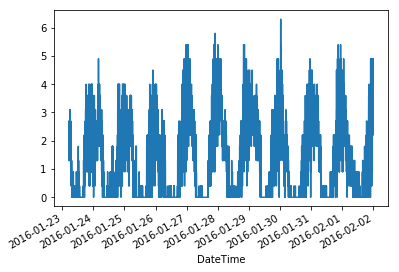

In [10]:
df['Wind Speed']['2016-01-23':'2016-02-01'].plot()

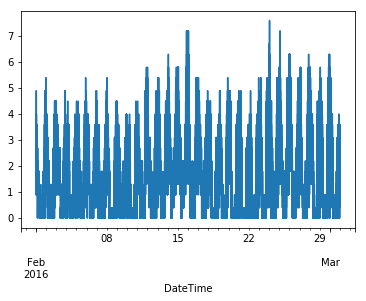

In [11]:
df['Wind Speed']['2016-02-01':'2016-03-01'].plot()

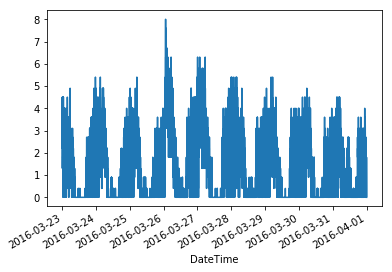

In [12]:
df['Wind Speed']['2016-03-23':'2016-04-01'].plot()

In [13]:
df.drop('Date' , axis = 1 , inplace = True)
df.drop('Time' , axis = 1 , inplace = True)
df.drop('Hi Dir' , axis = 1 , inplace = True)
df.drop('Wind Dir' , axis = 1 , inplace = True)


In [14]:

df.drop('Rain' , axis = 1 , inplace = True)
df.drop('Rain Rate' , axis = 1 , inplace = True)
df.drop('Solar Rad.' , axis = 1 , inplace = True)
df.drop('Solar Energy' , axis = 1 , inplace = True)
df.drop('HI Solar  Rad. ' , axis = 1 , inplace = True)
df.drop('UV Index' , axis = 1 , inplace = True)
df.drop('UV Dose' , axis = 1 , inplace = True)
df.drop('Hi UV ' , axis = 1 , inplace = True)
df.drop('Heat D-D ' , axis = 1 , inplace = True)
df.drop('Wind Tx ' , axis = 1 , inplace = True)
df.drop('Arc. Int.' , axis = 1 , inplace = True)

In [15]:
df.dtypes

Temp Out          float64
Hi Temp           float64
Low Temp          float64
Out Hum             int64
Dew Pt.           float64
Wind Speed        float64
Wind Run          float64
Hi Speed          float64
Wind Chill        float64
Heat Index        float64
THW Index         float64
THSW Index        float64
Bar               float64
Cool D-D          float64
In Temp           float64
In Hum              int64
In Dew            float64
In Heat           float64
In EMC            float64
In Air Density    float64
ET                float64
Wind Samp           int64
ISS Recept        float64
dtype: object

In [16]:
df.head(5)

Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
DateTime                                                             
2016-01-23 05:01:00      77.9     77.9      77.9       77     70.1   
2016-01-23 05:02:00      77.9     77.9      77.9       77     70.1   
2016-01-23 05:03:00      77.9     77.9      77.9       77     70.1   
2016-01-23 05:04:00      77.8     77.9      77.8       77     70.0   
2016-01-23 05:05:00      77.8     77.8      77.8       77     70.0   

                     Wind Speed  Wind Run  Hi Speed  Wind Chill  Heat Index  \
DateTime                                                                      
2016-01-23 05:01:00         1.8      0.11       2.7        77.9        80.8   
2016-01-23 05:02:00         2.2      0.13       2.7        77.9        80.8   
2016-01-23 05:03:00         2.2      0.13       2.7        77.9        80.8   
2016-01-23 05:04:00         2.2      0.13       3.1        77.8        80.7   
2016-01-23 05:05:00         1.8      0.11       2.2        77.8        80.7   

                        ...      Cool D-D   In Temp  In Hum  In Dew  In Heat  \
DateTime                ...                                                    
2016-01-23 05:01:00     ...          0.009     88.9      50    67.9     93.5   
2016-01-23 05:02:00     ...          0.009     88.9      50    67.9     93.5   
2016-01-23 05:03:00     ...          0.009     88.9      50    67.9     93.5   
2016-01-23 05:04:00     ...          0.009     88.9      50    67.9     93.5   
2016-01-23 05:05:00     ...          0.009     88.9      51    68.4     93.8   

                     In EMC  In Air Density  ET   Wind Samp  ISS Recept  
DateTime                                                                 
2016-01-23 05:01:00    9.05          1.1316  0.0         24       100.0  
2016-01-23 05:02:00    9.05          1.1317  0.0         23       100.0  
2016-01-23 05:03:00    9.05          1.1316  0.0         24       100.0  
2016-01-23 05:04:00    9.05          1.1317  0.0         23       100.0  
2016-01-23 05:05:00    9.17          1.1312  0.0         23       100.0  

[5 rows x 23 columns]

In [17]:
df.isna().any()

Temp Out          False
Hi Temp           False
Low Temp          False
Out Hum           False
Dew Pt.           False
Wind Speed        False
Wind Run          False
Hi Speed          False
Wind Chill        False
Heat Index        False
THW Index         False
THSW Index         True
Bar               False
Cool D-D          False
In Temp           False
In Hum            False
In Dew            False
In Heat           False
In EMC            False
In Air Density    False
ET                False
Wind Samp         False
ISS Recept        False
dtype: bool

In [18]:
df.drop('THSW Index' , axis=1  , inplace=True)

In [19]:
target_names = ['Wind Speed']


In [20]:
shift_steps = 1

In [21]:
df_targets = df[target_names].shift(-shift_steps)

In [22]:
df[target_names].head(shift_steps +5)

Wind Speed
DateTime                       
2016-01-23 05:01:00         1.8
2016-01-23 05:02:00         2.2
2016-01-23 05:03:00         2.2
2016-01-23 05:04:00         2.2
2016-01-23 05:05:00         1.8
2016-01-23 05:06:00         2.7

In [23]:
df_targets.tail(10)

Wind Speed
DateTime                       
2016-03-31 23:51:00         0.4
2016-03-31 23:52:00         0.0
2016-03-31 23:53:00         0.4
2016-03-31 23:54:00         0.9
2016-03-31 23:55:00         0.4
2016-03-31 23:56:00         1.8
2016-03-31 23:57:00         0.4
2016-03-31 23:58:00         0.9
2016-03-31 23:59:00         0.0
2016-04-01 00:00:00         NaN

In [24]:
x_data = df.values[0:-shift_steps]

In [25]:
num_data = len(x_data)
num_data

98992

In [26]:
y_data = df_targets.values[:-shift_steps]

In [27]:
x_train = x_data
x_test = x_data

In [28]:
x_test

array([[ 77.9,  77.9,  77.9, ...,   0. ,  24. , 100. ],
       [ 77.9,  77.9,  77.9, ...,   0. ,  23. , 100. ],
       [ 77.9,  77.9,  77.9, ...,   0. ,  24. , 100. ],
       ...,
       [ 98.6,  98.6,  98.5, ...,   0. ,  24. , 100. ],
       [ 98.7,  98.7,  98.6, ...,   0. ,  23. , 100. ],
       [ 98.8,  98.8,  98.7, ...,   0. ,  23. , 100. ]])

In [29]:
y_train = y_data
y_test = y_data

In [30]:
y_train

array([[2.2],
       [2.2],
       [2.2],
       ...,
       [0.4],
       [0.9],
       [0. ]])

In [31]:
y_test

array([[2.2],
       [2.2],
       [2.2],
       ...,
       [0.4],
       [0.9],
       [0. ]])

In [32]:
num_x_signals = x_data.shape[1]
num_x_signals

22

In [33]:
num_y_signals = y_data.shape[1]
num_y_signals

1

In [34]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 762.6


In [35]:
x_scaler = MinMaxScaler()

In [36]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [37]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0000000000000004


In [38]:
x_test_scaled = x_scaler.transform(x_test)

In [39]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [40]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(98992, 22)
(98992, 1)


In [41]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_data - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [42]:
batch_size = 3

In [43]:
sequence_length = 60*4
sequence_length

240

In [44]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [45]:
x_batch, y_batch = next(generator)

In [46]:
print(x_batch.shape)
print(y_batch.shape)

(3, 240, 22)
(3, 240, 1)


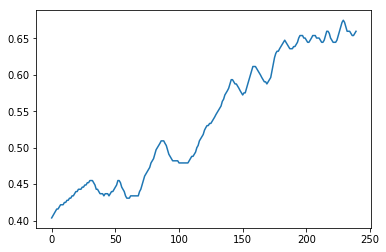

In [47]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

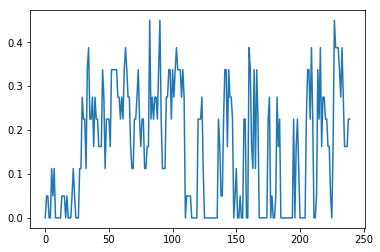

In [48]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [49]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [50]:
model = Sequential()

In [51]:
model.add(LSTM(units=1024,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))

In [52]:
#model.add(LSTM(units=256))

In [53]:
model.add(Dense(num_y_signals, activation='sigmoid'))

In [54]:
#if False:
 #   from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
#    init = RandomUniform(minval=-0.05, maxval=0.05)

 #   model.add(Dense(num_y_signals,
  #                  activation='linear',
   #                 kernel_initializer=init))

In [55]:
warmup_steps = 50

In [56]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [57]:
optimizer = RMSprop(lr=1e-4)

In [58]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer,metrics=['accuracy'])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 1024)        4288512   
_________________________________________________________________
dense (Dense)                (None, None, 1)           1025      
Total params: 4,289,537
Trainable params: 4,289,537
Non-trainable params: 0
_________________________________________________________________


In [60]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [61]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [62]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [63]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [64]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [65]:
%%time
model.fit_generator(generator=generator,
                    epochs=20,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/20
 99/100 [============================>.] - ETA: 1s - loss: 0.0192 - acc: 0.3052
Epoch 00001: val_loss improved from inf to 0.00975, saving model to 23_checkpoint.keras
100/100 [==============================] - 226s 2s/step - loss: 0.0190 - acc: 0.3031 - val_loss: 0.0097 - val_acc: 0.2689
Epoch 2/20
 99/100 [============================>.] - ETA: 1s - loss: 0.0107 - acc: 0.2308
Epoch 00002: val_loss improved from 0.00975 to 0.00858, saving model to 23_checkpoint.keras
100/100 [==============================] - 235s 2s/step - loss: 0.0107 - acc: 0.2294 - val_loss: 0.0086 - val_acc: 0.2689
Epoch 3/20
 99/100 [============================>.] - ETA: 1s - loss: 0.0098 - acc: 0.2748
Epoch 00003: val_loss improved from 0.00858 to 0.00769, saving model to 23_checkpoint.keras
100/100 [==============================] - 221s 2s/step - loss: 0.0097 - acc: 0.2751 - val_loss: 0.0077 - val_acc: 0.2689
Epoch 4/20
 99/100 [============================>.] - ETA: 1s - loss: 0.0077 - acc: 0.282

In [66]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [67]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 73s 73s/step


In [68]:
# If you have several metrics you can use this instead.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

In [136]:
path = open(r'''D:\dkish\Documents\Files\MACHINELEARNING\TrichyWeatherDataWindspeed\Formatted\20167.csv''')
ff = pd.read_csv(path, sep=',', header=0  , index_col=False , na_values = '---' )

In [137]:
ff.head(1)

Date   Time  Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
0  01-23-2017  05:01      71.1     71.1      71.1       86     66.7   

   Wind Speed Wind Dir  Wind Run    ...      In Hum In Dew  In Heat  In EMC  \
0         0.0      NaN       0.0    ...          49   65.1     88.9    8.85   

   In Air Density  ET   Wind Samp  Wind Tx   ISS Recept  Arc. Int.  
0          1.1412  0.0         24         1       100.0          1  

[1 rows x 38 columns]

In [138]:
datestr1 = ff[['Date', 'Time']].apply(_date_string, axis=1)
ff['DateTime'] = pd.to_datetime(datestr1, format='%m%d%Y%H%M')

01232017
0501
01232017
0502
01232017
0503
01232017
0504
01232017
0505
01232017
0506
01232017
0507
01232017
0508
01232017
0509
01232017
0510
01232017
0511
01232017
0512
01232017
0513
01232017
0514
01232017
0515
01232017
0516
01232017
0517
01232017
0518
01232017
0519
01232017
0520
01232017
0521
01232017
0522
01232017
0523
01232017
0524
01232017
0525
01232017
0526
01232017
0527
01232017
0528
01232017
0529
01232017
0530
01232017
0531
01232017
0532
01232017
0533
01232017
0534
01232017
0535
01232017
0536
01232017
0537
01232017
0538
01232017
0539
01232017
0540
01232017
0541
01232017
0542
01232017
0543
01232017
0544
01232017
0545
01232017
0546
01232017
0547
01232017
0548
01232017
0549
01232017
0550
01232017
0551
01232017
0552
01232017
0553
01232017
0554
01232017
0555
01232017
0556
01232017
0557
01232017
0558
01232017
0559
01232017
0600
01232017
0601
01232017
0602
01232017
0603
01232017
0604
01232017
0605
01232017
0606
01232017
0607
01232017
0608
01232017
0609
01232017
0610
01232017
0611
012320

2006
01232017
2007
01232017
2008
01232017
2009
01232017
2010
01232017
2011
01232017
2012
01232017
2013
01232017
2014
01232017
2015
01232017
2016
01232017
2017
01232017
2018
01232017
2019
01232017
2020
01232017
2021
01232017
2022
01232017
2023
01232017
2024
01232017
2025
01232017
2026
01232017
2027
01232017
2028
01232017
2029
01232017
2030
01232017
2031
01232017
2032
01232017
2033
01232017
2034
01232017
2035
01232017
2036
01232017
2037
01232017
2038
01232017
2039
01232017
2040
01232017
2041
01232017
2042
01232017
2043
01232017
2044
01232017
2045
01232017
2046
01232017
2047
01232017
2048
01232017
2049
01232017
2050
01232017
2051
01232017
2052
01232017
2053
01232017
2054
01232017
2055
01232017
2056
01232017
2057
01232017
2058
01232017
2059
01232017
2100
01232017
2101
01232017
2102
01232017
2103
01232017
2104
01232017
2105
01232017
2106
01232017
2107
01232017
2108
01232017
2109
01232017
2110
01232017
2111
01232017
2112
01232017
2113
01232017
2114
01232017
2115
01232017
2116
01232017
2117
0

01242017
0839
01242017
0840
01242017
0841
01242017
0842
01242017
0843
01242017
0844
01242017
0845
01242017
0846
01242017
0847
01242017
0848
01242017
0849
01242017
0850
01242017
0851
01242017
0852
01242017
0853
01242017
0854
01242017
0855
01242017
0856
01242017
0857
01242017
0858
01242017
0859
01242017
0900
01242017
0901
01242017
0902
01242017
0903
01242017
0904
01242017
0905
01242017
0906
01242017
0907
01242017
0908
01242017
0909
01242017
0910
01242017
0911
01242017
0912
01242017
0913
01242017
0914
01242017
0915
01242017
0916
01242017
0917
01242017
0918
01242017
0919
01242017
0920
01242017
0921
01242017
0922
01242017
0923
01242017
0924
01242017
0925
01242017
0926
01242017
0927
01242017
0928
01242017
0929
01242017
0930
01242017
0931
01242017
0932
01242017
0933
01242017
0934
01242017
0935
01242017
0936
01242017
0937
01242017
0938
01242017
0939
01242017
0940
01242017
0941
01242017
0942
01242017
0943
01242017
0944
01242017
0945
01242017
0946
01242017
0947
01242017
0948
01242017
0949
012420

2108
01242017
2109
01242017
2110
01242017
2111
01242017
2112
01242017
2113
01242017
2114
01242017
2115
01242017
2116
01242017
2117
01242017
2118
01242017
2119
01242017
2120
01242017
2121
01242017
2122
01242017
2123
01242017
2124
01242017
2125
01242017
2126
01242017
2127
01242017
2128
01242017
2129
01242017
2130
01242017
2131
01242017
2132
01242017
2133
01242017
2134
01242017
2135
01242017
2136
01242017
2137
01242017
2138
01242017
2139
01242017
2140
01242017
2141
01242017
2142
01242017
2143
01242017
2144
01242017
2145
01242017
2146
01242017
2147
01242017
2148
01242017
2149
01242017
2150
01242017
2151
01242017
2152
01242017
2153
01242017
2154
01242017
2155
01242017
2156
01242017
2157
01242017
2158
01242017
2159
01242017
2200
01242017
2201
01242017
2202
01242017
2203
01242017
2204
01242017
2205
01242017
2206
01242017
2207
01242017
2208
01242017
2209
01242017
2210
01242017
2211
01242017
2212
01242017
2213
01242017
2214
01242017
2215
01242017
2216
01242017
2217
01242017
2218
01242017
2219
0

01252017
1250
01252017
1251
01252017
1252
01252017
1253
01252017
1254
01252017
1255
01252017
1256
01252017
1257
01252017
1258
01252017
1259
01252017
1300
01252017
1301
01252017
1302
01252017
1303
01252017
1304
01252017
1305
01252017
1306
01252017
1307
01252017
1308
01252017
1309
01252017
1310
01252017
1311
01252017
1312
01252017
1313
01252017
1314
01252017
1315
01252017
1316
01252017
1317
01252017
1318
01252017
1319
01252017
1320
01252017
1321
01252017
1322
01252017
1323
01252017
1324
01252017
1325
01252017
1326
01252017
1327
01252017
1328
01252017
1329
01252017
1330
01252017
1331
01252017
1332
01252017
1333
01252017
1334
01252017
1335
01252017
1336
01252017
1337
01252017
1338
01252017
1339
01252017
1340
01252017
1341
01252017
1342
01252017
1343
01252017
1344
01252017
1345
01252017
1346
01252017
1347
01252017
1348
01252017
1349
01252017
1350
01252017
1351
01252017
1352
01252017
1353
01252017
1354
01252017
1355
01252017
1356
01252017
1357
01252017
1358
01252017
1359
01252017
1400
012520

0220
01262017
0221
01262017
0222
01262017
0223
01262017
0224
01262017
0225
01262017
0226
01262017
0227
01262017
0228
01262017
0229
01262017
0230
01262017
0231
01262017
0232
01262017
0233
01262017
0234
01262017
0235
01262017
0236
01262017
0237
01262017
0238
01262017
0239
01262017
0240
01262017
0241
01262017
0242
01262017
0243
01262017
0244
01262017
0245
01262017
0246
01262017
0247
01262017
0248
01262017
0249
01262017
0250
01262017
0251
01262017
0252
01262017
0253
01262017
0254
01262017
0255
01262017
0256
01262017
0257
01262017
0258
01262017
0259
01262017
0300
01262017
0301
01262017
0302
01262017
0303
01262017
0304
01262017
0305
01262017
0306
01262017
0307
01262017
0308
01262017
0309
01262017
0310
01262017
0311
01262017
0312
01262017
0313
01262017
0314
01262017
0315
01262017
0316
01262017
0317
01262017
0318
01262017
0319
01262017
0320
01262017
0321
01262017
0322
01262017
0323
01262017
0324
01262017
0325
01262017
0326
01262017
0327
01262017
0328
01262017
0329
01262017
0330
01262017
0331
0

01262017
1900
01262017
1901
01262017
1902
01262017
1903
01262017
1904
01262017
1905
01262017
1906
01262017
1907
01262017
1908
01262017
1909
01262017
1910
01262017
1911
01262017
1912
01262017
1913
01262017
1914
01262017
1915
01262017
1916
01262017
1917
01262017
1918
01262017
1919
01262017
1920
01262017
1921
01262017
1922
01262017
1923
01262017
1924
01262017
1925
01262017
1926
01262017
1927
01262017
1928
01262017
1929
01262017
1930
01262017
1931
01262017
1932
01262017
1933
01262017
1934
01262017
1935
01262017
1936
01262017
1937
01262017
1938
01262017
1939
01262017
1940
01262017
1941
01262017
1942
01262017
1943
01262017
1944
01262017
1945
01262017
1946
01262017
1947
01262017
1948
01262017
1949
01262017
1950
01262017
1951
01262017
1952
01262017
1953
01262017
1954
01262017
1955
01262017
1956
01262017
1957
01262017
1958
01262017
1959
01262017
2000
01262017
2001
01262017
2002
01262017
2003
01262017
2004
01262017
2005
01262017
2006
01262017
2007
01262017
2008
01262017
2009
01262017
2010
012620

1139
01272017
1140
01272017
1141
01272017
1142
01272017
1143
01272017
1144
01272017
1145
01272017
1146
01272017
1147
01272017
1148
01272017
1149
01272017
1150
01272017
1151
01272017
1152
01272017
1153
01272017
1154
01272017
1155
01272017
1156
01272017
1157
01272017
1158
01272017
1159
01272017
1200
01272017
1201
01272017
1202
01272017
1203
01272017
1204
01272017
1205
01272017
1206
01272017
1207
01272017
1208
01272017
1209
01272017
1210
01272017
1211
01272017
1212
01272017
1213
01272017
1214
01272017
1215
01272017
1216
01272017
1217
01272017
1218
01272017
1219
01272017
1220
01272017
1221
01272017
1222
01272017
1223
01272017
1224
01272017
1225
01272017
1226
01272017
1227
01272017
1228
01272017
1229
01272017
1230
01272017
1231
01272017
1232
01272017
1233
01272017
1234
01272017
1235
01272017
1236
01272017
1237
01272017
1238
01272017
1239
01272017
1240
01272017
1241
01272017
1242
01272017
1243
01272017
1244
01272017
1245
01272017
1246
01272017
1247
01272017
1248
01272017
1249
01272017
1250
0

01282017
0248
01282017
0249
01282017
0250
01282017
0251
01282017
0252
01282017
0253
01282017
0254
01282017
0255
01282017
0256
01282017
0257
01282017
0258
01282017
0259
01282017
0300
01282017
0301
01282017
0302
01282017
0303
01282017
0304
01282017
0305
01282017
0306
01282017
0307
01282017
0308
01282017
0309
01282017
0310
01282017
0311
01282017
0312
01282017
0313
01282017
0314
01282017
0315
01282017
0316
01282017
0317
01282017
0318
01282017
0319
01282017
0320
01282017
0321
01282017
0322
01282017
0323
01282017
0324
01282017
0325
01282017
0326
01282017
0327
01282017
0328
01282017
0329
01282017
0330
01282017
0331
01282017
0332
01282017
0333
01282017
0334
01282017
0335
01282017
0336
01282017
0337
01282017
0338
01282017
0339
01282017
0340
01282017
0341
01282017
0342
01282017
0343
01282017
0344
01282017
0345
01282017
0346
01282017
0347
01282017
0348
01282017
0349
01282017
0350
01282017
0351
01282017
0352
01282017
0353
01282017
0354
01282017
0355
01282017
0356
01282017
0357
01282017
0358
012820

1651
01282017
1652
01282017
1653
01282017
1654
01282017
1655
01282017
1656
01282017
1657
01282017
1658
01282017
1659
01282017
1700
01282017
1701
01282017
1702
01282017
1703
01282017
1704
01282017
1705
01282017
1706
01282017
1707
01282017
1708
01282017
1709
01282017
1710
01282017
1711
01282017
1712
01282017
1713
01282017
1714
01282017
1715
01282017
1716
01282017
1717
01282017
1718
01282017
1719
01282017
1720
01282017
1721
01282017
1722
01282017
1723
01282017
1724
01282017
1725
01282017
1726
01282017
1727
01282017
1728
01282017
1729
01282017
1730
01282017
1731
01282017
1732
01282017
1733
01282017
1734
01282017
1735
01282017
1736
01282017
1737
01282017
1738
01282017
1739
01282017
1740
01282017
1741
01282017
1742
01282017
1743
01282017
1744
01282017
1745
01282017
1746
01282017
1747
01282017
1748
01282017
1749
01282017
1750
01282017
1751
01282017
1752
01282017
1753
01282017
1754
01282017
1755
01282017
1756
01282017
1757
01282017
1758
01282017
1759
01282017
1800
01282017
1801
01282017
1802
0

01292017
0931
01292017
0932
01292017
0933
01292017
0934
01292017
0935
01292017
0936
01292017
0937
01292017
0938
01292017
0939
01292017
0940
01292017
0941
01292017
0942
01292017
0943
01292017
0944
01292017
0945
01292017
0946
01292017
0947
01292017
0948
01292017
0949
01292017
0950
01292017
0951
01292017
0952
01292017
0953
01292017
0954
01292017
0955
01292017
0956
01292017
0957
01292017
0958
01292017
0959
01292017
1000
01292017
1001
01292017
1002
01292017
1003
01292017
1004
01292017
1005
01292017
1006
01292017
1007
01292017
1008
01292017
1009
01292017
1010
01292017
1011
01292017
1012
01292017
1013
01292017
1014
01292017
1015
01292017
1016
01292017
1017
01292017
1018
01292017
1019
01292017
1020
01292017
1021
01292017
1022
01292017
1023
01292017
1024
01292017
1025
01292017
1026
01292017
1027
01292017
1028
01292017
1029
01292017
1030
01292017
1031
01292017
1032
01292017
1033
01292017
1034
01292017
1035
01292017
1036
01292017
1037
01292017
1038
01292017
1039
01292017
1040
01292017
1041
012920

0213
01302017
0214
01302017
0215
01302017
0216
01302017
0217
01302017
0218
01302017
0219
01302017
0220
01302017
0221
01302017
0222
01302017
0223
01302017
0224
01302017
0225
01302017
0226
01302017
0227
01302017
0228
01302017
0229
01302017
0230
01302017
0231
01302017
0232
01302017
0233
01302017
0234
01302017
0235
01302017
0236
01302017
0237
01302017
0238
01302017
0239
01302017
0240
01302017
0241
01302017
0242
01302017
0243
01302017
0244
01302017
0245
01302017
0246
01302017
0247
01302017
0248
01302017
0249
01302017
0250
01302017
0251
01302017
0252
01302017
0253
01302017
0254
01302017
0255
01302017
0256
01302017
0257
01302017
0258
01302017
0259
01302017
0300
01302017
0301
01302017
0302
01302017
0303
01302017
0304
01302017
0305
01302017
0306
01302017
0307
01302017
0308
01302017
0309
01302017
0310
01302017
0311
01302017
0312
01302017
0313
01302017
0314
01302017
0315
01302017
0316
01302017
0317
01302017
0318
01302017
0319
01302017
0320
01302017
0321
01302017
0322
01302017
0323
01302017
0324
0

01302017
1853
01302017
1854
01302017
1855
01302017
1856
01302017
1857
01302017
1858
01302017
1859
01302017
1900
01302017
1901
01302017
1902
01302017
1903
01302017
1904
01302017
1905
01302017
1906
01302017
1907
01302017
1908
01302017
1909
01302017
1910
01302017
1911
01302017
1912
01302017
1913
01302017
1914
01302017
1915
01302017
1916
01302017
1917
01302017
1918
01302017
1919
01302017
1920
01302017
1921
01302017
1922
01302017
1923
01302017
1924
01302017
1925
01302017
1926
01302017
1927
01302017
1928
01302017
1929
01302017
1930
01302017
1931
01302017
1932
01302017
1933
01302017
1934
01302017
1935
01302017
1936
01302017
1937
01302017
1938
01302017
1939
01302017
1940
01302017
1941
01302017
1942
01302017
1943
01302017
1944
01302017
1945
01302017
1946
01302017
1947
01302017
1948
01302017
1949
01302017
1950
01302017
1951
01302017
1952
01302017
1953
01302017
1954
01302017
1955
01302017
1956
01302017
1957
01302017
1958
01302017
1959
01302017
2000
01302017
2001
01302017
2002
01302017
2003
013020

1135
01312017
1136
01312017
1137
01312017
1138
01312017
1139
01312017
1140
01312017
1141
01312017
1142
01312017
1143
01312017
1144
01312017
1145
01312017
1146
01312017
1147
01312017
1148
01312017
1149
01312017
1150
01312017
1151
01312017
1152
01312017
1153
01312017
1154
01312017
1155
01312017
1156
01312017
1157
01312017
1158
01312017
1159
01312017
1200
01312017
1201
01312017
1202
01312017
1203
01312017
1204
01312017
1205
01312017
1206
01312017
1207
01312017
1208
01312017
1209
01312017
1210
01312017
1211
01312017
1212
01312017
1213
01312017
1214
01312017
1215
01312017
1216
01312017
1217
01312017
1218
01312017
1219
01312017
1220
01312017
1221
01312017
1222
01312017
1223
01312017
1224
01312017
1225
01312017
1226
01312017
1227
01312017
1228
01312017
1229
01312017
1230
01312017
1231
01312017
1232
01312017
1233
01312017
1234
01312017
1235
01312017
1236
01312017
1237
01312017
1238
01312017
1239
01312017
1240
01312017
1241
01312017
1242
01312017
1243
01312017
1244
01312017
1245
01312017
1246
0

02012017
0415
02012017
0416
02012017
0417
02012017
0418
02012017
0419
02012017
0420
02012017
0421
02012017
0422
02012017
0423
02012017
0424
02012017
0425
02012017
0426
02012017
0427
02012017
0428
02012017
0429
02012017
0430
02012017
0431
02012017
0432
02012017
0433
02012017
0434
02012017
0435
02012017
0436
02012017
0437
02012017
0438
02012017
0439
02012017
0440
02012017
0441
02012017
0442
02012017
0443
02012017
0444
02012017
0445
02012017
0446
02012017
0447
02012017
0448
02012017
0449
02012017
0450
02012017
0451
02012017
0452
02012017
0453
02012017
0454
02012017
0455
02012017
0456
02012017
0457
02012017
0458
02012017
0459
02012017
0500
02012017
0501
02012017
0502
02012017
0503
02012017
0504
02012017
0505
02012017
0506
02012017
0507
02012017
0508
02012017
0509
02012017
0510
02012017
0511
02012017
0512
02012017
0513
02012017
0514
02012017
0515
02012017
0516
02012017
0517
02012017
0518
02012017
0519
02012017
0520
02012017
0521
02012017
0522
02012017
0523
02012017
0524
02012017
0525
020120

2054
02012017
2055
02012017
2056
02012017
2057
02012017
2058
02012017
2059
02012017
2100
02012017
2101
02012017
2102
02012017
2103
02012017
2104
02012017
2105
02012017
2106
02012017
2107
02012017
2108
02012017
2109
02012017
2110
02012017
2111
02012017
2112
02012017
2113
02012017
2114
02012017
2115
02012017
2116
02012017
2117
02012017
2118
02012017
2119
02012017
2120
02012017
2121
02012017
2122
02012017
2123
02012017
2124
02012017
2125
02012017
2126
02012017
2127
02012017
2128
02012017
2129
02012017
2130
02012017
2131
02012017
2132
02012017
2133
02012017
2134
02012017
2135
02012017
2136
02012017
2137
02012017
2138
02012017
2139
02012017
2140
02012017
2141
02012017
2142
02012017
2143
02012017
2144
02012017
2145
02012017
2146
02012017
2147
02012017
2148
02012017
2149
02012017
2150
02012017
2151
02012017
2152
02012017
2153
02012017
2154
02012017
2155
02012017
2156
02012017
2157
02012017
2158
02012017
2159
02012017
2200
02012017
2201
02012017
2202
02012017
2203
02012017
2204
02012017
2205
0

02022017
1445
02022017
1446
02022017
1447
02022017
1448
02022017
1449
02022017
1450
02022017
1451
02022017
1452
02022017
1453
02022017
1454
02022017
1455
02022017
1456
02022017
1457
02022017
1458
02022017
1459
02022017
1500
02022017
1501
02022017
1502
02022017
1503
02022017
1504
02022017
1505
02022017
1506
02022017
1507
02022017
1508
02022017
1509
02022017
1510
02022017
1511
02022017
1512
02022017
1513
02022017
1514
02022017
1515
02022017
1516
02022017
1517
02022017
1518
02022017
1519
02022017
1520
02022017
1521
02022017
1522
02022017
1523
02022017
1524
02022017
1525
02022017
1526
02022017
1527
02022017
1528
02022017
1529
02022017
1530
02022017
1531
02022017
1532
02022017
1533
02022017
1534
02022017
1535
02022017
1536
02022017
1537
02022017
1538
02022017
1539
02022017
1540
02022017
1541
02022017
1542
02022017
1543
02022017
1544
02022017
1545
02022017
1546
02022017
1547
02022017
1548
02022017
1549
02022017
1550
02022017
1551
02022017
1552
02022017
1553
02022017
1554
02022017
1555
020220

0724
02032017
0725
02032017
0726
02032017
0727
02032017
0728
02032017
0729
02032017
0730
02032017
0731
02032017
0732
02032017
0733
02032017
0734
02032017
0735
02032017
0736
02032017
0737
02032017
0738
02032017
0739
02032017
0740
02032017
0741
02032017
0742
02032017
0743
02032017
0744
02032017
0745
02032017
0746
02032017
0747
02032017
0748
02032017
0749
02032017
0750
02032017
0751
02032017
0752
02032017
0753
02032017
0754
02032017
0755
02032017
0756
02032017
0757
02032017
0758
02032017
0759
02032017
0800
02032017
0801
02032017
0802
02032017
0803
02032017
0804
02032017
0805
02032017
0806
02032017
0807
02032017
0808
02032017
0809
02032017
0810
02032017
0811
02032017
0812
02032017
0813
02032017
0814
02032017
0815
02032017
0816
02032017
0817
02032017
0818
02032017
0819
02032017
0820
02032017
0821
02032017
0822
02032017
0823
02032017
0824
02032017
0825
02032017
0826
02032017
0827
02032017
0828
02032017
0829
02032017
0830
02032017
0831
02032017
0832
02032017
0833
02032017
0834
02032017
0835
0

02042017
0004
02042017
0005
02042017
0006
02042017
0007
02042017
0008
02042017
0009
02042017
0010
02042017
0011
02042017
0012
02042017
0013
02042017
0014
02042017
0015
02042017
0016
02042017
0017
02042017
0018
02042017
0019
02042017
0020
02042017
0021
02042017
0022
02042017
0023
02042017
0024
02042017
0025
02042017
0026
02042017
0027
02042017
0028
02042017
0029
02042017
0030
02042017
0031
02042017
0032
02042017
0033
02042017
0034
02042017
0035
02042017
0036
02042017
0037
02042017
0038
02042017
0039
02042017
0040
02042017
0041
02042017
0042
02042017
0043
02042017
0044
02042017
0045
02042017
0046
02042017
0047
02042017
0048
02042017
0049
02042017
0050
02042017
0051
02042017
0052
02042017
0053
02042017
0054
02042017
0055
02042017
0056
02042017
0057
02042017
0058
02042017
0059
02042017
0100
02042017
0101
02042017
0102
02042017
0103
02042017
0104
02042017
0105
02042017
0106
02042017
0107
02042017
0108
02042017
0109
02042017
0110
02042017
0111
02042017
0112
02042017
0113
02042017
0114
020420

1647
02042017
1648
02042017
1649
02042017
1650
02042017
1651
02042017
1652
02042017
1653
02042017
1654
02042017
1655
02042017
1656
02042017
1657
02042017
1658
02042017
1659
02042017
1700
02042017
1701
02042017
1702
02042017
1703
02042017
1704
02042017
1705
02042017
1706
02042017
1707
02042017
1708
02042017
1709
02042017
1710
02042017
1711
02042017
1712
02042017
1713
02042017
1714
02042017
1715
02042017
1716
02042017
1717
02042017
1718
02042017
1719
02042017
1720
02042017
1721
02042017
1722
02042017
1723
02042017
1724
02042017
1725
02042017
1726
02042017
1727
02042017
1728
02042017
1729
02042017
1730
02042017
1731
02042017
1732
02042017
1733
02042017
1734
02042017
1735
02042017
1736
02042017
1737
02042017
1738
02042017
1739
02042017
1740
02042017
1741
02042017
1742
02042017
1743
02042017
1744
02042017
1745
02042017
1746
02042017
1747
02042017
1748
02042017
1749
02042017
1750
02042017
1751
02042017
1752
02042017
1753
02042017
1754
02042017
1755
02042017
1756
02042017
1757
02042017
1758
0

02052017
0927
02052017
0928
02052017
0929
02052017
0930
02052017
0931
02052017
0932
02052017
0933
02052017
0934
02052017
0935
02052017
0936
02052017
0937
02052017
0938
02052017
0939
02052017
0940
02052017
0941
02052017
0942
02052017
0943
02052017
0944
02052017
0945
02052017
0946
02052017
0947
02052017
0948
02052017
0949
02052017
0950
02052017
0951
02052017
0952
02052017
0953
02052017
0954
02052017
0955
02052017
0956
02052017
0957
02052017
0958
02052017
0959
02052017
1000
02052017
1001
02052017
1002
02052017
1003
02052017
1004
02052017
1005
02052017
1006
02052017
1007
02052017
1008
02052017
1009
02052017
1010
02052017
1011
02052017
1012
02052017
1013
02052017
1014
02052017
1015
02052017
1016
02052017
1017
02052017
1018
02052017
1019
02052017
1020
02052017
1021
02052017
1022
02052017
1023
02052017
1024
02052017
1025
02052017
1026
02052017
1027
02052017
1028
02052017
1029
02052017
1030
02052017
1031
02052017
1032
02052017
1033
02052017
1034
02052017
1035
02052017
1036
02052017
1037
020520

0209
02062017
0210
02062017
0211
02062017
0212
02062017
0213
02062017
0214
02062017
0215
02062017
0216
02062017
0217
02062017
0218
02062017
0219
02062017
0220
02062017
0221
02062017
0222
02062017
0223
02062017
0224
02062017
0225
02062017
0226
02062017
0227
02062017
0228
02062017
0229
02062017
0230
02062017
0231
02062017
0232
02062017
0233
02062017
0234
02062017
0235
02062017
0236
02062017
0237
02062017
0238
02062017
0239
02062017
0240
02062017
0241
02062017
0242
02062017
0243
02062017
0244
02062017
0245
02062017
0246
02062017
0247
02062017
0248
02062017
0249
02062017
0250
02062017
0251
02062017
0252
02062017
0253
02062017
0254
02062017
0255
02062017
0256
02062017
0257
02062017
0258
02062017
0259
02062017
0300
02062017
0301
02062017
0302
02062017
0303
02062017
0304
02062017
0305
02062017
0306
02062017
0307
02062017
0308
02062017
0309
02062017
0310
02062017
0311
02062017
0312
02062017
0313
02062017
0314
02062017
0315
02062017
0316
02062017
0317
02062017
0318
02062017
0319
02062017
0320
0

02062017
1849
02062017
1850
02062017
1851
02062017
1852
02062017
1853
02062017
1854
02062017
1855
02062017
1856
02062017
1857
02062017
1858
02062017
1859
02062017
1900
02062017
1901
02062017
1902
02062017
1903
02062017
1904
02062017
1905
02062017
1906
02062017
1907
02062017
1908
02062017
1909
02062017
1910
02062017
1911
02062017
1912
02062017
1913
02062017
1914
02062017
1915
02062017
1916
02062017
1917
02062017
1918
02062017
1919
02062017
1920
02062017
1921
02062017
1922
02062017
1923
02062017
1924
02062017
1925
02062017
1926
02062017
1927
02062017
1928
02062017
1929
02062017
1930
02062017
1931
02062017
1932
02062017
1933
02062017
1934
02062017
1935
02062017
1936
02062017
1937
02062017
1938
02062017
1939
02062017
1940
02062017
1941
02062017
1942
02062017
1943
02062017
1944
02062017
1945
02062017
1946
02062017
1947
02062017
1948
02062017
1949
02062017
1950
02062017
1951
02062017
1952
02062017
1953
02062017
1954
02062017
1955
02062017
1956
02062017
1957
02062017
1958
02062017
1959
020620

1128
02072017
1129
02072017
1130
02072017
1131
02072017
1132
02072017
1133
02072017
1134
02072017
1135
02072017
1136
02072017
1137
02072017
1138
02072017
1139
02072017
1140
02072017
1141
02072017
1142
02072017
1143
02072017
1144
02072017
1145
02072017
1146
02072017
1147
02072017
1148
02072017
1149
02072017
1150
02072017
1151
02072017
1152
02072017
1153
02072017
1154
02072017
1155
02072017
1156
02072017
1157
02072017
1158
02072017
1159
02072017
1200
02072017
1201
02072017
1202
02072017
1203
02072017
1204
02072017
1205
02072017
1206
02072017
1207
02072017
1208
02072017
1209
02072017
1210
02072017
1211
02072017
1212
02072017
1213
02072017
1214
02072017
1215
02072017
1216
02072017
1217
02072017
1218
02072017
1219
02072017
1220
02072017
1221
02072017
1222
02072017
1223
02072017
1224
02072017
1225
02072017
1226
02072017
1227
02072017
1228
02072017
1229
02072017
1230
02072017
1231
02072017
1232
02072017
1233
02072017
1234
02072017
1235
02072017
1236
02072017
1237
02072017
1238
02072017
1239
0

02082017
0412
02082017
0413
02082017
0414
02082017
0415
02082017
0416
02082017
0417
02082017
0418
02082017
0419
02082017
0420
02082017
0421
02082017
0422
02082017
0423
02082017
0424
02082017
0425
02082017
0426
02082017
0427
02082017
0428
02082017
0429
02082017
0430
02082017
0431
02082017
0432
02082017
0433
02082017
0434
02082017
0435
02082017
0436
02082017
0437
02082017
0438
02082017
0439
02082017
0440
02082017
0441
02082017
0442
02082017
0443
02082017
0444
02082017
0445
02082017
0446
02082017
0447
02082017
0448
02082017
0449
02082017
0450
02082017
0451
02082017
0452
02082017
0453
02082017
0454
02082017
0455
02082017
0456
02082017
0457
02082017
0458
02082017
0459
02082017
0500
02082017
0501
02082017
0502
02082017
0503
02082017
0504
02082017
0505
02082017
0506
02082017
0507
02082017
0508
02082017
0509
02082017
0510
02082017
0511
02082017
0512
02082017
0513
02082017
0514
02082017
0515
02082017
0516
02082017
0517
02082017
0518
02082017
0519
02082017
0520
02082017
0521
02082017
0522
020820

2051
02082017
2052
02082017
2053
02082017
2054
02082017
2055
02082017
2056
02082017
2057
02082017
2058
02082017
2059
02082017
2100
02082017
2101
02082017
2102
02082017
2103
02082017
2104
02082017
2105
02082017
2106
02082017
2107
02082017
2108
02082017
2109
02082017
2110
02082017
2111
02082017
2112
02082017
2113
02082017
2114
02082017
2115
02082017
2116
02082017
2117
02082017
2118
02082017
2119
02082017
2120
02082017
2121
02082017
2122
02082017
2123
02082017
2124
02082017
2125
02082017
2126
02082017
2127
02082017
2128
02082017
2129
02082017
2130
02082017
2131
02082017
2132
02082017
2133
02082017
2134
02082017
2135
02082017
2136
02082017
2137
02082017
2138
02082017
2139
02082017
2140
02082017
2141
02082017
2142
02082017
2143
02082017
2144
02082017
2145
02082017
2146
02082017
2147
02082017
2148
02082017
2149
02082017
2150
02082017
2151
02082017
2152
02082017
2153
02082017
2154
02082017
2155
02082017
2156
02082017
2157
02082017
2158
02082017
2159
02082017
2200
02082017
2201
02082017
2202
0

02092017
1335
02092017
1336
02092017
1337
02092017
1338
02092017
1339
02092017
1340
02092017
1341
02092017
1342
02092017
1343
02092017
1344
02092017
1345
02092017
1346
02092017
1347
02092017
1348
02092017
1349
02092017
1350
02092017
1351
02092017
1352
02092017
1353
02092017
1354
02092017
1355
02092017
1356
02092017
1357
02092017
1358
02092017
1359
02092017
1400
02092017
1401
02092017
1402
02092017
1403
02092017
1404
02092017
1405
02092017
1406
02092017
1407
02092017
1408
02092017
1409
02092017
1410
02092017
1411
02092017
1412
02092017
1413
02092017
1414
02092017
1415
02092017
1416
02092017
1417
02092017
1418
02092017
1419
02092017
1420
02092017
1421
02092017
1422
02092017
1423
02092017
1424
02092017
1425
02092017
1426
02092017
1427
02092017
1428
02092017
1429
02092017
1430
02092017
1431
02092017
1432
02092017
1433
02092017
1434
02092017
1435
02092017
1436
02092017
1437
02092017
1438
02092017
1439
02092017
1440
02092017
1441
02092017
1442
02092017
1443
02092017
1444
02092017
1445
020920

0614
02102017
0615
02102017
0616
02102017
0617
02102017
0618
02102017
0619
02102017
0620
02102017
0621
02102017
0622
02102017
0623
02102017
0624
02102017
0625
02102017
0626
02102017
0627
02102017
0628
02102017
0629
02102017
0630
02102017
0631
02102017
0632
02102017
0633
02102017
0634
02102017
0635
02102017
0636
02102017
0637
02102017
0638
02102017
0639
02102017
0640
02102017
0641
02102017
0642
02102017
0643
02102017
0644
02102017
0645
02102017
0646
02102017
0647
02102017
0648
02102017
0649
02102017
0650
02102017
0651
02102017
0652
02102017
0653
02102017
0654
02102017
0655
02102017
0656
02102017
0657
02102017
0658
02102017
0659
02102017
0700
02102017
0701
02102017
0702
02102017
0703
02102017
0704
02102017
0705
02102017
0706
02102017
0707
02102017
0708
02102017
0709
02102017
0710
02102017
0711
02102017
0712
02102017
0713
02102017
0714
02102017
0715
02102017
0716
02102017
0717
02102017
0718
02102017
0719
02102017
0720
02102017
0721
02102017
0722
02102017
0723
02102017
0724
02102017
0725
0

02102017
2254
02102017
2255
02102017
2256
02102017
2257
02102017
2258
02102017
2259
02102017
2300
02102017
2301
02102017
2302
02102017
2303
02102017
2304
02102017
2305
02102017
2306
02102017
2307
02102017
2308
02102017
2309
02102017
2310
02102017
2311
02102017
2312
02102017
2313
02102017
2314
02102017
2315
02102017
2316
02102017
2317
02102017
2318
02102017
2319
02102017
2320
02102017
2321
02102017
2322
02102017
2323
02102017
2324
02102017
2325
02102017
2326
02102017
2327
02102017
2328
02102017
2329
02102017
2330
02102017
2331
02102017
2332
02102017
2333
02102017
2334
02102017
2335
02102017
2336
02102017
2337
02102017
2338
02102017
2339
02102017
2340
02102017
2341
02102017
2342
02102017
2343
02102017
2344
02102017
2345
02102017
2346
02102017
2347
02102017
2348
02102017
2349
02102017
2350
02102017
2351
02102017
2352
02102017
2353
02102017
2354
02102017
2355
02102017
2356
02102017
2357
02102017
2358
02102017
2359
02112017
0000
02112017
0001
02112017
0002
02112017
0003
02112017
0004
021120

1536
02112017
1537
02112017
1538
02112017
1539
02112017
1540
02112017
1541
02112017
1542
02112017
1543
02112017
1544
02112017
1545
02112017
1546
02112017
1547
02112017
1548
02112017
1549
02112017
1550
02112017
1551
02112017
1552
02112017
1553
02112017
1554
02112017
1555
02112017
1556
02112017
1557
02112017
1558
02112017
1559
02112017
1600
02112017
1601
02112017
1602
02112017
1603
02112017
1604
02112017
1605
02112017
1606
02112017
1607
02112017
1608
02112017
1609
02112017
1610
02112017
1611
02112017
1612
02112017
1613
02112017
1614
02112017
1615
02112017
1616
02112017
1617
02112017
1618
02112017
1619
02112017
1620
02112017
1621
02112017
1622
02112017
1623
02112017
1624
02112017
1625
02112017
1626
02112017
1627
02112017
1628
02112017
1629
02112017
1630
02112017
1631
02112017
1632
02112017
1633
02112017
1634
02112017
1635
02112017
1636
02112017
1637
02112017
1638
02112017
1639
02112017
1640
02112017
1641
02112017
1642
02112017
1643
02112017
1644
02112017
1645
02112017
1646
02112017
1647
0

02122017
0816
02122017
0817
02122017
0818
02122017
0819
02122017
0820
02122017
0821
02122017
0822
02122017
0823
02122017
0824
02122017
0825
02122017
0826
02122017
0827
02122017
0828
02122017
0829
02122017
0830
02122017
0831
02122017
0832
02122017
0833
02122017
0834
02122017
0835
02122017
0836
02122017
0837
02122017
0838
02122017
0839
02122017
0840
02122017
0841
02122017
0842
02122017
0843
02122017
0844
02122017
0845
02122017
0846
02122017
0847
02122017
0848
02122017
0849
02122017
0850
02122017
0851
02122017
0852
02122017
0853
02122017
0854
02122017
0855
02122017
0856
02122017
0857
02122017
0858
02122017
0859
02122017
0900
02122017
0901
02122017
0902
02122017
0903
02122017
0904
02122017
0905
02122017
0906
02122017
0907
02122017
0908
02122017
0909
02122017
0910
02122017
0911
02122017
0912
02122017
0913
02122017
0914
02122017
0915
02122017
0916
02122017
0917
02122017
0918
02122017
0919
02122017
0920
02122017
0921
02122017
0922
02122017
0923
02122017
0924
02122017
0925
02122017
0926
021220

0055
02132017
0056
02132017
0057
02132017
0058
02132017
0059
02132017
0100
02132017
0101
02132017
0102
02132017
0103
02132017
0104
02132017
0105
02132017
0106
02132017
0107
02132017
0108
02132017
0109
02132017
0110
02132017
0111
02132017
0112
02132017
0113
02132017
0114
02132017
0115
02132017
0116
02132017
0117
02132017
0118
02132017
0119
02132017
0120
02132017
0121
02132017
0122
02132017
0123
02132017
0124
02132017
0125
02132017
0126
02132017
0127
02132017
0128
02132017
0129
02132017
0130
02132017
0131
02132017
0132
02132017
0133
02132017
0134
02132017
0135
02132017
0136
02132017
0137
02132017
0138
02132017
0139
02132017
0140
02132017
0141
02132017
0142
02132017
0143
02132017
0144
02132017
0145
02132017
0146
02132017
0147
02132017
0148
02132017
0149
02132017
0150
02132017
0151
02132017
0152
02132017
0153
02132017
0154
02132017
0155
02132017
0156
02132017
0157
02132017
0158
02132017
0159
02132017
0200
02132017
0201
02132017
0202
02132017
0203
02132017
0204
02132017
0205
02132017
0206
0

02132017
1735
02132017
1736
02132017
1737
02132017
1738
02132017
1739
02132017
1740
02132017
1741
02132017
1742
02132017
1743
02132017
1744
02132017
1745
02132017
1746
02132017
1747
02132017
1748
02132017
1749
02132017
1750
02132017
1751
02132017
1752
02132017
1753
02132017
1754
02132017
1755
02132017
1756
02132017
1757
02132017
1758
02132017
1759
02132017
1800
02132017
1801
02132017
1802
02132017
1803
02132017
1804
02132017
1805
02132017
1806
02132017
1807
02132017
1808
02132017
1809
02132017
1810
02132017
1811
02132017
1812
02132017
1813
02132017
1814
02132017
1815
02132017
1816
02132017
1817
02132017
1818
02132017
1819
02132017
1820
02132017
1821
02132017
1822
02132017
1823
02132017
1824
02132017
1825
02132017
1826
02132017
1827
02132017
1828
02132017
1829
02132017
1830
02132017
1831
02132017
1832
02132017
1833
02132017
1834
02132017
1835
02132017
1836
02132017
1837
02132017
1838
02132017
1839
02132017
1840
02132017
1841
02132017
1842
02132017
1843
02132017
1844
02132017
1845
021320

1014
02142017
1015
02142017
1016
02142017
1017
02142017
1018
02142017
1019
02142017
1020
02142017
1021
02142017
1022
02142017
1023
02142017
1024
02142017
1025
02142017
1026
02142017
1027
02142017
1028
02142017
1029
02142017
1030
02142017
1031
02142017
1032
02142017
1033
02142017
1034
02142017
1035
02142017
1036
02142017
1037
02142017
1038
02142017
1039
02142017
1040
02142017
1041
02142017
1042
02142017
1043
02142017
1044
02142017
1045
02142017
1046
02142017
1047
02142017
1048
02142017
1049
02142017
1050
02142017
1051
02142017
1052
02142017
1053
02142017
1054
02142017
1055
02142017
1056
02142017
1057
02142017
1058
02142017
1059
02142017
1100
02142017
1101
02142017
1102
02142017
1103
02142017
1104
02142017
1105
02142017
1106
02142017
1107
02142017
1108
02142017
1109
02142017
1110
02142017
1111
02142017
1112
02142017
1113
02142017
1114
02142017
1115
02142017
1116
02142017
1117
02142017
1118
02142017
1119
02142017
1120
02142017
1121
02142017
1122
02142017
1123
02142017
1124
02142017
1125
0

02152017
0258
02152017
0259
02152017
0300
02152017
0301
02152017
0302
02152017
0303
02152017
0304
02152017
0305
02152017
0306
02152017
0307
02152017
0308
02152017
0309
02152017
0310
02152017
0311
02152017
0312
02152017
0313
02152017
0314
02152017
0315
02152017
0316
02152017
0317
02152017
0318
02152017
0319
02152017
0320
02152017
0321
02152017
0322
02152017
0323
02152017
0324
02152017
0325
02152017
0326
02152017
0327
02152017
0328
02152017
0329
02152017
0330
02152017
0331
02152017
0332
02152017
0333
02152017
0334
02152017
0335
02152017
0336
02152017
0337
02152017
0338
02152017
0339
02152017
0340
02152017
0341
02152017
0342
02152017
0343
02152017
0344
02152017
0345
02152017
0346
02152017
0347
02152017
0348
02152017
0349
02152017
0350
02152017
0351
02152017
0352
02152017
0353
02152017
0354
02152017
0355
02152017
0356
02152017
0357
02152017
0358
02152017
0359
02152017
0400
02152017
0401
02152017
0402
02152017
0403
02152017
0404
02152017
0405
02152017
0406
02152017
0407
02152017
0408
021520

1937
02152017
1938
02152017
1939
02152017
1940
02152017
1941
02152017
1942
02152017
1943
02152017
1944
02152017
1945
02152017
1946
02152017
1947
02152017
1948
02152017
1949
02152017
1950
02152017
1951
02152017
1952
02152017
1953
02152017
1954
02152017
1955
02152017
1956
02152017
1957
02152017
1958
02152017
1959
02152017
2000
02152017
2001
02152017
2002
02152017
2003
02152017
2004
02152017
2005
02152017
2006
02152017
2007
02152017
2008
02152017
2009
02152017
2010
02152017
2011
02152017
2012
02152017
2013
02152017
2014
02152017
2015
02152017
2016
02152017
2017
02152017
2018
02152017
2019
02152017
2020
02152017
2021
02152017
2022
02152017
2023
02152017
2024
02152017
2025
02152017
2026
02152017
2027
02152017
2028
02152017
2029
02152017
2030
02152017
2031
02152017
2032
02152017
2033
02152017
2034
02152017
2035
02152017
2036
02152017
2037
02152017
2038
02152017
2039
02152017
2040
02152017
2041
02152017
2042
02152017
2043
02152017
2044
02152017
2045
02152017
2046
02152017
2047
02152017
2048
0

02162017
1217
02162017
1218
02162017
1219
02162017
1220
02162017
1221
02162017
1222
02162017
1223
02162017
1224
02162017
1225
02162017
1226
02162017
1227
02162017
1228
02162017
1229
02162017
1230
02162017
1231
02162017
1232
02162017
1233
02162017
1234
02162017
1235
02162017
1236
02162017
1237
02162017
1238
02162017
1239
02162017
1240
02162017
1241
02162017
1242
02162017
1243
02162017
1244
02162017
1245
02162017
1246
02162017
1247
02162017
1248
02162017
1249
02162017
1250
02162017
1251
02162017
1252
02162017
1253
02162017
1254
02162017
1255
02162017
1256
02162017
1257
02162017
1258
02162017
1259
02162017
1300
02162017
1301
02162017
1302
02162017
1303
02162017
1304
02162017
1305
02162017
1306
02162017
1307
02162017
1308
02162017
1309
02162017
1310
02162017
1311
02162017
1312
02162017
1313
02162017
1314
02162017
1315
02162017
1316
02162017
1317
02162017
1318
02162017
1319
02162017
1320
02162017
1321
02162017
1322
02162017
1323
02162017
1324
02162017
1325
02162017
1326
02162017
1327
021620

0500
02172017
0501
02172017
0502
02172017
0503
02172017
0504
02172017
0505
02172017
0506
02172017
0507
02172017
0508
02172017
0509
02172017
0510
02172017
0511
02172017
0512
02172017
0513
02172017
0514
02172017
0515
02172017
0516
02172017
0517
02172017
0518
02172017
0519
02172017
0520
02172017
0521
02172017
0522
02172017
0523
02172017
0524
02172017
0525
02172017
0526
02172017
0527
02172017
0528
02172017
0529
02172017
0530
02172017
0531
02172017
0532
02172017
0533
02172017
0534
02172017
0535
02172017
0536
02172017
0537
02172017
0538
02172017
0539
02172017
0540
02172017
0541
02172017
0542
02172017
0543
02172017
0544
02172017
0545
02172017
0546
02172017
0547
02172017
0548
02172017
0549
02172017
0550
02172017
0551
02172017
0552
02172017
0553
02172017
0554
02172017
0555
02172017
0556
02172017
0557
02172017
0558
02172017
0559
02172017
0600
02172017
0601
02172017
0602
02172017
0603
02172017
0604
02172017
0605
02172017
0606
02172017
0607
02172017
0608
02172017
0609
02172017
0610
02172017
0611
0

02172017
2140
02172017
2141
02172017
2142
02172017
2143
02172017
2144
02172017
2145
02172017
2146
02172017
2147
02172017
2148
02172017
2149
02172017
2150
02172017
2151
02172017
2152
02172017
2153
02172017
2154
02172017
2155
02172017
2156
02172017
2157
02172017
2158
02172017
2159
02172017
2200
02172017
2201
02172017
2202
02172017
2203
02172017
2204
02172017
2205
02172017
2206
02172017
2207
02172017
2208
02172017
2209
02172017
2210
02172017
2211
02172017
2212
02172017
2213
02172017
2214
02172017
2215
02172017
2216
02172017
2217
02172017
2218
02172017
2219
02172017
2220
02172017
2221
02172017
2222
02172017
2223
02172017
2224
02172017
2225
02172017
2226
02172017
2227
02172017
2228
02172017
2229
02172017
2230
02172017
2231
02172017
2232
02172017
2233
02172017
2234
02172017
2235
02172017
2236
02172017
2237
02172017
2238
02172017
2239
02172017
2240
02172017
2241
02172017
2242
02172017
2243
02172017
2244
02172017
2245
02172017
2246
02172017
2247
02172017
2248
02172017
2249
02172017
2250
021720

1422
02182017
1423
02182017
1424
02182017
1425
02182017
1426
02182017
1427
02182017
1428
02182017
1429
02182017
1430
02182017
1431
02182017
1432
02182017
1433
02182017
1434
02182017
1435
02182017
1436
02182017
1437
02182017
1438
02182017
1439
02182017
1440
02182017
1441
02182017
1442
02182017
1443
02182017
1444
02182017
1445
02182017
1446
02182017
1447
02182017
1448
02182017
1449
02182017
1450
02182017
1451
02182017
1452
02182017
1453
02182017
1454
02182017
1455
02182017
1456
02182017
1457
02182017
1458
02182017
1459
02182017
1500
02182017
1501
02182017
1502
02182017
1503
02182017
1504
02182017
1505
02182017
1506
02182017
1507
02182017
1508
02182017
1509
02182017
1510
02182017
1511
02182017
1512
02182017
1513
02182017
1514
02182017
1515
02182017
1516
02182017
1517
02182017
1518
02182017
1519
02182017
1520
02182017
1521
02182017
1522
02182017
1523
02182017
1524
02182017
1525
02182017
1526
02182017
1527
02182017
1528
02182017
1529
02182017
1530
02182017
1531
02182017
1532
02182017
1533
0

02192017
0702
02192017
0703
02192017
0704
02192017
0705
02192017
0706
02192017
0707
02192017
0708
02192017
0709
02192017
0710
02192017
0711
02192017
0712
02192017
0713
02192017
0714
02192017
0715
02192017
0716
02192017
0717
02192017
0718
02192017
0719
02192017
0720
02192017
0721
02192017
0722
02192017
0723
02192017
0724
02192017
0725
02192017
0726
02192017
0727
02192017
0728
02192017
0729
02192017
0730
02192017
0731
02192017
0732
02192017
0733
02192017
0734
02192017
0735
02192017
0736
02192017
0737
02192017
0738
02192017
0739
02192017
0740
02192017
0741
02192017
0742
02192017
0743
02192017
0744
02192017
0745
02192017
0746
02192017
0747
02192017
0748
02192017
0749
02192017
0750
02192017
0751
02192017
0752
02192017
0753
02192017
0754
02192017
0755
02192017
0756
02192017
0757
02192017
0758
02192017
0759
02192017
0800
02192017
0801
02192017
0802
02192017
0803
02192017
0804
02192017
0805
02192017
0806
02192017
0807
02192017
0808
02192017
0809
02192017
0810
02192017
0811
02192017
0812
021920

2341
02192017
2342
02192017
2343
02192017
2344
02192017
2345
02192017
2346
02192017
2347
02192017
2348
02192017
2349
02192017
2350
02192017
2351
02192017
2352
02192017
2353
02192017
2354
02192017
2355
02192017
2356
02192017
2357
02192017
2358
02192017
2359
02202017
0000
02202017
0001
02202017
0002
02202017
0003
02202017
0004
02202017
0005
02202017
0006
02202017
0007
02202017
0008
02202017
0009
02202017
0010
02202017
0011
02202017
0012
02202017
0013
02202017
0014
02202017
0015
02202017
0016
02202017
0017
02202017
0018
02202017
0019
02202017
0020
02202017
0021
02202017
0022
02202017
0023
02202017
0024
02202017
0025
02202017
0026
02202017
0027
02202017
0028
02202017
0029
02202017
0030
02202017
0031
02202017
0032
02202017
0033
02202017
0034
02202017
0035
02202017
0036
02202017
0037
02202017
0038
02202017
0039
02202017
0040
02202017
0041
02202017
0042
02202017
0043
02202017
0044
02202017
0045
02202017
0046
02202017
0047
02202017
0048
02202017
0049
02202017
0050
02202017
0051
02202017
0052
0

02202017
1625
02202017
1626
02202017
1627
02202017
1628
02202017
1629
02202017
1630
02202017
1631
02202017
1632
02202017
1633
02202017
1634
02202017
1635
02202017
1636
02202017
1637
02202017
1638
02202017
1639
02202017
1640
02202017
1641
02202017
1642
02202017
1643
02202017
1644
02202017
1645
02202017
1646
02202017
1647
02202017
1648
02202017
1649
02202017
1650
02202017
1651
02202017
1652
02202017
1653
02202017
1654
02202017
1655
02202017
1656
02202017
1657
02202017
1658
02202017
1659
02202017
1700
02202017
1701
02202017
1702
02202017
1703
02202017
1704
02202017
1705
02202017
1706
02202017
1707
02202017
1708
02202017
1709
02202017
1710
02202017
1711
02202017
1712
02202017
1713
02202017
1714
02202017
1715
02202017
1716
02202017
1717
02202017
1718
02202017
1719
02202017
1720
02202017
1721
02202017
1722
02202017
1723
02202017
1724
02202017
1725
02202017
1726
02202017
1727
02202017
1728
02202017
1729
02202017
1730
02202017
1731
02202017
1732
02202017
1733
02202017
1734
02202017
1735
022020

0904
02212017
0905
02212017
0906
02212017
0907
02212017
0908
02212017
0909
02212017
0910
02212017
0911
02212017
0912
02212017
0913
02212017
0914
02212017
0915
02212017
0916
02212017
0917
02212017
0918
02212017
0919
02212017
0920
02212017
0921
02212017
0922
02212017
0923
02212017
0924
02212017
0925
02212017
0926
02212017
0927
02212017
0928
02212017
0929
02212017
0930
02212017
0931
02212017
0932
02212017
0933
02212017
0934
02212017
0935
02212017
0936
02212017
0937
02212017
0938
02212017
0939
02212017
0940
02212017
0941
02212017
0942
02212017
0943
02212017
0944
02212017
0945
02212017
0946
02212017
0947
02212017
0948
02212017
0949
02212017
0950
02212017
0951
02212017
0952
02212017
0953
02212017
0954
02212017
0955
02212017
0956
02212017
0957
02212017
0958
02212017
0959
02212017
1000
02212017
1001
02212017
1002
02212017
1003
02212017
1004
02212017
1005
02212017
1006
02212017
1007
02212017
1008
02212017
1009
02212017
1010
02212017
1011
02212017
1012
02212017
1013
02212017
1014
02212017
1015
0

02222017
0147
02222017
0148
02222017
0149
02222017
0150
02222017
0151
02222017
0152
02222017
0153
02222017
0154
02222017
0155
02222017
0156
02222017
0157
02222017
0158
02222017
0159
02222017
0200
02222017
0201
02222017
0202
02222017
0203
02222017
0204
02222017
0205
02222017
0206
02222017
0207
02222017
0208
02222017
0209
02222017
0210
02222017
0211
02222017
0212
02222017
0213
02222017
0214
02222017
0215
02222017
0216
02222017
0217
02222017
0218
02222017
0219
02222017
0220
02222017
0221
02222017
0222
02222017
0223
02222017
0224
02222017
0225
02222017
0226
02222017
0227
02222017
0228
02222017
0229
02222017
0230
02222017
0231
02222017
0232
02222017
0233
02222017
0234
02222017
0235
02222017
0236
02222017
0237
02222017
0238
02222017
0239
02222017
0240
02222017
0241
02222017
0242
02222017
0243
02222017
0244
02222017
0245
02222017
0246
02222017
0247
02222017
0248
02222017
0249
02222017
0250
02222017
0251
02222017
0252
02222017
0253
02222017
0254
02222017
0255
02222017
0256
02222017
0257
022220

1826
02222017
1827
02222017
1828
02222017
1829
02222017
1830
02222017
1831
02222017
1832
02222017
1833
02222017
1834
02222017
1835
02222017
1836
02222017
1837
02222017
1838
02222017
1839
02222017
1840
02222017
1841
02222017
1842
02222017
1843
02222017
1844
02222017
1845
02222017
1846
02222017
1847
02222017
1848
02222017
1849
02222017
1850
02222017
1851
02222017
1852
02222017
1853
02222017
1854
02222017
1855
02222017
1856
02222017
1857
02222017
1858
02222017
1859
02222017
1900
02222017
1901
02222017
1902
02222017
1903
02222017
1904
02222017
1905
02222017
1906
02222017
1907
02222017
1908
02222017
1909
02222017
1910
02222017
1911
02222017
1912
02222017
1913
02222017
1914
02222017
1915
02222017
1916
02222017
1917
02222017
1918
02222017
1919
02222017
1920
02222017
1921
02222017
1922
02222017
1923
02222017
1924
02222017
1925
02222017
1926
02222017
1927
02222017
1928
02222017
1929
02222017
1930
02222017
1931
02222017
1932
02222017
1933
02222017
1934
02222017
1935
02222017
1936
02222017
1937
0

02232017
1106
02232017
1107
02232017
1108
02232017
1109
02232017
1110
02232017
1111
02232017
1112
02232017
1113
02232017
1114
02232017
1115
02232017
1116
02232017
1117
02232017
1118
02232017
1119
02232017
1120
02232017
1121
02232017
1122
02232017
1123
02232017
1124
02232017
1125
02232017
1126
02232017
1127
02232017
1128
02232017
1129
02232017
1130
02232017
1131
02232017
1132
02232017
1133
02232017
1134
02232017
1135
02232017
1136
02232017
1137
02232017
1138
02232017
1139
02232017
1140
02232017
1141
02232017
1142
02232017
1143
02232017
1144
02232017
1145
02232017
1146
02232017
1147
02232017
1148
02232017
1149
02232017
1150
02232017
1151
02232017
1152
02232017
1153
02232017
1154
02232017
1155
02232017
1156
02232017
1157
02232017
1158
02232017
1159
02232017
1200
02232017
1201
02232017
1202
02232017
1203
02232017
1204
02232017
1205
02232017
1206
02232017
1207
02232017
1208
02232017
1209
02232017
1210
02232017
1211
02232017
1212
02232017
1213
02232017
1214
02232017
1215
02232017
1216
022320

0345
02242017
0346
02242017
0347
02242017
0348
02242017
0349
02242017
0350
02242017
0351
02242017
0352
02242017
0353
02242017
0354
02242017
0355
02242017
0356
02242017
0357
02242017
0358
02242017
0359
02242017
0400
02242017
0401
02242017
0402
02242017
0403
02242017
0404
02242017
0405
02242017
0406
02242017
0407
02242017
0408
02242017
0409
02242017
0410
02242017
0411
02242017
0412
02242017
0413
02242017
0414
02242017
0415
02242017
0416
02242017
0417
02242017
0418
02242017
0419
02242017
0420
02242017
0421
02242017
0422
02242017
0423
02242017
0424
02242017
0425
02242017
0426
02242017
0427
02242017
0428
02242017
0429
02242017
0430
02242017
0431
02242017
0432
02242017
0433
02242017
0434
02242017
0435
02242017
0436
02242017
0437
02242017
0438
02242017
0439
02242017
0440
02242017
0441
02242017
0442
02242017
0443
02242017
0444
02242017
0445
02242017
0446
02242017
0447
02242017
0448
02242017
0449
02242017
0450
02242017
0451
02242017
0452
02242017
0453
02242017
0454
02242017
0455
02242017
0456
0

02242017
2025
02242017
2026
02242017
2027
02242017
2028
02242017
2029
02242017
2030
02242017
2031
02242017
2032
02242017
2033
02242017
2034
02242017
2035
02242017
2036
02242017
2037
02242017
2038
02242017
2039
02242017
2040
02242017
2041
02242017
2042
02242017
2043
02242017
2044
02242017
2045
02242017
2046
02242017
2047
02242017
2048
02242017
2049
02242017
2050
02242017
2051
02242017
2052
02242017
2053
02242017
2054
02242017
2055
02242017
2056
02242017
2057
02242017
2058
02242017
2059
02242017
2100
02242017
2101
02242017
2102
02242017
2103
02242017
2104
02242017
2105
02242017
2106
02242017
2107
02242017
2108
02242017
2109
02242017
2110
02242017
2111
02242017
2112
02242017
2113
02242017
2114
02242017
2115
02242017
2116
02242017
2117
02242017
2118
02242017
2119
02242017
2120
02242017
2121
02242017
2122
02242017
2123
02242017
2124
02242017
2125
02242017
2126
02242017
2127
02242017
2128
02242017
2129
02242017
2130
02242017
2131
02242017
2132
02242017
2133
02242017
2134
02242017
2135
022420

1307
02252017
1308
02252017
1309
02252017
1310
02252017
1311
02252017
1312
02252017
1313
02252017
1314
02252017
1315
02252017
1316
02252017
1317
02252017
1318
02252017
1319
02252017
1320
02252017
1321
02252017
1322
02252017
1323
02252017
1324
02252017
1325
02252017
1326
02252017
1327
02252017
1328
02252017
1329
02252017
1330
02252017
1331
02252017
1332
02252017
1333
02252017
1334
02252017
1335
02252017
1336
02252017
1337
02252017
1338
02252017
1339
02252017
1340
02252017
1341
02252017
1342
02252017
1343
02252017
1344
02252017
1345
02252017
1346
02252017
1347
02252017
1348
02252017
1349
02252017
1350
02252017
1351
02252017
1352
02252017
1353
02252017
1354
02252017
1355
02252017
1356
02252017
1357
02252017
1358
02252017
1359
02252017
1400
02252017
1401
02252017
1402
02252017
1403
02252017
1404
02252017
1405
02252017
1406
02252017
1407
02252017
1408
02252017
1409
02252017
1410
02252017
1411
02252017
1412
02252017
1413
02252017
1414
02252017
1415
02252017
1416
02252017
1417
02252017
1418
0

02262017
0547
02262017
0548
02262017
0549
02262017
0550
02262017
0551
02262017
0552
02262017
0553
02262017
0554
02262017
0555
02262017
0556
02262017
0557
02262017
0558
02262017
0559
02262017
0600
02262017
0601
02262017
0602
02262017
0603
02262017
0604
02262017
0605
02262017
0606
02262017
0607
02262017
0608
02262017
0609
02262017
0610
02262017
0611
02262017
0612
02262017
0613
02262017
0614
02262017
0615
02262017
0616
02262017
0617
02262017
0618
02262017
0619
02262017
0620
02262017
0621
02262017
0622
02262017
0623
02262017
0624
02262017
0625
02262017
0626
02262017
0627
02262017
0628
02262017
0629
02262017
0630
02262017
0631
02262017
0632
02262017
0633
02262017
0634
02262017
0635
02262017
0636
02262017
0637
02262017
0638
02262017
0639
02262017
0640
02262017
0641
02262017
0642
02262017
0643
02262017
0644
02262017
0645
02262017
0646
02262017
0647
02262017
0648
02262017
0649
02262017
0650
02262017
0651
02262017
0652
02262017
0653
02262017
0654
02262017
0655
02262017
0656
02262017
0657
022620

2226
02262017
2227
02262017
2228
02262017
2229
02262017
2230
02262017
2231
02262017
2232
02262017
2233
02262017
2234
02262017
2235
02262017
2236
02262017
2237
02262017
2238
02262017
2239
02262017
2240
02262017
2241
02262017
2242
02262017
2243
02262017
2244
02262017
2245
02262017
2246
02262017
2247
02262017
2248
02262017
2249
02262017
2250
02262017
2251
02262017
2252
02262017
2253
02262017
2254
02262017
2255
02262017
2256
02262017
2257
02262017
2258
02262017
2259
02262017
2300
02262017
2301
02262017
2302
02262017
2303
02262017
2304
02262017
2305
02262017
2306
02262017
2307
02262017
2308
02262017
2309
02262017
2310
02262017
2311
02262017
2312
02262017
2313
02262017
2314
02262017
2315
02262017
2316
02262017
2317
02262017
2318
02262017
2319
02262017
2320
02262017
2321
02262017
2322
02262017
2323
02262017
2324
02262017
2325
02262017
2326
02262017
2327
02262017
2328
02262017
2329
02262017
2330
02262017
2331
02262017
2332
02262017
2333
02262017
2334
02262017
2335
02262017
2336
02262017
2337
0

02272017
1506
02272017
1507
02272017
1508
02272017
1509
02272017
1510
02272017
1511
02272017
1512
02272017
1513
02272017
1514
02272017
1515
02272017
1516
02272017
1517
02272017
1518
02272017
1519
02272017
1520
02272017
1521
02272017
1522
02272017
1523
02272017
1524
02272017
1525
02272017
1526
02272017
1527
02272017
1528
02272017
1529
02272017
1530
02272017
1531
02272017
1532
02272017
1533
02272017
1534
02272017
1535
02272017
1536
02272017
1537
02272017
1538
02272017
1539
02272017
1540
02272017
1541
02272017
1542
02272017
1543
02272017
1544
02272017
1545
02272017
1546
02272017
1547
02272017
1548
02272017
1549
02272017
1550
02272017
1551
02272017
1552
02272017
1553
02272017
1554
02272017
1555
02272017
1556
02272017
1557
02272017
1558
02272017
1559
02272017
1600
02272017
1601
02272017
1602
02272017
1603
02272017
1604
02272017
1605
02272017
1606
02272017
1607
02272017
1608
02272017
1609
02272017
1610
02272017
1611
02272017
1612
02272017
1613
02272017
1614
02272017
1615
02272017
1616
022720

0745
02282017
0746
02282017
0747
02282017
0748
02282017
0749
02282017
0750
02282017
0751
02282017
0752
02282017
0753
02282017
0754
02282017
0755
02282017
0756
02282017
0757
02282017
0758
02282017
0759
02282017
0800
02282017
0801
02282017
0802
02282017
0803
02282017
0804
02282017
0805
02282017
0806
02282017
0807
02282017
0808
02282017
0809
02282017
0810
02282017
0811
02282017
0812
02282017
0813
02282017
0814
02282017
0815
02282017
0816
02282017
0817
02282017
0818
02282017
0819
02282017
0820
02282017
0821
02282017
0822
02282017
0823
02282017
0824
02282017
0825
02282017
0826
02282017
0827
02282017
0828
02282017
0829
02282017
0830
02282017
0831
02282017
0832
02282017
0833
02282017
0834
02282017
0835
02282017
0836
02282017
0837
02282017
0838
02282017
0839
02282017
0840
02282017
0841
02282017
0842
02282017
0843
02282017
0844
02282017
0845
02282017
0846
02282017
0847
02282017
0848
02282017
0849
02282017
0850
02282017
0851
02282017
0852
02282017
0853
02282017
0854
02282017
0855
02282017
0856
0

03012017
0025
03012017
0026
03012017
0027
03012017
0028
03012017
0029
03012017
0030
03012017
0031
03012017
0032
03012017
0033
03012017
0034
03012017
0035
03012017
0036
03012017
0037
03012017
0038
03012017
0039
03012017
0040
03012017
0041
03012017
0042
03012017
0043
03012017
0044
03012017
0045
03012017
0046
03012017
0047
03012017
0048
03012017
0049
03012017
0050
03012017
0051
03012017
0052
03012017
0053
03012017
0054
03012017
0055
03012017
0056
03012017
0057
03012017
0058
03012017
0059
03012017
0100
03012017
0101
03012017
0102
03012017
0103
03012017
0104
03012017
0105
03012017
0106
03012017
0107
03012017
0108
03012017
0109
03012017
0110
03012017
0111
03012017
0112
03012017
0113
03012017
0114
03012017
0115
03012017
0116
03012017
0117
03012017
0118
03012017
0119
03012017
0120
03012017
0121
03012017
0122
03012017
0123
03012017
0124
03012017
0125
03012017
0126
03012017
0127
03012017
0128
03012017
0129
03012017
0130
03012017
0131
03012017
0132
03012017
0133
03012017
0134
03012017
0135
030120

1707
03012017
1708
03012017
1709
03012017
1710
03012017
1711
03012017
1712
03012017
1713
03012017
1714
03012017
1715
03012017
1716
03012017
1717
03012017
1718
03012017
1719
03012017
1720
03012017
1721
03012017
1722
03012017
1723
03012017
1724
03012017
1725
03012017
1726
03012017
1727
03012017
1728
03012017
1729
03012017
1730
03012017
1731
03012017
1732
03012017
1733
03012017
1734
03012017
1735
03012017
1736
03012017
1737
03012017
1738
03012017
1739
03012017
1740
03012017
1741
03012017
1742
03012017
1743
03012017
1744
03012017
1745
03012017
1746
03012017
1747
03012017
1748
03012017
1749
03012017
1750
03012017
1751
03012017
1752
03012017
1753
03012017
1754
03012017
1755
03012017
1756
03012017
1757
03012017
1758
03012017
1759
03012017
1800
03012017
1801
03012017
1802
03012017
1803
03012017
1804
03012017
1805
03012017
1806
03012017
1807
03012017
1808
03012017
1809
03012017
1810
03012017
1811
03012017
1812
03012017
1813
03012017
1814
03012017
1815
03012017
1816
03012017
1817
03012017
1818
0

03022017
0947
03022017
0948
03022017
0949
03022017
0950
03022017
0951
03022017
0952
03022017
0953
03022017
0954
03022017
0955
03022017
0956
03022017
0957
03022017
0958
03022017
0959
03022017
1000
03022017
1001
03022017
1002
03022017
1003
03022017
1004
03022017
1005
03022017
1006
03022017
1007
03022017
1008
03022017
1009
03022017
1010
03022017
1011
03022017
1012
03022017
1013
03022017
1014
03022017
1015
03022017
1016
03022017
1017
03022017
1018
03022017
1019
03022017
1020
03022017
1021
03022017
1022
03022017
1023
03022017
1024
03022017
1025
03022017
1026
03022017
1027
03022017
1028
03022017
1029
03022017
1030
03022017
1031
03022017
1032
03022017
1033
03022017
1034
03022017
1035
03022017
1036
03022017
1037
03022017
1038
03022017
1039
03022017
1040
03022017
1041
03022017
1042
03022017
1043
03022017
1044
03022017
1045
03022017
1046
03022017
1047
03022017
1048
03022017
1049
03022017
1050
03022017
1051
03022017
1052
03022017
1053
03022017
1054
03022017
1055
03022017
1056
03022017
1057
030220

0230
03032017
0231
03032017
0232
03032017
0233
03032017
0234
03032017
0235
03032017
0236
03032017
0237
03032017
0238
03032017
0239
03032017
0240
03032017
0241
03032017
0242
03032017
0243
03032017
0244
03032017
0245
03032017
0246
03032017
0247
03032017
0248
03032017
0249
03032017
0250
03032017
0251
03032017
0252
03032017
0253
03032017
0254
03032017
0255
03032017
0256
03032017
0257
03032017
0258
03032017
0259
03032017
0300
03032017
0301
03032017
0302
03032017
0303
03032017
0304
03032017
0305
03032017
0306
03032017
0307
03032017
0308
03032017
0309
03032017
0310
03032017
0311
03032017
0312
03032017
0313
03032017
0314
03032017
0315
03032017
0316
03032017
0317
03032017
0318
03032017
0319
03032017
0320
03032017
0321
03032017
0322
03032017
0323
03032017
0324
03032017
0325
03032017
0326
03032017
0327
03032017
0328
03032017
0329
03032017
0330
03032017
0331
03032017
0332
03032017
0333
03032017
0334
03032017
0335
03032017
0336
03032017
0337
03032017
0338
03032017
0339
03032017
0340
03032017
0341
0

03032017
1910
03032017
1911
03032017
1912
03032017
1913
03032017
1914
03032017
1915
03032017
1916
03032017
1917
03032017
1918
03032017
1919
03032017
1920
03032017
1921
03032017
1922
03032017
1923
03032017
1924
03032017
1925
03032017
1926
03032017
1927
03032017
1928
03032017
1929
03032017
1930
03032017
1931
03032017
1932
03032017
1933
03032017
1934
03032017
1935
03032017
1936
03032017
1937
03032017
1938
03032017
1939
03032017
1940
03032017
1941
03032017
1942
03032017
1943
03032017
1944
03032017
1945
03032017
1946
03032017
1947
03032017
1948
03032017
1949
03032017
1950
03032017
1951
03032017
1952
03032017
1953
03032017
1954
03032017
1955
03032017
1956
03032017
1957
03032017
1958
03032017
1959
03032017
2000
03032017
2001
03032017
2002
03032017
2003
03032017
2004
03032017
2005
03032017
2006
03032017
2007
03032017
2008
03032017
2009
03032017
2010
03032017
2011
03032017
2012
03032017
2013
03032017
2014
03032017
2015
03032017
2016
03032017
2017
03032017
2018
03032017
2019
03032017
2020
030320

1149
03042017
1150
03042017
1151
03042017
1152
03042017
1153
03042017
1154
03042017
1155
03042017
1156
03042017
1157
03042017
1158
03042017
1159
03042017
1200
03042017
1201
03042017
1202
03042017
1203
03042017
1204
03042017
1205
03042017
1206
03042017
1207
03042017
1208
03042017
1209
03042017
1210
03042017
1211
03042017
1212
03042017
1213
03042017
1214
03042017
1215
03042017
1216
03042017
1217
03042017
1218
03042017
1219
03042017
1220
03042017
1221
03042017
1222
03042017
1223
03042017
1224
03042017
1225
03042017
1226
03042017
1227
03042017
1228
03042017
1229
03042017
1230
03042017
1231
03042017
1232
03042017
1233
03042017
1234
03042017
1235
03042017
1236
03042017
1237
03042017
1238
03042017
1239
03042017
1240
03042017
1241
03042017
1242
03042017
1243
03042017
1244
03042017
1245
03042017
1246
03042017
1247
03042017
1248
03042017
1249
03042017
1250
03042017
1251
03042017
1252
03042017
1253
03042017
1254
03042017
1255
03042017
1256
03042017
1257
03042017
1258
03042017
1259
03042017
1300
0

03052017
0430
03052017
0431
03052017
0432
03052017
0433
03052017
0434
03052017
0435
03052017
0436
03052017
0437
03052017
0438
03052017
0439
03052017
0440
03052017
0441
03052017
0442
03052017
0443
03052017
0444
03052017
0445
03052017
0446
03052017
0447
03052017
0448
03052017
0449
03052017
0450
03052017
0451
03052017
0452
03052017
0453
03052017
0454
03052017
0455
03052017
0456
03052017
0457
03052017
0458
03052017
0459
03052017
0500
03052017
0501
03052017
0502
03052017
0503
03052017
0504
03052017
0505
03052017
0506
03052017
0507
03052017
0508
03052017
0509
03052017
0510
03052017
0511
03052017
0512
03052017
0513
03052017
0514
03052017
0515
03052017
0516
03052017
0517
03052017
0518
03052017
0519
03052017
0520
03052017
0521
03052017
0522
03052017
0523
03052017
0524
03052017
0525
03052017
0526
03052017
0527
03052017
0528
03052017
0529
03052017
0530
03052017
0531
03052017
0532
03052017
0533
03052017
0534
03052017
0535
03052017
0536
03052017
0537
03052017
0538
03052017
0539
03052017
0540
030520

2109
03052017
2110
03052017
2111
03052017
2112
03052017
2113
03052017
2114
03052017
2115
03052017
2116
03052017
2117
03052017
2118
03052017
2119
03052017
2120
03052017
2121
03052017
2122
03052017
2123
03052017
2124
03052017
2125
03052017
2126
03052017
2127
03052017
2128
03052017
2129
03052017
2130
03052017
2131
03052017
2132
03052017
2133
03052017
2134
03052017
2135
03052017
2136
03052017
2137
03052017
2138
03052017
2139
03052017
2140
03052017
2141
03052017
2142
03052017
2143
03052017
2144
03052017
2145
03052017
2146
03052017
2147
03052017
2148
03052017
2149
03052017
2150
03052017
2151
03052017
2152
03052017
2153
03052017
2154
03052017
2155
03052017
2156
03052017
2157
03052017
2158
03052017
2159
03052017
2200
03052017
2201
03052017
2202
03052017
2203
03052017
2204
03052017
2205
03052017
2206
03052017
2207
03052017
2208
03052017
2209
03052017
2210
03052017
2211
03052017
2212
03052017
2213
03052017
2214
03052017
2215
03052017
2216
03052017
2217
03052017
2218
03052017
2219
03052017
2220
0

03062017
1352
03062017
1353
03062017
1354
03062017
1355
03062017
1356
03062017
1357
03062017
1358
03062017
1359
03062017
1400
03062017
1401
03062017
1402
03062017
1403
03062017
1404
03062017
1405
03062017
1406
03062017
1407
03062017
1408
03062017
1409
03062017
1410
03062017
1411
03062017
1412
03062017
1413
03062017
1414
03062017
1415
03062017
1416
03062017
1417
03062017
1418
03062017
1419
03062017
1420
03062017
1421
03062017
1422
03062017
1423
03062017
1424
03062017
1425
03062017
1426
03062017
1427
03062017
1428
03062017
1429
03062017
1430
03062017
1431
03062017
1432
03062017
1433
03062017
1434
03062017
1435
03062017
1436
03062017
1437
03062017
1438
03062017
1439
03062017
1440
03062017
1441
03062017
1442
03062017
1443
03062017
1444
03062017
1445
03062017
1446
03062017
1447
03062017
1448
03062017
1449
03062017
1450
03062017
1451
03062017
1452
03062017
1453
03062017
1454
03062017
1455
03062017
1456
03062017
1457
03062017
1458
03062017
1459
03062017
1500
03062017
1501
03062017
1502
030620

0631
03072017
0632
03072017
0633
03072017
0634
03072017
0635
03072017
0636
03072017
0637
03072017
0638
03072017
0639
03072017
0640
03072017
0641
03072017
0642
03072017
0643
03072017
0644
03072017
0645
03072017
0646
03072017
0647
03072017
0648
03072017
0649
03072017
0650
03072017
0651
03072017
0652
03072017
0653
03072017
0654
03072017
0655
03072017
0656
03072017
0657
03072017
0658
03072017
0659
03072017
0700
03072017
0701
03072017
0702
03072017
0703
03072017
0704
03072017
0705
03072017
0706
03072017
0707
03072017
0708
03072017
0709
03072017
0710
03072017
0711
03072017
0712
03072017
0713
03072017
0714
03072017
0715
03072017
0716
03072017
0717
03072017
0718
03072017
0719
03072017
0720
03072017
0721
03072017
0722
03072017
0723
03072017
0724
03072017
0725
03072017
0726
03072017
0727
03072017
0728
03072017
0729
03072017
0730
03072017
0731
03072017
0732
03072017
0733
03072017
0734
03072017
0735
03072017
0736
03072017
0737
03072017
0738
03072017
0739
03072017
0740
03072017
0741
03072017
0742
0

03072017
2311
03072017
2312
03072017
2313
03072017
2314
03072017
2315
03072017
2316
03072017
2317
03072017
2318
03072017
2319
03072017
2320
03072017
2321
03072017
2322
03072017
2323
03072017
2324
03072017
2325
03072017
2326
03072017
2327
03072017
2328
03072017
2329
03072017
2330
03072017
2331
03072017
2332
03072017
2333
03072017
2334
03072017
2335
03072017
2336
03072017
2337
03072017
2338
03072017
2339
03072017
2340
03072017
2341
03072017
2342
03072017
2343
03072017
2344
03072017
2345
03072017
2346
03072017
2347
03072017
2348
03072017
2349
03072017
2350
03072017
2351
03072017
2352
03072017
2353
03072017
2354
03072017
2355
03072017
2356
03072017
2357
03072017
2358
03072017
2359
03082017
0000
03082017
0001
03082017
0002
03082017
0003
03082017
0004
03082017
0005
03082017
0006
03082017
0007
03082017
0008
03082017
0009
03082017
0010
03082017
0011
03082017
0012
03082017
0013
03082017
0014
03082017
0015
03082017
0016
03082017
0017
03082017
0018
03082017
0019
03082017
0020
03082017
0021
030820

1553
03082017
1554
03082017
1555
03082017
1556
03082017
1557
03082017
1558
03082017
1559
03082017
1600
03082017
1601
03082017
1602
03082017
1603
03082017
1604
03082017
1605
03082017
1606
03082017
1607
03082017
1608
03082017
1609
03082017
1610
03082017
1611
03082017
1612
03082017
1613
03082017
1614
03082017
1615
03082017
1616
03082017
1617
03082017
1618
03082017
1619
03082017
1620
03082017
1621
03082017
1622
03082017
1623
03082017
1624
03082017
1625
03082017
1626
03082017
1627
03082017
1628
03082017
1629
03082017
1630
03082017
1631
03082017
1632
03082017
1633
03082017
1634
03082017
1635
03082017
1636
03082017
1637
03082017
1638
03082017
1639
03082017
1640
03082017
1641
03082017
1642
03082017
1643
03082017
1644
03082017
1645
03082017
1646
03082017
1647
03082017
1648
03082017
1649
03082017
1650
03082017
1651
03082017
1652
03082017
1653
03082017
1654
03082017
1655
03082017
1656
03082017
1657
03082017
1658
03082017
1659
03082017
1700
03082017
1701
03082017
1702
03082017
1703
03082017
1704
0

03092017
0833
03092017
0834
03092017
0835
03092017
0836
03092017
0837
03092017
0838
03092017
0839
03092017
0840
03092017
0841
03092017
0842
03092017
0843
03092017
0844
03092017
0845
03092017
0846
03092017
0847
03092017
0848
03092017
0849
03092017
0850
03092017
0851
03092017
0852
03092017
0853
03092017
0854
03092017
0855
03092017
0856
03092017
0857
03092017
0858
03092017
0859
03092017
0900
03092017
0901
03092017
0902
03092017
0903
03092017
0904
03092017
0905
03092017
0906
03092017
0907
03092017
0908
03092017
0909
03092017
0910
03092017
0911
03092017
0912
03092017
0913
03092017
0914
03092017
0915
03092017
0916
03092017
0917
03092017
0918
03092017
0919
03092017
0920
03092017
0921
03092017
0922
03092017
0923
03092017
0924
03092017
0925
03092017
0926
03092017
0927
03092017
0928
03092017
0929
03092017
0930
03092017
0931
03092017
0932
03092017
0933
03092017
0934
03092017
0935
03092017
0936
03092017
0937
03092017
0938
03092017
0939
03092017
0940
03092017
0941
03092017
0942
03092017
0943
030920

0115
03102017
0116
03102017
0117
03102017
0118
03102017
0119
03102017
0120
03102017
0121
03102017
0122
03102017
0123
03102017
0124
03102017
0125
03102017
0126
03102017
0127
03102017
0128
03102017
0129
03102017
0130
03102017
0131
03102017
0132
03102017
0133
03102017
0134
03102017
0135
03102017
0136
03102017
0137
03102017
0138
03102017
0139
03102017
0140
03102017
0141
03102017
0142
03102017
0143
03102017
0144
03102017
0145
03102017
0146
03102017
0147
03102017
0148
03102017
0149
03102017
0150
03102017
0151
03102017
0152
03102017
0153
03102017
0154
03102017
0155
03102017
0156
03102017
0157
03102017
0158
03102017
0159
03102017
0200
03102017
0201
03102017
0202
03102017
0203
03102017
0204
03102017
0205
03102017
0206
03102017
0207
03102017
0208
03102017
0209
03102017
0210
03102017
0211
03102017
0212
03102017
0213
03102017
0214
03102017
0215
03102017
0216
03102017
0217
03102017
0218
03102017
0219
03102017
0220
03102017
0221
03102017
0222
03102017
0223
03102017
0224
03102017
0225
03102017
0226
0

03102017
1755
03102017
1756
03102017
1757
03102017
1758
03102017
1759
03102017
1800
03102017
1801
03102017
1802
03102017
1803
03102017
1804
03102017
1805
03102017
1806
03102017
1807
03102017
1808
03102017
1809
03102017
1810
03102017
1811
03102017
1812
03102017
1813
03102017
1814
03102017
1815
03102017
1816
03102017
1817
03102017
1818
03102017
1819
03102017
1820
03102017
1821
03102017
1822
03102017
1823
03102017
1824
03102017
1825
03102017
1826
03102017
1827
03102017
1828
03102017
1829
03102017
1830
03102017
1831
03102017
1832
03102017
1833
03102017
1834
03102017
1835
03102017
1836
03102017
1837
03102017
1838
03102017
1839
03102017
1840
03102017
1841
03102017
1842
03102017
1843
03102017
1844
03102017
1845
03102017
1846
03102017
1847
03102017
1848
03102017
1849
03102017
1850
03102017
1851
03102017
1852
03102017
1853
03102017
1854
03102017
1855
03102017
1856
03102017
1857
03102017
1858
03102017
1859
03102017
1900
03102017
1901
03102017
1902
03102017
1903
03102017
1904
03102017
1905
031020

1034
03112017
1035
03112017
1036
03112017
1037
03112017
1038
03112017
1039
03112017
1040
03112017
1041
03112017
1042
03112017
1043
03112017
1044
03112017
1045
03112017
1046
03112017
1047
03112017
1048
03112017
1049
03112017
1050
03112017
1051
03112017
1052
03112017
1053
03112017
1054
03112017
1055
03112017
1056
03112017
1057
03112017
1058
03112017
1059
03112017
1100
03112017
1101
03112017
1102
03112017
1103
03112017
1104
03112017
1105
03112017
1106
03112017
1107
03112017
1108
03112017
1109
03112017
1110
03112017
1111
03112017
1112
03112017
1113
03112017
1114
03112017
1115
03112017
1116
03112017
1117
03112017
1118
03112017
1119
03112017
1120
03112017
1121
03112017
1122
03112017
1123
03112017
1124
03112017
1125
03112017
1126
03112017
1127
03112017
1128
03112017
1129
03112017
1130
03112017
1131
03112017
1132
03112017
1133
03112017
1134
03112017
1135
03112017
1136
03112017
1137
03112017
1138
03112017
1139
03112017
1140
03112017
1141
03112017
1142
03112017
1143
03112017
1144
03112017
1145
0

03122017
0317
03122017
0318
03122017
0319
03122017
0320
03122017
0321
03122017
0322
03122017
0323
03122017
0324
03122017
0325
03122017
0326
03122017
0327
03122017
0328
03122017
0329
03122017
0330
03122017
0331
03122017
0332
03122017
0333
03122017
0334
03122017
0335
03122017
0336
03122017
0337
03122017
0338
03122017
0339
03122017
0340
03122017
0341
03122017
0342
03122017
0343
03122017
0344
03122017
0345
03122017
0346
03122017
0347
03122017
0348
03122017
0349
03122017
0350
03122017
0351
03122017
0352
03122017
0353
03122017
0354
03122017
0355
03122017
0356
03122017
0357
03122017
0358
03122017
0359
03122017
0400
03122017
0401
03122017
0402
03122017
0403
03122017
0404
03122017
0405
03122017
0406
03122017
0407
03122017
0408
03122017
0409
03122017
0410
03122017
0411
03122017
0412
03122017
0413
03122017
0414
03122017
0415
03122017
0416
03122017
0417
03122017
0418
03122017
0419
03122017
0420
03122017
0421
03122017
0422
03122017
0423
03122017
0424
03122017
0425
03122017
0426
03122017
0427
031220

1956
03122017
1957
03122017
1958
03122017
1959
03122017
2000
03122017
2001
03122017
2002
03122017
2003
03122017
2004
03122017
2005
03122017
2006
03122017
2007
03122017
2008
03122017
2009
03122017
2010
03122017
2011
03122017
2012
03122017
2013
03122017
2014
03122017
2015
03122017
2016
03122017
2017
03122017
2018
03122017
2019
03122017
2020
03122017
2021
03122017
2022
03122017
2023
03122017
2024
03122017
2025
03122017
2026
03122017
2027
03122017
2028
03122017
2029
03122017
2030
03122017
2031
03122017
2032
03122017
2033
03122017
2034
03122017
2035
03122017
2036
03122017
2037
03122017
2038
03122017
2039
03122017
2040
03122017
2041
03122017
2042
03122017
2043
03122017
2044
03122017
2045
03122017
2046
03122017
2047
03122017
2048
03122017
2049
03122017
2050
03122017
2051
03122017
2052
03122017
2053
03122017
2054
03122017
2055
03122017
2056
03122017
2057
03122017
2058
03122017
2059
03122017
2100
03122017
2101
03122017
2102
03122017
2103
03122017
2104
03122017
2105
03122017
2106
03122017
2107
0

03192017
0001
03192017
0002
03192017
0003
03192017
0004
03192017
0005
03192017
0006
03192017
0007
03192017
0008
03192017
0009
03192017
0010
03192017
0011
03192017
0012
03192017
0013
03192017
0014
03192017
0015
03192017
0016
03192017
0017
03192017
0018
03192017
0019
03192017
0020
03192017
0021
03192017
0022
03192017
0023
03192017
0024
03192017
0025
03192017
0026
03192017
0027
03192017
0028
03192017
0029
03192017
0030
03192017
0031
03192017
0032
03192017
0033
03192017
0034
03192017
0035
03192017
0036
03192017
0037
03192017
0038
03192017
0039
03192017
0040
03192017
0041
03192017
0042
03192017
0043
03192017
0044
03192017
0045
03192017
0046
03192017
0047
03192017
0048
03192017
0049
03192017
0050
03192017
0051
03192017
0052
03192017
0053
03192017
0054
03192017
0055
03192017
0056
03192017
0057
03192017
0058
03192017
0059
03192017
0100
03192017
0101
03192017
0102
03192017
0103
03192017
0104
03192017
0105
03192017
0106
03192017
0107
03192017
0108
03192017
0109
03192017
0110
03192017
0111
031920

1640
03192017
1641
03192017
1642
03192017
1643
03192017
1644
03192017
1645
03192017
1646
03192017
1647
03192017
1648
03192017
1649
03192017
1650
03192017
1651
03192017
1652
03192017
1653
03192017
1654
03192017
1655
03192017
1656
03192017
1657
03192017
1658
03192017
1659
03192017
1700
03192017
1701
03192017
1702
03192017
1703
03192017
1704
03192017
1705
03192017
1706
03192017
1707
03192017
1708
03192017
1709
03192017
1710
03192017
1711
03192017
1712
03192017
1713
03192017
1714
03192017
1715
03192017
1716
03192017
1717
03192017
1718
03192017
1719
03192017
1720
03192017
1721
03192017
1722
03192017
1723
03192017
1724
03192017
1725
03192017
1726
03192017
1727
03192017
1728
03192017
1729
03192017
1730
03192017
1731
03192017
1732
03192017
1733
03192017
1734
03192017
1735
03192017
1736
03192017
1737
03192017
1738
03192017
1739
03192017
1740
03192017
1741
03192017
1742
03192017
1743
03192017
1744
03192017
1745
03192017
1746
03192017
1747
03192017
1748
03192017
1749
03192017
1750
03192017
1751
0

03202017
0920
03202017
0921
03202017
0922
03202017
0923
03202017
0924
03202017
0925
03202017
0926
03202017
0927
03202017
0928
03202017
0929
03202017
0930
03202017
0931
03202017
0932
03202017
0933
03202017
0934
03202017
0935
03202017
0936
03202017
0937
03202017
0938
03202017
0939
03202017
0940
03202017
0941
03202017
0942
03202017
0943
03202017
0944
03202017
0945
03202017
0946
03202017
0947
03202017
0948
03202017
0949
03202017
0950
03202017
0951
03202017
0952
03202017
0953
03202017
0954
03202017
0955
03202017
0956
03202017
0957
03202017
0958
03202017
0959
03202017
1000
03202017
1001
03202017
1002
03202017
1003
03202017
1004
03202017
1005
03202017
1006
03202017
1007
03202017
1008
03202017
1009
03202017
1010
03202017
1011
03202017
1012
03202017
1013
03202017
1014
03202017
1015
03202017
1016
03202017
1017
03202017
1018
03202017
1019
03202017
1020
03202017
1021
03202017
1022
03202017
1023
03202017
1024
03202017
1025
03202017
1026
03202017
1027
03202017
1028
03202017
1029
03202017
1030
032020

0205
03212017
0206
03212017
0207
03212017
0208
03212017
0209
03212017
0210
03212017
0211
03212017
0212
03212017
0213
03212017
0214
03212017
0215
03212017
0216
03212017
0217
03212017
0218
03212017
0219
03212017
0220
03212017
0221
03212017
0222
03212017
0223
03212017
0224
03212017
0225
03212017
0226
03212017
0227
03212017
0228
03212017
0229
03212017
0230
03212017
0231
03212017
0232
03212017
0233
03212017
0234
03212017
0235
03212017
0236
03212017
0237
03212017
0238
03212017
0239
03212017
0240
03212017
0241
03212017
0242
03212017
0243
03212017
0244
03212017
0245
03212017
0246
03212017
0247
03212017
0248
03212017
0249
03212017
0250
03212017
0251
03212017
0252
03212017
0253
03212017
0254
03212017
0255
03212017
0256
03212017
0257
03212017
0258
03212017
0259
03212017
0300
03212017
0301
03212017
0302
03212017
0303
03212017
0304
03212017
0305
03212017
0306
03212017
0307
03212017
0308
03212017
0309
03212017
0310
03212017
0311
03212017
0312
03212017
0313
03212017
0314
03212017
0315
03212017
0316
0

03212017
1845
03212017
1846
03212017
1847
03212017
1848
03212017
1849
03212017
1850
03212017
1851
03212017
1852
03212017
1853
03212017
1854
03212017
1855
03212017
1856
03212017
1857
03212017
1858
03212017
1859
03212017
1900
03212017
1901
03212017
1902
03212017
1903
03212017
1904
03212017
1905
03212017
1906
03212017
1907
03212017
1908
03212017
1909
03212017
1910
03212017
1911
03212017
1912
03212017
1913
03212017
1914
03212017
1915
03212017
1916
03212017
1917
03212017
1918
03212017
1919
03212017
1920
03212017
1921
03212017
1922
03212017
1923
03212017
1924
03212017
1925
03212017
1926
03212017
1927
03212017
1928
03212017
1929
03212017
1930
03212017
1931
03212017
1932
03212017
1933
03212017
1934
03212017
1935
03212017
1936
03212017
1937
03212017
1938
03212017
1939
03212017
1940
03212017
1941
03212017
1942
03212017
1943
03212017
1944
03212017
1945
03212017
1946
03212017
1947
03212017
1948
03212017
1949
03212017
1950
03212017
1951
03212017
1952
03212017
1953
03212017
1954
03212017
1955
032120

1127
03222017
1128
03222017
1129
03222017
1130
03222017
1131
03222017
1132
03222017
1133
03222017
1134
03222017
1135
03222017
1136
03222017
1137
03222017
1138
03222017
1139
03222017
1140
03222017
1141
03222017
1142
03222017
1143
03222017
1144
03222017
1145
03222017
1146
03222017
1147
03222017
1148
03222017
1149
03222017
1150
03222017
1151
03222017
1152
03222017
1153
03222017
1154
03222017
1155
03222017
1156
03222017
1157
03222017
1158
03222017
1159
03222017
1200
03222017
1201
03222017
1202
03222017
1203
03222017
1204
03222017
1205
03222017
1206
03222017
1207
03222017
1208
03222017
1209
03222017
1210
03222017
1211
03222017
1212
03222017
1213
03222017
1214
03222017
1215
03222017
1216
03222017
1217
03222017
1218
03222017
1219
03222017
1220
03222017
1221
03222017
1222
03222017
1223
03222017
1224
03222017
1225
03222017
1226
03222017
1227
03222017
1228
03222017
1229
03222017
1230
03222017
1231
03222017
1232
03222017
1233
03222017
1234
03222017
1235
03222017
1236
03222017
1237
03222017
1238
0

03232017
0407
03232017
0408
03232017
0409
03232017
0410
03232017
0411
03232017
0412
03232017
0413
03232017
0414
03232017
0415
03232017
0416
03232017
0417
03232017
0418
03232017
0419
03232017
0420
03232017
0421
03232017
0422
03232017
0423
03232017
0424
03232017
0425
03232017
0426
03232017
0427
03232017
0428
03232017
0429
03232017
0430
03232017
0431
03232017
0432
03232017
0433
03232017
0434
03232017
0435
03232017
0436
03232017
0437
03232017
0438
03232017
0439
03232017
0440
03232017
0441
03232017
0442
03232017
0443
03232017
0444
03232017
0445
03232017
0446
03232017
0447
03232017
0448
03232017
0449
03232017
0450
03232017
0451
03232017
0452
03232017
0453
03232017
0454
03232017
0455
03232017
0456
03232017
0457
03232017
0458
03232017
0459
03232017
0500
03232017
0501
03232017
0502
03232017
0503
03232017
0504
03232017
0505
03232017
0506
03232017
0507
03232017
0508
03232017
0509
03232017
0510
03232017
0511
03232017
0512
03232017
0513
03232017
0514
03232017
0515
03232017
0516
03232017
0517
032320

2046
03232017
2047
03232017
2048
03232017
2049
03232017
2050
03232017
2051
03232017
2052
03232017
2053
03232017
2054
03232017
2055
03232017
2056
03232017
2057
03232017
2058
03232017
2059
03232017
2100
03232017
2101
03232017
2102
03232017
2103
03232017
2104
03232017
2105
03232017
2106
03232017
2107
03232017
2108
03232017
2109
03232017
2110
03232017
2111
03232017
2112
03232017
2113
03232017
2114
03232017
2115
03232017
2116
03232017
2117
03232017
2118
03232017
2119
03232017
2120
03232017
2121
03232017
2122
03232017
2123
03232017
2124
03232017
2125
03232017
2126
03232017
2127
03232017
2128
03232017
2129
03232017
2130
03232017
2131
03232017
2132
03232017
2133
03232017
2134
03232017
2135
03232017
2136
03232017
2137
03232017
2138
03232017
2139
03232017
2140
03232017
2141
03232017
2142
03232017
2143
03232017
2144
03232017
2145
03232017
2146
03232017
2147
03232017
2148
03232017
2149
03232017
2150
03232017
2151
03232017
2152
03232017
2153
03232017
2154
03232017
2155
03232017
2156
03232017
2157
0

03242017
1330
03242017
1331
03242017
1332
03242017
1333
03242017
1334
03242017
1335
03242017
1336
03242017
1337
03242017
1338
03242017
1339
03242017
1340
03242017
1341
03242017
1342
03242017
1343
03242017
1344
03242017
1345
03242017
1346
03242017
1347
03242017
1348
03242017
1349
03242017
1350
03242017
1351
03242017
1352
03242017
1353
03242017
1354
03242017
1355
03242017
1356
03242017
1357
03242017
1358
03242017
1359
03242017
1400
03242017
1401
03242017
1402
03242017
1403
03242017
1404
03242017
1405
03242017
1406
03242017
1407
03242017
1408
03242017
1409
03242017
1410
03242017
1411
03242017
1412
03242017
1413
03242017
1414
03242017
1415
03242017
1416
03242017
1417
03242017
1418
03242017
1419
03242017
1420
03242017
1421
03242017
1422
03242017
1423
03242017
1424
03242017
1425
03242017
1426
03242017
1427
03242017
1428
03242017
1429
03242017
1430
03242017
1431
03242017
1432
03242017
1433
03242017
1434
03242017
1435
03242017
1436
03242017
1437
03242017
1438
03242017
1439
03242017
1440
032420

0609
03252017
0610
03252017
0611
03252017
0612
03252017
0613
03252017
0614
03252017
0615
03252017
0616
03252017
0617
03252017
0618
03252017
0619
03252017
0620
03252017
0621
03252017
0622
03252017
0623
03252017
0624
03252017
0625
03252017
0626
03252017
0627
03252017
0628
03252017
0629
03252017
0630
03252017
0631
03252017
0632
03252017
0633
03252017
0634
03252017
0635
03252017
0636
03252017
0637
03252017
0638
03252017
0639
03252017
0640
03252017
0641
03252017
0642
03252017
0643
03252017
0644
03252017
0645
03252017
0646
03252017
0647
03252017
0648
03252017
0649
03252017
0650
03252017
0651
03252017
0652
03252017
0653
03252017
0654
03252017
0655
03252017
0656
03252017
0657
03252017
0658
03252017
0659
03252017
0700
03252017
0701
03252017
0702
03252017
0703
03252017
0704
03252017
0705
03252017
0706
03252017
0707
03252017
0708
03252017
0709
03252017
0710
03252017
0711
03252017
0712
03252017
0713
03252017
0714
03252017
0715
03252017
0716
03252017
0717
03252017
0718
03252017
0719
03252017
0720
0

03252017
2249
03252017
2250
03252017
2251
03252017
2252
03252017
2253
03252017
2254
03252017
2255
03252017
2256
03252017
2257
03252017
2258
03252017
2259
03252017
2300
03252017
2301
03252017
2302
03252017
2303
03252017
2304
03252017
2305
03252017
2306
03252017
2307
03252017
2308
03252017
2309
03252017
2310
03252017
2311
03252017
2312
03252017
2313
03252017
2314
03252017
2315
03252017
2316
03252017
2317
03252017
2318
03252017
2319
03252017
2320
03252017
2321
03252017
2322
03252017
2323
03252017
2324
03252017
2325
03252017
2326
03252017
2327
03252017
2328
03252017
2329
03252017
2330
03252017
2331
03252017
2332
03252017
2333
03252017
2334
03252017
2335
03252017
2336
03252017
2337
03252017
2338
03252017
2339
03252017
2340
03252017
2341
03252017
2342
03252017
2343
03252017
2344
03252017
2345
03252017
2346
03252017
2347
03252017
2348
03252017
2349
03252017
2350
03252017
2351
03252017
2352
03252017
2353
03252017
2354
03252017
2355
03252017
2356
03262017
0001
03262017
0002
03262017
0003
032620

1632
03262017
1633
03262017
1634
03262017
1635
03262017
1636
03262017
1637
03262017
1638
03262017
1639
03262017
1640
03262017
1641
03262017
1642
03262017
1643
03262017
1644
03262017
1645
03262017
1646
03262017
1647
03262017
1648
03262017
1649
03262017
1650
03262017
1651
03262017
1652
03262017
1653
03262017
1654
03262017
1655
03262017
1656
03262017
1657
03262017
1658
03262017
1659
03262017
1700
03262017
1701
03262017
1702
03262017
1703
03262017
1704
03262017
1705
03262017
1706
03262017
1707
03262017
1708
03262017
1709
03262017
1710
03262017
1711
03262017
1712
03262017
1713
03262017
1714
03262017
1715
03262017
1716
03262017
1717
03262017
1718
03262017
1719
03262017
1720
03262017
1721
03262017
1722
03262017
1723
03262017
1724
03262017
1725
03262017
1726
03262017
1727
03262017
1728
03262017
1729
03262017
1730
03262017
1731
03262017
1732
03262017
1733
03262017
1734
03262017
1735
03262017
1736
03262017
1737
03262017
1738
03262017
1739
03262017
1740
03262017
1741
03262017
1742
03262017
1743
0

03272017
0912
03272017
0913
03272017
0914
03272017
0915
03272017
0916
03272017
0917
03272017
0918
03272017
0919
03272017
0920
03272017
0921
03272017
0922
03272017
0923
03272017
0924
03272017
0925
03272017
0926
03272017
0927
03272017
0928
03272017
0929
03272017
0930
03272017
0931
03272017
0932
03272017
0933
03272017
0934
03272017
0935
03272017
0936
03272017
0937
03272017
0938
03272017
0939
03272017
0940
03272017
0941
03272017
0942
03272017
0943
03272017
0944
03272017
0945
03272017
0946
03272017
0947
03272017
0948
03272017
0949
03272017
0950
03272017
0951
03272017
0952
03272017
0953
03272017
0954
03272017
0955
03272017
0956
03272017
0957
03272017
0958
03272017
0959
03272017
1000
03272017
1001
03272017
1002
03272017
1003
03272017
1004
03272017
1005
03272017
1006
03272017
1007
03272017
1008
03272017
1009
03272017
1010
03272017
1011
03272017
1012
03272017
1013
03272017
1014
03272017
1015
03272017
1016
03272017
1017
03272017
1018
03272017
1019
03272017
1020
03272017
1021
03272017
1022
032720

0154
03282017
0155
03282017
0156
03282017
0157
03282017
0158
03282017
0159
03282017
0200
03282017
0201
03282017
0202
03282017
0203
03282017
0204
03282017
0205
03282017
0206
03282017
0207
03282017
0208
03282017
0209
03282017
0210
03282017
0211
03282017
0212
03282017
0213
03282017
0214
03282017
0215
03282017
0216
03282017
0217
03282017
0218
03282017
0219
03282017
0220
03282017
0221
03282017
0222
03282017
0223
03282017
0224
03282017
0225
03282017
0226
03282017
0227
03282017
0228
03282017
0229
03282017
0230
03282017
0231
03282017
0232
03282017
0233
03282017
0234
03282017
0235
03282017
0236
03282017
0237
03282017
0238
03282017
0239
03282017
0240
03282017
0241
03282017
0242
03282017
0243
03282017
0244
03282017
0245
03282017
0246
03282017
0247
03282017
0248
03282017
0249
03282017
0250
03282017
0251
03282017
0252
03282017
0253
03282017
0254
03282017
0255
03282017
0256
03282017
0257
03282017
0258
03282017
0259
03282017
0300
03282017
0301
03282017
0302
03282017
0303
03282017
0304
03282017
0305
0

03282017
1834
03282017
1835
03282017
1836
03282017
1837
03282017
1838
03282017
1839
03282017
1840
03282017
1841
03282017
1842
03282017
1843
03282017
1844
03282017
1845
03282017
1846
03282017
1847
03282017
1848
03282017
1849
03282017
1850
03282017
1851
03282017
1852
03282017
1853
03282017
1854
03282017
1855
03282017
1856
03282017
1857
03282017
1858
03282017
1859
03282017
1900
03282017
1901
03282017
1902
03282017
1903
03282017
1904
03282017
1905
03282017
1906
03282017
1907
03282017
1908
03282017
1909
03282017
1910
03282017
1911
03282017
1912
03282017
1913
03282017
1914
03282017
1915
03282017
1916
03282017
1917
03282017
1918
03282017
1919
03282017
1920
03282017
1921
03282017
1922
03282017
1923
03282017
1924
03282017
1925
03282017
1926
03282017
1927
03282017
1928
03282017
1929
03282017
1930
03282017
1931
03282017
1932
03282017
1933
03282017
1934
03282017
1935
03282017
1936
03282017
1937
03282017
1938
03282017
1939
03282017
1940
03282017
1941
03282017
1942
03282017
1943
03282017
1944
032820

1113
03292017
1114
03292017
1115
03292017
1116
03292017
1117
03292017
1118
03292017
1119
03292017
1120
03292017
1121
03292017
1122
03292017
1123
03292017
1124
03292017
1125
03292017
1126
03292017
1127
03292017
1128
03292017
1129
03292017
1130
03292017
1131
03292017
1132
03292017
1133
03292017
1134
03292017
1135
03292017
1136
03292017
1137
03292017
1138
03292017
1139
03292017
1140
03292017
1141
03292017
1142
03292017
1143
03292017
1144
03292017
1145
03292017
1146
03292017
1147
03292017
1148
03292017
1149
03292017
1150
03292017
1151
03292017
1152
03292017
1153
03292017
1154
03292017
1155
03292017
1156
03292017
1157
03292017
1158
03292017
1159
03292017
1200
03292017
1201
03292017
1202
03292017
1203
03292017
1204
03292017
1205
03292017
1206
03292017
1207
03292017
1208
03292017
1209
03292017
1210
03292017
1211
03292017
1212
03292017
1213
03292017
1214
03292017
1215
03292017
1216
03292017
1217
03292017
1218
03292017
1219
03292017
1220
03292017
1221
03292017
1222
03292017
1223
03292017
1224
0

03302017
0357
03302017
0358
03302017
0359
03302017
0400
03302017
0401
03302017
0402
03302017
0403
03302017
0404
03302017
0405
03302017
0406
03302017
0407
03302017
0408
03302017
0409
03302017
0410
03302017
0411
03302017
0412
03302017
0413
03302017
0414
03302017
0415
03302017
0416
03302017
0417
03302017
0418
03302017
0419
03302017
0420
03302017
0421
03302017
0422
03302017
0423
03302017
0424
03302017
0425
03302017
0426
03302017
0427
03302017
0428
03302017
0429
03302017
0430
03302017
0431
03302017
0432
03302017
0433
03302017
0434
03302017
0435
03302017
0436
03302017
0437
03302017
0438
03302017
0439
03302017
0440
03302017
0441
03302017
0442
03302017
0443
03302017
0444
03302017
0445
03302017
0446
03302017
0447
03302017
0448
03302017
0449
03302017
0450
03302017
0451
03302017
0452
03302017
0453
03302017
0454
03302017
0455
03302017
0456
03302017
0457
03302017
0458
03302017
0459
03302017
0500
03302017
0501
03302017
0502
03302017
0503
03302017
0504
03302017
0505
03302017
0506
03302017
0507
033020

2036
03302017
2037
03302017
2038
03302017
2039
03302017
2040
03302017
2041
03302017
2042
03302017
2043
03302017
2044
03302017
2045
03302017
2046
03302017
2047
03302017
2048
03302017
2049
03302017
2050
03302017
2051
03302017
2052
03302017
2053
03302017
2054
03302017
2055
03302017
2056
03302017
2057
03302017
2058
03302017
2059
03302017
2100
03302017
2101
03302017
2102
03302017
2103
03302017
2104
03302017
2105
03302017
2106
03302017
2107
03302017
2108
03302017
2109
03302017
2110
03302017
2111
03302017
2112
03302017
2113
03302017
2114
03302017
2115
03302017
2116
03302017
2117
03302017
2118
03302017
2119
03302017
2120
03302017
2121
03302017
2122
03302017
2123
03302017
2124
03302017
2125
03302017
2126
03302017
2127
03302017
2128
03302017
2129
03302017
2130
03302017
2131
03302017
2132
03302017
2133
03302017
2134
03302017
2135
03302017
2136
03302017
2137
03302017
2138
03302017
2139
03302017
2140
03302017
2141
03302017
2142
03302017
2143
03302017
2144
03302017
2145
03302017
2146
03302017
2147
0

03312017
1320
03312017
1321
03312017
1322
03312017
1323
03312017
1324
03312017
1325
03312017
1326
03312017
1327
03312017
1328
03312017
1329
03312017
1330
03312017
1331
03312017
1332
03312017
1333
03312017
1334
03312017
1335
03312017
1336
03312017
1337
03312017
1338
03312017
1339
03312017
1340
03312017
1341
03312017
1342
03312017
1343
03312017
1344
03312017
1345
03312017
1346
03312017
1347
03312017
1348
03312017
1349
03312017
1350
03312017
1351
03312017
1352
03312017
1353
03312017
1354
03312017
1355
03312017
1356
03312017
1357
03312017
1358
03312017
1359
03312017
1400
03312017
1401
03312017
1402
03312017
1403
03312017
1404
03312017
1405
03312017
1406
03312017
1407
03312017
1408
03312017
1409
03312017
1410
03312017
1411
03312017
1412
03312017
1413
03312017
1414
03312017
1415
03312017
1416
03312017
1417
03312017
1418
03312017
1419
03312017
1420
03312017
1421
03312017
1422
03312017
1423
03312017
1424
03312017
1425
03312017
1426
03312017
1427
03312017
1428
03312017
1429
03312017
1430
033120

In [139]:
ff.head(1)

Date   Time  Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
0  01-23-2017  05:01      71.1     71.1      71.1       86     66.7   

   Wind Speed Wind Dir  Wind Run         ...          In Dew In Heat  In EMC  \
0         0.0      NaN       0.0         ...            65.1    88.9    8.85   

   In Air Density  ET   Wind Samp  Wind Tx   ISS Recept  Arc. Int.  \
0          1.1412  0.0         24         1       100.0          1   

             DateTime  
0 2017-01-23 05:01:00  

[1 rows x 39 columns]

In [140]:
ff = ff.set_index('DateTime')

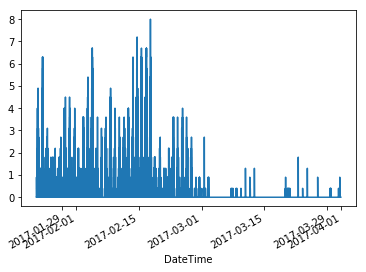

In [141]:
ff['Wind Speed'].plot()

In [142]:

ff.drop('Date' , axis = 1 , inplace = True)
ff.drop('Time' , axis = 1 , inplace = True)

In [143]:
ff.drop('Hi Dir' , axis = 1 , inplace = True)
ff.drop('Wind Dir' , axis = 1 , inplace = True)
ff.drop('Rain' , axis = 1 , inplace = True)
ff.drop('Rain Rate' , axis = 1 , inplace = True)
ff.drop('Solar Rad.' , axis = 1 , inplace = True)
ff.drop('Solar Energy' , axis = 1 , inplace = True)
ff.drop('HI Solar  Rad. ' , axis = 1 , inplace = True)
ff.drop('UV Index' , axis = 1 , inplace = True)
ff.drop('UV Dose' , axis = 1 , inplace = True)
ff.drop('Hi UV ' , axis = 1 , inplace = True)
ff.drop('Heat D-D ' , axis = 1 , inplace = True)
ff.drop('Wind Tx ' , axis = 1 , inplace = True)
ff.drop('Arc. Int.' , axis = 1 , inplace = True)
ff.drop('THSW Index' , axis=1 , inplace=True)

In [144]:
ff.dtypes

Temp Out          float64
Hi Temp           float64
Low Temp          float64
Out Hum             int64
Dew Pt.           float64
Wind Speed        float64
Wind Run          float64
Hi Speed          float64
Wind Chill        float64
Heat Index        float64
THW Index         float64
Bar               float64
Cool D-D          float64
In Temp           float64
In Hum              int64
In Dew            float64
In Heat           float64
In EMC            float64
In Air Density    float64
ET                float64
Wind Samp           int64
ISS Recept        float64
dtype: object

In [145]:
ff.isna().any()

Temp Out           True
Hi Temp            True
Low Temp           True
Out Hum           False
Dew Pt.            True
Wind Speed        False
Wind Run          False
Hi Speed          False
Wind Chill         True
Heat Index         True
THW Index          True
Bar               False
Cool D-D           True
In Temp           False
In Hum            False
In Dew            False
In Heat           False
In EMC            False
In Air Density    False
ET                False
Wind Samp         False
ISS Recept        False
dtype: bool

In [148]:
ff_res=ff.interpolate(method='time')

In [149]:
ff_res.head(1)

Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
DateTime                                                             
2017-01-23 05:01:00      71.1     71.1      71.1       86     66.7   

                     Wind Speed  Wind Run  Hi Speed  Wind Chill  Heat Index  \
DateTime                                                                      
2017-01-23 05:01:00         0.0       0.0       0.0        71.1        73.0   

                        ...      Cool D-D   In Temp  In Hum  In Dew  In Heat  \
DateTime                ...                                                    
2017-01-23 05:01:00     ...          0.004     86.5      49    65.1     88.9   

                     In EMC  In Air Density  ET   Wind Samp  ISS Recept  
DateTime                                                                 
2017-01-23 05:01:00    8.85          1.1412  0.0         24       100.0  

[1 rows x 22 columns]

In [150]:
ff_res.isna().any()

Temp Out          False
Hi Temp           False
Low Temp          False
Out Hum           False
Dew Pt.           False
Wind Speed        False
Wind Run          False
Hi Speed          False
Wind Chill        False
Heat Index        False
THW Index         False
Bar               False
Cool D-D          False
In Temp           False
In Hum            False
In Dew            False
In Heat           False
In EMC            False
In Air Density    False
ET                False
Wind Samp         False
ISS Recept        False
dtype: bool

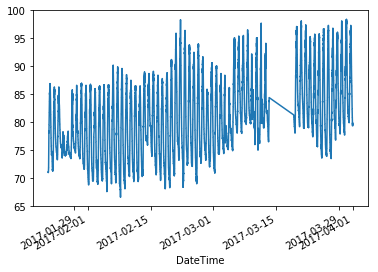

In [151]:
ff_res['Temp Out'].plot()

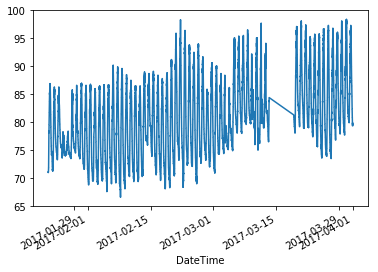

In [146]:
ff['Temp Out'].plot()

In [147]:
ff.head(1)

Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
DateTime                                                             
2017-01-23 05:01:00      71.1     71.1      71.1       86     66.7   

                     Wind Speed  Wind Run  Hi Speed  Wind Chill  Heat Index  \
DateTime                                                                      
2017-01-23 05:01:00         0.0       0.0       0.0        71.1        73.0   

                        ...      Cool D-D   In Temp  In Hum  In Dew  In Heat  \
DateTime                ...                                                    
2017-01-23 05:01:00     ...          0.004     86.5      49    65.1     88.9   

                     In EMC  In Air Density  ET   Wind Samp  ISS Recept  
DateTime                                                                 
2017-01-23 05:01:00    8.85          1.1412  0.0         24       100.0  

[1 rows x 22 columns]

In [163]:
ff_res_targets = ff_res[target_names].shift(-shift_steps)

In [164]:
b_test = ff_res_targets[0:-shift_steps].values

In [152]:
a_test = ff_res.values

In [107]:
print("Min:", np.min(a_test))
print("Max:", np.max(a_test))

Min: 0.0
Max: 763.6


In [103]:
ff.dropna(axis = 0 , how = 'any' , inplace=True)

In [105]:
ff.isna().any()

Temp Out          False
Hi Temp           False
Low Temp          False
Out Hum           False
Dew Pt.           False
Wind Speed        False
Wind Run          False
Hi Speed          False
Wind Chill        False
Heat Index        False
THW Index         False
Bar               False
Cool D-D          False
In Temp           False
In Hum            False
In Dew            False
In Heat           False
In EMC            False
In Air Density    False
ET                False
Wind Samp         False
ISS Recept        False
dtype: bool

In [108]:
a_scaler = MinMaxScaler()

In [ ]:
b_scaler = MinMaxScaler()

In [ ]:
b_test_scaled = b_scaler.fit_transform(b_test)

In [153]:
a_test_scaled = a_scaler.fit_transform(a_test)

In [206]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = a_test_scaled
        y_true = b_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
    
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

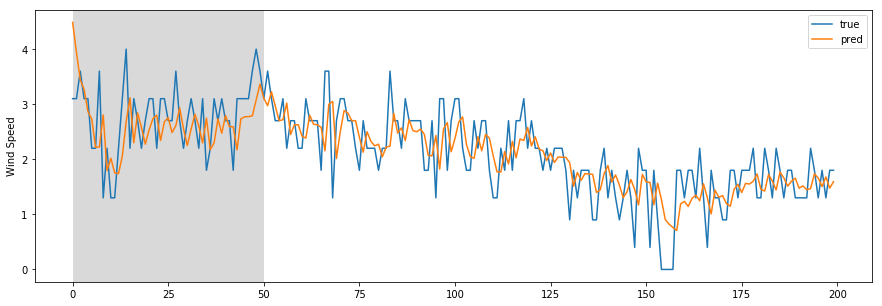

In [207]:
plot_comparison(start_idx=4000, length=200, train=True)

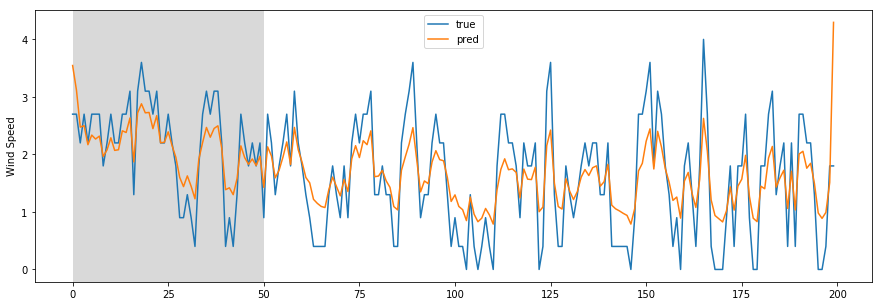

In [178]:
plot_comparison(start_idx=80000, length=200, train=True)


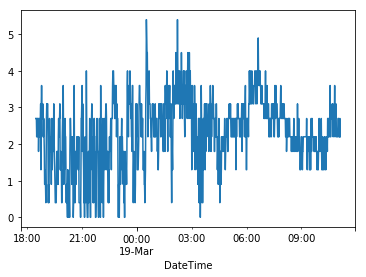

In [117]:
df['Wind Speed'][80000:80000+1000].plot()

In [116]:
df['Wind Speed'][98994+80000 : 98994 + 80000 + 1000].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

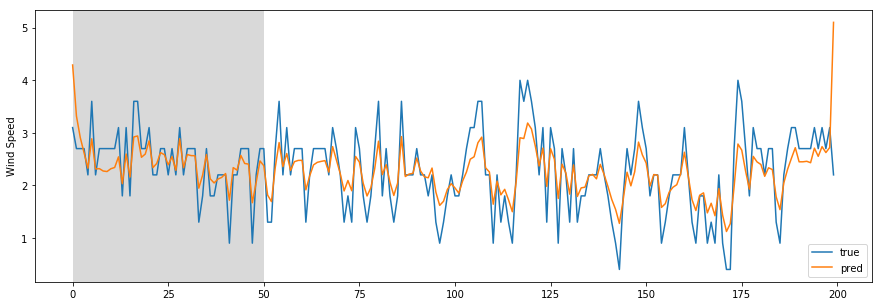

In [179]:
plot_comparison(start_idx=800, length=200, train=True)

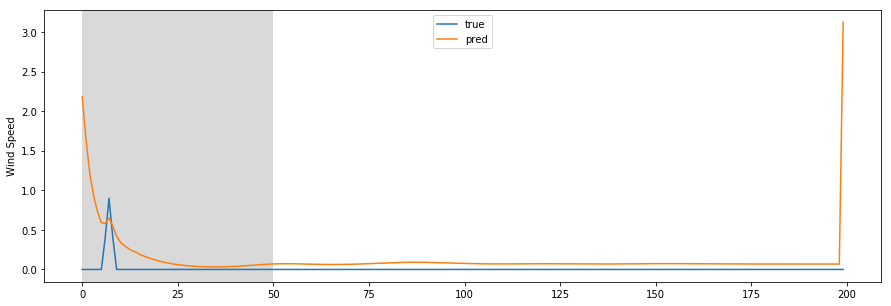

In [205]:
plot_comparison(start_idx=13940, length=200, train=False)